# Mod 4 Project - Gina Durante

## Overview

The Module 4 Project in the Flatiron School Data Science Version 2 Curriculum is meant to provide students with experience in working with time series data--in this case, monthly housing values from 04/01/1996 to 03/01/2018 for over 14,000 ZIP Codes in the U.S.  Skill sets required to complete this project include dataframe manipulation, data cleaning, data visualization, and time series analysis, and other areas (e.g., using github, Jupyter notebooks for data science projects, and writing and posting a blog).  

## Project topic

The project asks the student to identify the 5 "best" ZIP codes for investment, as defined by the student, and develop support for these recommendations to a hypothetical client (e.g., a real estate investment trust).  The student must develop a methodology for evaluating ZIP codes as potential investment targets and support these findings through a technical Jupyter notebook, a non-technical PowerPoint presentation, and a blog post.  

## My focus:  Sacramento metro area

Because the investment group is located in Sacramento, and because the Sacramento area has experience steady group over the last few decades (fueled in part by skyrocketing costs in the SF Bay Area, prompting some businesses to launch or relocate to the Sacramento region), I focused most of my efforts on the Sacramento metro area.  Because I have lived here for a number of years, I have some knowledge of the region, which has provided some helpful insights informing the analysis.

### Sacramento metro area (counties)

<center><img src='images/Sac_metro_counties_map.png' height=80% width=80%>

### Sacramento metro area (cities)

<center><img src='images/Sac_metro_cities_map.png' height=80% width=80%>

## Methodology, in brief

### Visualization of values by city and/or ZIP code, as well as of predictions of model

I developed iterative functions to visualize values by city within a metro area and across zip codes within cities in a metro area, using lists and dictionaries to iterate through the geographic areas of interest.  Using this approach, I identified 19 ZIP codes in the Sacramento region of possible interest.  Time series analysis of these 19 ZIP codes suggested 11 finalist ZIP codes to explore further.  From those, I selected 5 that I thought provided good (potentially great) returns, while limiting downside risk.  

### Consideration of predicted values, worst- and best-case scenarios, and other factors in the selection process

While the predicted returns over the forecast time horizon were of primary concern, I also took into account the worst-case scenario returns, the best-case scenario returns, the population in the ZIP code, the geographic location of the ZIP code, and personal knowledge of the area to inform my decision-making process.  More information is provided in the "Decision-making process" section of the "Recommended ZIP codes" section at the end of this notebook.


### County representation in finalist and top 5 selected ZIP codes

One of those ZIP codes was in El Dorado County, and the other four were in Placer County.  While there may be promising ZIP codes in both Sacramento and Yolo Counties, Sacramento City ZIP codes that I analyzed were not as competitive as those of Placer County.  I only analyzed one ZIP code in Yolo County (95616 in Davis), though others looked similar in terms of their pattern and trends.  It would probably be worthwhile to analyze one of the two ZIP codes in West Sacramento, as West Sac is an area that has been on the upswing for several years.  


## Possible future directions

Beyond analysis of at least one more ZIP code in the Sacramento area, I've identified several other possible future directions for this work:
- While time limitations prevented a broader evaluation of investment opportunities across the country, the functions I developed allow visualizations of broader swaths of the data (e.g., values by metro area, values by city within a metro area, values by zip codes and cities within a metro area).  
  - Creating visualizations at various geographic levels was very useful for identifying patterns that could signify promising investment opportunities.  
  - From this effort, I identified some geographic areas, such as the Dallas-Fort Worth and the Pittsburg metro areas, that could be worthwhile to explore in future efforts.  
- It could be interesting and potentially valuable to do some backtesting on the model to see how well it predicts the last 24 months for which we have data (May 2016 through April 2018).
- Analyzing shorter time frames (e.g., 2013-2018)
- Scaling investment by population size 
- Construct a basket of investments (e.g., $10M, weighted by ZIP population?)

## A few words on the notebook that follows...

The notebook below is what I used for performing my analyses and arriving at results.  Thus, it is technical and includes all code.  It will most likely be revised over time, so individuals interested in this work should check back periodically.  At the very end of this notebook is a table (small dataframe) that summarizes my analyses.  

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [410]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot

import warnings
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from collections import defaultdict
from collections import OrderedDict

In [411]:
pd.set_option("display.max_rows", 300)

In [412]:
pd.get_option("display.max_rows")

300

In [413]:
df = pd.read_csv('zillow_data.csv')

In [414]:
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

# Step 2: Data Preprocessing

## Convert time data type to datetime format

In [415]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m', errors = 'raise')

In [416]:
get_datetimes(df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

## Fix problem with ZIP codes beginning with '0'

I have surmised that RegionName is the ZIP code for each entry.  RegionName values with only 4 digits represent ZIP codes that actually begin with '0'.  So that I can work with ZIP codes in the data set, I will need to add that zero onto every 4-digit RegionName value.  Once that's completed, I'll rename this column "ZipCode".  

In [417]:
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [418]:
df.sort_values(by="RegionName").head()

RegionID  RegionName         City State        Metro CountyName  \
5850      58196        1001       Agawam    MA  Springfield    Hampden   
4199      58197        1002      Amherst    MA  Springfield  Hampshire   
11213     58200        1005        Barre    MA    Worcester  Worcester   
6850      58201        1007  Belchertown    MA  Springfield  Hampshire   
14547     58202        1008    Blandford    MA  Springfield    Hampden   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
5850       5851  113100.0  112800.0  112600.0  ...   213900   215700   218200   
4199       4200  161000.0  160100.0  159300.0  ...   333700   334800   336700   
11213     11214  103100.0  103400.0  103600.0  ...   205600   206800   208800   
6850       6851  133400.0  132700.0  132000.0  ...   266100   266300   267000   
14547     14548  117500.0  117300.0  117100.0  ...   202400   202900   205900   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
5850    220100   221100   221700   221700   221700   222700   223600  
4199    338900   340400   342000   344500   347400   350600   353300  
11213   210400   211300   213300   215600   217900   219500   220700  
6850    267500   268000   268100   268100   268800   270000   270600  
14547   208500   207500   205400   204500   206800   210900   214200  

[5 rows x 272 columns]

In [419]:
df['RegionName'] = df.RegionName.astype(str)
df['RegionName'].dtype


dtype('O')

In [420]:
df.rename(columns={'RegionName': 'Zip'}, inplace=True)
df.columns
df.head()

RegionID    Zip      City State              Metro CountyName  SizeRank  \
0     84654  60657   Chicago    IL            Chicago       Cook         1   
1     90668  75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982  77494      Katy    TX            Houston     Harris         3   
3     84616  60614   Chicago    IL            Chicago       Cook         4   
4     93144  79936   El Paso    TX            El Paso    El Paso         5   

    1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
0  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800  1009600   
1  235700.0  236900.0  236700.0  ...   308000   310000   312500   314100   
2  210400.0  212200.0  212200.0  ...   321000   320600   320200   320400   
3  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400  1291500   
4   77300.0   77300.0   77300.0  ...   119100   119400   120000   120300   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1013300  1018700  1024400  1030700  1033800  1030600  
1   315000   316600   318100   319600   321100   321800  
2   320800   321200   321200   323000   326900   329900  
3  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [421]:
zips = []

for i in df['Zip']:
    if len(i) < 5:
        i = '0' + i
        zips.append(i)
    else:
        zips.append(i)

zips
df['Zip'] = pd.Series(zips)
df.sort_values(by='Zip').head()
# df.head()

RegionID    Zip         City State        Metro CountyName  SizeRank  \
5850      58196  01001       Agawam    MA  Springfield    Hampden      5851   
4199      58197  01002      Amherst    MA  Springfield  Hampshire      4200   
11213     58200  01005        Barre    MA    Worcester  Worcester     11214   
6850      58201  01007  Belchertown    MA  Springfield  Hampshire      6851   
14547     58202  01008    Blandford    MA  Springfield    Hampden     14548   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
5850   113100.0  112800.0  112600.0  ...   213900   215700   218200   220100   
4199   161000.0  160100.0  159300.0  ...   333700   334800   336700   338900   
11213  103100.0  103400.0  103600.0  ...   205600   206800   208800   210400   
6850   133400.0  132700.0  132000.0  ...   266100   266300   267000   267500   
14547  117500.0  117300.0  117100.0  ...   202400   202900   205900   208500   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
5850    221100   221700   221700   221700   222700   223600  
4199    340400   342000   344500   347400   350600   353300  
11213   211300   213300   215600   217900   219500   220700  
6850    268000   268100   268100   268800   270000   270600  
14547   207500   205400   204500   206800   210900   214200  

[5 rows x 272 columns]

## Creating dataframes by various groupings and geographies

### Creating US dataframe (df_melt) using melt function

In [422]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'Zip', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=False)
    melted = melted.dropna(subset=['value'])
    return melted   

In [423]:
df_melt = melt_data(df)


In [424]:
df_melt.head()

RegionID    Zip      City State              Metro CountyName  SizeRank  \
0     84654  60657   Chicago    IL            Chicago       Cook         1   
1     90668  75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982  77494      Katy    TX            Houston     Harris         3   
3     84616  60614   Chicago    IL            Chicago       Cook         4   
4     93144  79936   El Paso    TX            El Paso    El Paso         5   

        time     value  
0 1996-04-01  334200.0  
1 1996-04-01  235700.0  
2 1996-04-01  210400.0  
3 1996-04-01  498100.0  
4 1996-04-01   77300.0

In [425]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744704 entries, 0 to 3901594
Data columns (total 9 columns):
RegionID      int64
Zip           object
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
time          datetime64[ns]
value         float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 285.7+ MB


In [426]:
df_melt.set_index('time')

RegionID    Zip                 City State              Metro  \
time                                                                        
1996-04-01     84654  60657              Chicago    IL            Chicago   
1996-04-01     90668  75070             McKinney    TX  Dallas-Fort Worth   
1996-04-01     91982  77494                 Katy    TX            Houston   
1996-04-01     84616  60614              Chicago    IL            Chicago   
1996-04-01     93144  79936              El Paso    TX            El Paso   
...              ...    ...                  ...   ...                ...   
2018-04-01     58333  01338             Ashfield    MA    Greenfield Town   
2018-04-01     59107  03293            Woodstock    NH          Claremont   
2018-04-01     75672  40404                Berea    KY           Richmond   
2018-04-01     93733  81225  Mount Crested Butte    CO                NaN   
2018-04-01     95851  89155             Mesquite    NV          Las Vegas   

           CountyName  SizeRank     value  
time                                       
1996-04-01       Cook         1  334200.0  
1996-04-01     Collin         2  235700.0  
1996-04-01     Harris         3  210400.0  
1996-04-01       Cook         4  498100.0  
1996-04-01    El Paso         5   77300.0  
...               ...       ...       ...  
2018-04-01   Franklin     14719  209300.0  
2018-04-01    Grafton     14720  225800.0  
2018-04-01    Madison     14721  133400.0  
2018-04-01   Gunnison     14722  664400.0  
2018-04-01      Clark     14723  357200.0  

[3744704 rows x 8 columns]

In [427]:
## Dropping RegionID:
df_melt.drop('RegionID', axis=1, inplace=True)

In [428]:
df_melt.head()

Zip      City State              Metro CountyName  SizeRank       time  \
0  60657   Chicago    IL            Chicago       Cook         1 1996-04-01   
1  75070  McKinney    TX  Dallas-Fort Worth     Collin         2 1996-04-01   
2  77494      Katy    TX            Houston     Harris         3 1996-04-01   
3  60614   Chicago    IL            Chicago       Cook         4 1996-04-01   
4  79936   El Paso    TX            El Paso    El Paso         5 1996-04-01   

      value  
0  334200.0  
1  235700.0  
2  210400.0  
3  498100.0  
4   77300.0

Dataframe is sorted by SizeRank by default.

In [429]:
df_melt.isna().sum()

Zip                0
City               0
State              0
Metro         236023
CountyName         0
SizeRank           0
time               0
value              0
dtype: int64

In [430]:
df_melt['Metro'].fillna('Missing', inplace=True)
df_melt.isna().sum()

Zip           0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
time          0
value         0
dtype: int64

In [431]:
# Sorting by zip code, then time

df_melt.sort_values(by=['Zip', 'time'])

Zip       City State        Metro         CountyName  SizeRank  \
5850     01001     Agawam    MA  Springfield            Hampden      5851   
20573    01001     Agawam    MA  Springfield            Hampden      5851   
35296    01001     Agawam    MA  Springfield            Hampden      5851   
50019    01001     Agawam    MA  Springfield            Hampden      5851   
64742    01001     Agawam    MA  Springfield            Hampden      5851   
...        ...        ...   ...          ...                ...       ...   
3835273  99901  Ketchikan    AK    Ketchikan  Ketchikan Gateway      7294   
3849996  99901  Ketchikan    AK    Ketchikan  Ketchikan Gateway      7294   
3864719  99901  Ketchikan    AK    Ketchikan  Ketchikan Gateway      7294   
3879442  99901  Ketchikan    AK    Ketchikan  Ketchikan Gateway      7294   
3894165  99901  Ketchikan    AK    Ketchikan  Ketchikan Gateway      7294   

              time     value  
5850    1996-04-01  113100.0  
20573   1996-05-01  112800.0  
35296   1996-06-01  112600.0  
50019   1996-07-01  112300.0  
64742   1996-08-01  112100.0  
...            ...       ...  
3835273 2017-12-01  291900.0  
3849996 2018-01-01  294200.0  
3864719 2018-02-01  297500.0  
3879442 2018-03-01  302100.0  
3894165 2018-04-01  305100.0  

[3744704 rows x 8 columns]

Note that a few zip codes are missing; these rows were eliminated when Zip codes with NaN values in the 'value' column were dropped.

In [432]:
df_melt.nunique()

Zip           14723
City           7554
State            51
Metro           702
CountyName     1212
SizeRank      14723
time            265
value         24372
dtype: int64

### Creating new column, MetroState, to address duplicate metro names in different states (e.g., Aberdeen in multiple states)

Wanted to make sure that the values from totally unrelated metro areas in different states weren't inadvertently merged together.

In [433]:
df_melt['MetroState'] = df_melt['Metro'] + ' ' + df_melt['State']

In [434]:
df_melt.head()

Zip      City State              Metro CountyName  SizeRank       time  \
0  60657   Chicago    IL            Chicago       Cook         1 1996-04-01   
1  75070  McKinney    TX  Dallas-Fort Worth     Collin         2 1996-04-01   
2  77494      Katy    TX            Houston     Harris         3 1996-04-01   
3  60614   Chicago    IL            Chicago       Cook         4 1996-04-01   
4  79936   El Paso    TX            El Paso    El Paso         5 1996-04-01   

      value            MetroState  
0  334200.0            Chicago IL  
1  235700.0  Dallas-Fort Worth TX  
2  210400.0            Houston TX  
3  498100.0            Chicago IL  
4   77300.0            El Paso TX

### Creating df_metro (US metro df) with monthly values by Zip

In [435]:
df_melt.set_index('time', inplace=True)

In [436]:
df_melt.head()

Zip      City State              Metro CountyName  SizeRank  \
time                                                                        
1996-04-01  60657   Chicago    IL            Chicago       Cook         1   
1996-04-01  75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
1996-04-01  77494      Katy    TX            Houston     Harris         3   
1996-04-01  60614   Chicago    IL            Chicago       Cook         4   
1996-04-01  79936   El Paso    TX            El Paso    El Paso         5   

               value            MetroState  
time                                        
1996-04-01  334200.0            Chicago IL  
1996-04-01  235700.0  Dallas-Fort Worth TX  
1996-04-01  210400.0            Houston TX  
1996-04-01  498100.0            Chicago IL  
1996-04-01   77300.0            El Paso TX

Note:  the dataframe is sorted by zipcode SizeRank by default.  

In [437]:
df_metro = df_melt.groupby(['Metro', 'MetroState', 'CountyName', 'City', 'Zip', 'time']).mean().reset_index()


In [438]:
df_metro.head(10)

Metro   MetroState    CountyName      City    Zip       time  SizeRank  \
0  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-04-01      5029   
1  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-05-01      5029   
2  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-06-01      5029   
3  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-07-01      5029   
4  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-08-01      5029   
5  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-09-01      5029   
6  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-10-01      5029   
7  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-11-01      5029   
8  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1996-12-01      5029   
9  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520 1997-01-01      5029   

     value  
0  86600.0  
1  86300.0  
2  86100.0  
3  85900.0  
4  85700.0  
5  85600.0  
6  85600.0  
7  85700.0  
8  85800.0  
9  85900.0

In [439]:
df_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744704 entries, 0 to 3744703
Data columns (total 8 columns):
Metro         object
MetroState    object
CountyName    object
City          object
Zip           object
time          datetime64[ns]
SizeRank      int64
value         float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 228.6+ MB


In [440]:
df_metro.set_index('time', inplace=True)

In [441]:
df_metro.head()

Metro   MetroState    CountyName      City    Zip  SizeRank  \
time                                                                         
1996-04-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520      5029   
1996-05-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520      5029   
1996-06-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520      5029   
1996-07-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520      5029   
1996-08-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen  98520      5029   

              value  
time                 
1996-04-01  86600.0  
1996-05-01  86300.0  
1996-06-01  86100.0  
1996-07-01  85900.0  
1996-08-01  85700.0

In [442]:
df_metro.nunique()

Metro           702
MetroState      865
CountyName     1212
City           7554
Zip           14723
SizeRank      14723
value         24372
dtype: int64

### Creating df_metro_cities (US metro df) with monthly values by city

In [443]:
df_metro_cities = df_melt.groupby(['Metro', 'MetroState', 'CountyName', 'City', 'time']).mean().reset_index()


In [444]:
df_metro_cities.head()

Metro   MetroState    CountyName      City       time  SizeRank    value
0  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen 1996-04-01    5029.0  86600.0
1  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen 1996-05-01    5029.0  86300.0
2  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen 1996-06-01    5029.0  86100.0
3  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen 1996-07-01    5029.0  85900.0
4  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen 1996-08-01    5029.0  85700.0

In [445]:
df_metro_cities.set_index('time', inplace=True)

In [446]:
df_metro_cities.head()

Metro   MetroState    CountyName      City  SizeRank    value
time                                                                        
1996-04-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen    5029.0  86600.0
1996-05-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen    5029.0  86300.0
1996-06-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen    5029.0  86100.0
1996-07-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen    5029.0  85900.0
1996-08-01  Aberdeen  Aberdeen WA  Grays Harbor  Aberdeen    5029.0  85700.0

In [447]:
df_metro_cities.nunique()

Metro           702
MetroState      865
CountyName     1212
City           7554
SizeRank      10335
value         83532
dtype: int64

## df_geog:  Function for creating a sub-dataframe of a particular geographic unit (e.g., MetroState area, City, CountyName)

In [448]:
def df_geog(df, col, geog):
    
    '''Creates subset dataframe containing just the geographic unit 
    (e.g., 'MetroState' == 'Sacramento CA', 'City' == 'Davis', etc.) of interest.  
    It is necessary to set df equal to a dataframe with the appropriate geographic grouping: 
    e.g., to plot values by city in a metro aree, df = df_metro_cities, col = 'MetroState',
    geog = 'Sacramento CA' (or metro area of interest). 
    '''
    df_metro_geog = df.loc[df[col] == geog]
    return df_metro_geog


### df_sac:  Sac Metro dataframe, values by Zip code

In [449]:
# df_sac = df_melt.loc[df_melt.Metro == 'Sacramento']  # use if function throws an error

df_sac = df_geog(df=df_metro, col = 'MetroState', geog = 'Sacramento CA')

In [450]:
df_sac

Metro     MetroState CountyName      City    Zip  SizeRank  \
time                                                                          
1996-04-01  Sacramento  Sacramento CA  El Dorado    Camino  95709     10422   
1996-05-01  Sacramento  Sacramento CA  El Dorado    Camino  95709     10422   
1996-06-01  Sacramento  Sacramento CA  El Dorado    Camino  95709     10422   
1996-07-01  Sacramento  Sacramento CA  El Dorado    Camino  95709     10422   
1996-08-01  Sacramento  Sacramento CA  El Dorado    Camino  95709     10422   
...                ...            ...        ...       ...    ...       ...   
2017-12-01  Sacramento  Sacramento CA       Yolo  Woodland  95776      5094   
2018-01-01  Sacramento  Sacramento CA       Yolo  Woodland  95776      5094   
2018-02-01  Sacramento  Sacramento CA       Yolo  Woodland  95776      5094   
2018-03-01  Sacramento  Sacramento CA       Yolo  Woodland  95776      5094   
2018-04-01  Sacramento  Sacramento CA       Yolo  Woodland  95776      5094   

               value  
time                  
1996-04-01  141500.0  
1996-05-01  141500.0  
1996-06-01  141500.0  
1996-07-01  141500.0  
1996-08-01  141600.0  
...              ...  
2017-12-01  391100.0  
2018-01-01  397800.0  
2018-02-01  401000.0  
2018-03-01  401800.0  
2018-04-01  401700.0  

[23960 rows x 7 columns]

In [451]:
df_sac.drop('SizeRank', axis=1, inplace=True)

In [877]:
df_sac.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141600.0

### df_sac:  Sac Metro dataframe, values by city

In [453]:
df_sac_cities = df_geog(df=df_metro_cities, col = 'MetroState', geog = 'Sacramento CA')

In [878]:
df_sac_cities.head()

Metro     MetroState CountyName    City     value
time                                                              
1996-04-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Camino  141600.0

In [455]:
df_sac_cities.drop('SizeRank', axis=1, inplace=True)

In [879]:
df_sac_cities.head()

Metro     MetroState CountyName    City     value
time                                                              
1996-04-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Camino  141500.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Camino  141600.0

## Creating dictionaries -- Sac Metro region

### Function to print first n number of items in a dictionary


In [457]:
# function to print first n number of items in a dictionary

def print_first_n(dictionary, n):
    return {k: dictionary[k] for k in list(dictionary)[:n]}

### Creating sac_metro_cities list from df_sac

In [458]:
sac_metro_cities = list(set(df_sac.City))
sac_metro_cities[:5]

['Elk Grove', 'Rosemont', 'Auburn', 'Winters', 'Diamond Springs']

In [459]:
sac_metro_cities.sort()
sac_metro_cities[:5]


['Applegate', 'Arden-Arcade', 'Auburn', 'Camino', 'Carmichael']

### Creating sac_metro_zips list from zips in Sac Metro area

In [460]:
sac_metro_zips = list(set(df_sac.Zip))
sac_metro_zips[:5]

['95621', '96143', '95829', '96141', '95655']

### Creating dict_zips_cities dictionary to graph zips by city

In [461]:
df_sac_one_val = df_sac.groupby(['CountyName', 'City', 'Zip']).mean().reset_index()

In [462]:
df_sac_one_val.sort_values(by=['Zip']).head()

#### Seeking to create the dictionary showing just the unique zip code instance rather than repeating it for each row of data) 

CountyName             City    Zip          value
17      Placer           Auburn  95602  348386.415094
18      Placer           Auburn  95603  311752.830189
87        Yolo  West Sacramento  95605  160125.283019
41  Sacramento       Carmichael  95608  286006.415094
42  Sacramento   Citrus Heights  95610  235864.150943

In [463]:
from collections import defaultdict

dict_sac_zips_cities = defaultdict(list)

for idx,row in df_sac_one_val.iterrows():
    dict_sac_zips_cities[row['City']].append(row['Zip'])
    
print(dict_sac_zips_cities)

defaultdict(<class 'list'>, {'Camino': ['95709'], 'Cool': ['95614'], 'Diamond Springs': ['95619'], 'El Dorado': ['95623'], 'El Dorado Hills': ['95762'], 'Garden Valley': ['95633'], 'Georgetown': ['95634'], 'Pilot Hill': ['95664'], 'Placerville': ['95667'], 'Pollock Pines': ['95726'], 'Rescue': ['95672'], 'Shingle Springs': ['95682'], 'Somerset': ['95636', '95684'], 'South Lake Tahoe': ['96150'], 'Tahoma': ['96142'], 'Applegate': ['95703'], 'Auburn': ['95602', '95603'], 'Carnelian Bay': ['96140'], 'Colfax': ['95713'], 'Foresthill': ['95631'], 'Granite Bay': ['95746'], 'Homewood': ['96141'], 'Kings Beach': ['96143'], 'Lincoln': ['95648'], 'Loomis': ['95650'], 'Meadow Vista': ['95722'], 'Newcastle': ['95658'], 'Penryn': ['95663'], 'Rocklin': ['95677', '95765'], 'Roseville': ['95661', '95678', '95747'], 'Tahoe City': ['96145', '96146'], 'Tahoe Vista': ['96148'], 'Arden-Arcade': ['95821', '95825', '95864'], 'Carmichael': ['95608'], 'Citrus Heights': ['95610', '95621'], 'Elk Grove': ['95624'

In [464]:
from collections import OrderedDict

# Create Ordered dictionary of cities and zip codes

ordict_sac_zips_cities = OrderedDict(sorted(dict_sac_zips_cities.items()))
                                     
type(ordict_sac_zips_cities)


collections.OrderedDict

In [465]:
print_first_n(ordict_sac_zips_cities, n=10)

{'Applegate': ['95703'],
 'Arden-Arcade': ['95821', '95825', '95864'],
 'Auburn': ['95602', '95603'],
 'Camino': ['95709'],
 'Carmichael': ['95608'],
 'Carnelian Bay': ['96140'],
 'Citrus Heights': ['95610', '95621'],
 'Colfax': ['95713'],
 'Cool': ['95614'],
 'Davis': ['95616', '95618']}

In [466]:
dict_sac_zips_cities = dict(sorted(ordict_sac_zips_cities.items()))
print_first_n(dict_sac_zips_cities, n=10)

{'Applegate': ['95703'],
 'Arden-Arcade': ['95821', '95825', '95864'],
 'Auburn': ['95602', '95603'],
 'Camino': ['95709'],
 'Carmichael': ['95608'],
 'Carnelian Bay': ['96140'],
 'Citrus Heights': ['95610', '95621'],
 'Colfax': ['95713'],
 'Cool': ['95614'],
 'Davis': ['95616', '95618']}

### Function to return slice of an ordered dictionary (for use in plotting)

In [467]:
def return_slice(dictionary, m, n):
    sub_dict = {k: dictionary[k] for k in list(dictionary)[m:n]}
    return sub_dict

In [468]:
dict_0_6 = return_slice(dict_sac_zips_cities, 0, 6)
dict_0_6

{'Applegate': ['95703'],
 'Arden-Arcade': ['95821', '95825', '95864'],
 'Auburn': ['95602', '95603'],
 'Camino': ['95709'],
 'Carmichael': ['95608'],
 'Carnelian Bay': ['96140']}

In [469]:
dict_6_12 = return_slice(dict_sac_zips_cities, 6, 12)
dict_6_12

{'Citrus Heights': ['95610', '95621'],
 'Colfax': ['95713'],
 'Cool': ['95614'],
 'Davis': ['95616', '95618'],
 'Diamond Springs': ['95619'],
 'El Dorado': ['95623']}

In [470]:
dict_12_18 = return_slice(dict_sac_zips_cities, 12, 18)
dict_12_18

{'El Dorado Hills': ['95762'],
 'Elk Grove': ['95624', '95757', '95758'],
 'Elverta': ['95626'],
 'Esparto': ['95627'],
 'Fair Oaks': ['95628'],
 'Florin': ['95828']}

In [471]:
dict_18_24 = return_slice(dict_sac_zips_cities, 18, 24)
dict_18_24

{'Folsom': ['95630'],
 'Foresthill': ['95631'],
 'Galt': ['95632'],
 'Garden Valley': ['95633'],
 'Georgetown': ['95634'],
 'Granite Bay': ['95746']}

In [472]:
dict_24_30 = return_slice(dict_sac_zips_cities, 24, 30)
dict_24_30

{'Herald': ['95638'],
 'Homewood': ['96141'],
 'Kings Beach': ['96143'],
 'Lincoln': ['95648'],
 'Loomis': ['95650'],
 'Mather Air Force Base': ['95655']}

In [473]:
dict_30_36 = return_slice(dict_sac_zips_cities, 30, 36)
dict_30_36

{'Meadow Vista': ['95722'],
 'Newcastle': ['95658'],
 'Orangevale': ['95662'],
 'Penryn': ['95663'],
 'Pilot Hill': ['95664'],
 'Placerville': ['95667']}

In [474]:
dict_36_42 = return_slice(dict_sac_zips_cities, 36, 42)
dict_36_42

{'Pollock Pines': ['95726'],
 'Rancho Cordova': ['95670', '95742', '95827'],
 'Rescue': ['95672'],
 'Rio Linda': ['95673'],
 'Rocklin': ['95677', '95765'],
 'Rosemont': ['95826']}

In [475]:
dict_42_48 = return_slice(dict_sac_zips_cities, 42, 48)
dict_42_48

{'Roseville': ['95661', '95678', '95747'],
 'Sacramento': ['95660',
  '95811',
  '95815',
  '95816',
  '95817',
  '95818',
  '95819',
  '95820',
  '95822',
  '95823',
  '95824',
  '95829',
  '95831',
  '95832',
  '95833',
  '95834',
  '95835',
  '95838',
  '95841',
  '95842',
  '95843'],
 'Shingle Springs': ['95682'],
 'Sloughhouse': ['95683'],
 'Somerset': ['95636', '95684'],
 'South Lake Tahoe': ['96150']}

In [476]:
dict_48_54 = return_slice(dict_sac_zips_cities, 48, 54)
dict_48_54

{'Tahoe City': ['96145', '96146'],
 'Tahoe Vista': ['96148'],
 'Tahoma': ['96142'],
 'Walnut Grove': ['95690'],
 'West Sacramento': ['95605', '95691'],
 'Wilton': ['95693']}

In [477]:
dict_54_56 = return_slice(dict_sac_zips_cities, 54, 56)
dict_54_56

{'Winters': ['95694'], 'Woodland': ['95695', '95776']}

# Step 3: EDA/Visualizations

## Plotting functions

### Plotting function:  plot_single_geog function (plots a single geographic unit)

In [478]:
# Be sure to use df with appropriate value grouping (e.g., metro, city, zip)

def plot_single_geog(df, geog_area, col1, col2, figsize=(12, 6), fontsize1=12, fontsize2=16):
    
    ''' Plots housing values for individual geographic unit, e.g., MetroState, City, County.  
    Be sure to use the appropriate dataframe for the selected grouping (df_metro_cities for 
    cities in a metro area, for example).  Specify nrows, ncols, and figsize to match size of list.
    '''
    
    ts = df[col1].loc[df[col2] == geog_area]
    ax = ts.plot(figsize=figsize, fontsize=fontsize1, label = 'Raw Price')
    plt.title(geog_area, fontsize=fontsize2)
    plt.xlabel('')

    max_ = ts.loc['2004':'2010'].idxmax()  
    crash = '01-2009'
    min_ = ts.loc[crash:].idxmin()
    val_2003 = ts.loc['2003-01-01']

    ax.axvline(max_, label='Max price during bubble', color = 'green', ls=':')
    ax.axvline(crash, label = 'Housing Index Drops', color='red', ls=':')
    ax.axvline(min_, label=f'Min price post-crash {min_}', color = 'black', ls=':')
    ax.axhline(val_2003, label='Value on 2003-01-01', color = 'blue', ls='-.', alpha=0.15)

    ax.legend(loc='upper left', fontsize=fontsize1)



### Plotting function:   plot_ts_cities (plot values by city)

In [479]:
# Adapted from James Irving's study group:
    
def plot_ts_cities(df, cities, col='value', figsize = (18, 100), fontsize1=14, fontsize2=20, nrows=30, ncols=2, 
                   legend=True, set_ylim = False, ylim = 1400000):
    
    '''Plots housing values by city within a metro area.  Need to use dataframe 
    with values by CITY for just that METRO (specify .loc in arguments that 
    column 'MetroState' == METRO). Need LIST of CITIES within that METRO area.  
    Specify nrows, ncols, and figsize to match size of dataset.
    '''
    
    fig = plt.figure(figsize=figsize)
    
    for i, city in enumerate(cities, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        
        ts = df[col].loc[df['City'] == city]
        ts = ts.rename('Average home values')
        ts.plot(fontsize=fontsize1, ax=ax)
        plt.title(city, fontsize=fontsize2)
        plt.xlabel('')

        try:
            max_ = ts.loc['2004':'2011'].idxmax() 
        except:
            continue
            
        crash = '01-2009'
        min_ = ts.loc[crash:].idxmin()
        try:
            val_2003 = ts.loc['2003-01-01']
        except:
            continue

        ax.axvline(max_, label=f'Max price during \nbubble', color = 'orange', ls=':')
        ax.axvline(crash, label = 'US median house \nprice bottom (crash)', color='black', ls=':')
        ax.axvline(min_, label=f'Min price post-crash', color = 'red', ls=':')
       
        try:
            ax.axhline(val_2003, label='Value on 2003-01-01', color = 'blue', ls='-.', alpha=0.15)
        except:
            continue
            
        if set_ylim:
            ax.set_ylim(ylim)
        if legend:
            ax.legend(loc="upper left", fontsize=fontsize1)
            
        fig.tight_layout()
    
    return fig, ax


### Plotting function:  plot_ts_zips (plots individual zip codes in a list provided to the function)

In [480]:
# Adapted from James Irving's study group:
    
def plot_ts_zips(df, zipcodes, col='value', figsize = (12, 6), fontsize1=14, fontsize2=18, nrows=2, ncols=2, 
                 legend=True, set_ylim = False, ylim = 800000):
        
    ''' Plots multiple zip codes in a single axes/figure.  For each zip code, marks dates of:
    1) maximum value reached during the housing bubble; 2) minimum value after the crash;
    3) absolute minimum across entire time horizon (e.g., 1996 if you go back that far);
    4) absolute minimum across entire time horizon (may or may not be the height of the bubble);
    5) date when the national housing index (Case-Schiller) dropped.  
    ''' 

    fig = plt.figure(figsize=figsize)
    
    for i, zc in enumerate(zipcodes, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        
        ts = df[col].loc[df['Zip'] == zc]
        ts = ts.rename(zc)
        ts.plot(ax=ax, fontsize=fontsize1)
        plt.title(zc, fontsize=fontsize2)
        plt.xlabel('')
        
        try: 
            max_ = ts.loc['2004':'2011'].idxmax()  
        except:
            continue

        crash = '01-2009'
        min_ = ts.loc[crash:].idxmin()
        val_2003 = ts.loc['2003-01-01']

        ax.axvline(max_, label=f'Max price during bubble', color = 'orange', ls=':')
        ax.axvline(crash, label = 'US median home price, \npost-bubble low', color='black', ls=':')
        ax.axvline(min_, label=f'ZIP code min price, \npost-crash', color = 'red', ls=':')
        ax.axhline(val_2003, label='Value on \n01/01/2003', color = 'blue', ls='-.', alpha=0.15)
        if set_ylim:
            ax.set_ylim(ylim)
        if legend:
            ax.legend(loc='upper left', fontsize=fontsize1)
    
        fig.tight_layout()
    
    return fig, ax


### Plotting function:  plot_ts_zips_by_city (plot of each city with values by zip codes in a metro area)

In [481]:
# Function below adapted from James Irving's study group:
    
def plot_ts_zips_by_city(df, dict_zips_cities, col='value', figsize = (18, 120), fontsize1=14, fontsize2=18, 
                         nrows=30, ncols=2, legend=True, set_ylim = False, ylim = 1400000):
        
    '''Plots values for zip codes by city within a metro area.  Need to use dataframe 
    with values by ZIP code and CITY for just that METRO (or specify .loc in arguments that 
    column 'MetroState' == METRO). Need DICTIONARY of ZIPS by CITY within that METRO area.  
    Specify nrows, ncols, and figsize to match size of dataset.
    '''

    fig = plt.figure(figsize=figsize)
    
    for i, key in enumerate(sorted(dict_zips_cities.keys()), start=1):
        ax = fig.add_subplot(nrows, ncols, i)

        for val in dict_zips_cities[key]:
            ts = df[col].loc[df['Zip'] == val]
            ts = ts.rename(val)
            ts.plot(ax=ax, fontsize=fontsize1)   
            plt.title(key, fontsize=fontsize2)
            plt.xlabel('')
            
            try: 
                max_ = ts.loc['2004':'2011'].idxmax()  
            except:
                continue

            crash = '01-2009'
            min_ = ts.loc[crash:].idxmin()
            
#             val_2003 = ts.loc['2003-01-01']

#             ax.axvline(max_, label=f'Max price during bubble for {val}', color = 'orange', ls=':')               
#             ax.axvline(min_, label=f'Min Price Post Crash for {val}', color = 'red', ls=':')
#             ax.axvline(crash, color='black')            # if label is desired, insert the following:  label = 'Case-Schiller index declines'
#             ax.axvline('2003-01-01', color = 'blue', ls='-.', alpha=0.15)   # for label, insert the following:  label='2003-01-01'
#             ax.axhline(ts.loc['2003-01-01'], label='2003-01-01 value for {val}', ls='-.', alpha = 0.15)  # can't get this to work on multiple zip plots 
    
            if set_ylim:
                ax.set_ylim(ylim)
            if legend:
                ax.legend(loc="upper left", fontsize=fontsize1)
        
        peak = '01-2007'
        crash = '01-2009'
        ax.axvline(crash, label = 'US median home price, \npost-bubble low', color='red', ls=':')   
        ax.axvline(peak, label = 'US median home price \npeak during bubble', color='black', ls=':')
        ax.axvline('2003-01-01', label = 'Beginning of bubble', color = 'blue', ls='-.', alpha=0.25)
        
        if legend:
            ax.legend(loc='upper left', fontsize=fontsize1)

        fig.tight_layout()
    
    return fig, ax


### Plotting function:  single_zip_boxplot (boxplots of a single ZIP code)

In [482]:
def single_zip_boxplot(df, geog_area, col1 = 'value', col2 = 'Zip', figsize=(8, 4)):
    
    '''Plots boxplots of each zipcode within a city.  Need to use dataframe with values by ZIP 
    for just that CITY (or specify .loc in arguments that column 'City' == CITY in question).
    Need LIST of ZIP codes for that particular CITY.  Need to specify nrows, ncols, and figsize.
    '''
    
    fig = plt.figure(figsize=figsize)
    ts = df.loc[df[col2] == geog_area]
    ts.boxplot(column = col1)
    plt.title(f'{geog_area}')
    

### Plotting function:  metro_cities_boxplot (boxplots by city in metro area)

In [483]:
def metro_cities_boxplot(df, metro_cities, nrows, ncols, figsize=(18, 30)):
    
    '''Plots boxplots of each city within a metro area.  Need to use dataframe with values 
    by CITY for just that METRO (or specify .loc in arguments that column 'MetroState' == METRO.
    Need LIST of CITIES within a particular metro area.  Need to specify nrows, ncols, and figsize.
    '''
    
    fig = plt.figure(figsize=figsize)
    
    for i, city in enumerate(metro_cities, start=1):
        ax = fig.add_subplot(nrows, ncols, i)
        ts = df.loc[df['City'] == city]
        ts.boxplot(column = 'value', ax = ax)
        ax.set_title(f'{city}')
        fig.tight_layout()


### Creating ACF and PACF plots

In [484]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot

In [485]:
# Adapted from James Irving's study group discussion

def plot_acf_pacf(ts, figsize=(10,6), lags=15):
    
    ''' Plots both ACF and PACF for given times series (ts).  Time series needs to be a Series 
    (not DataFrame) of values.  Can modify figsize and number of lags if desired.'''

    fig, ax = plt.subplots(nrows=2, figsize=figsize)
    plot_acf(ts, ax=ax[0], lags=lags)
    plot_pacf(ts, ax=ax[1], lags=lags)
    plt.tight_layout()
    
    for a in ax:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
#         a.xaxis_date()
    

### Seasonal Decomposition

In [486]:
# from James Irving's study group
# plot seasonal decomposition

def plot_seasonal_decomp(ts):
    decomp = seasonal_decompose(ts)
    ts_seasonal = decomp.seasonal

    ax = ts_seasonal.plot()
    fig = ax.get_figure()
    fig.set_size_inches(18,6)

    min_ = ts_seasonal.idxmin()
    max_ = ts_seasonal.idxmax()
    max_2 = ts_seasonal.loc[min_:].idxmax()
    min_2 = ts_seasonal.loc[max_2:].idxmin()


    ax.axvline(min_, label=min_, c='orange')
    ax.axvline(max_, c='orange', ls=':')
    ax.axvline(min_2, c='orange')
    ax.axvline(max_2, c='orange', ls=':')

    period = min_2 - min_ 
    ax.set_title(f'Season Length = {period}')
    
    return fig, ax


# Step 4:  Parameter tuning

## Setting up functions for running ARIMA models

In [487]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


## Creating p, d, q, and m values for running ARIMA model

In [488]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")


## Parameter fine-tuning function

In [489]:
# add each order tuple and mse to lists to create a table of the results

# order_tuples = []
# mse_results = []

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

def eval_params_and_lists(dataset, p_values, d_values, q_values):
    order_tuples = []
    mse_results = []
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    order_tuples.append(order)
                    mse_results.append(mse)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return order_tuples, mse_results, best_cfg, best_score   # adding to Jeff's function; output will be taken into forecast function that follows



In [490]:
# Original function from Jeff's Mod4 project starter notebook 

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg, best_score   # adding to Jeff's function; output will be taken into forecast function that follows


# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
# evaluate_models(df_kc_melt.values, p_values, d_values, q_values)

# Step 5: ARIMA modeling -- model fit, forecasting, and interpreting results

## Elements of ARIMA model fit, forecast, and summary


### Create ARIMA model and show summary results table

In [491]:
# Define function

def arima_zipcode(ts, order):
    ts_value = ts.value
    model = ARIMA(ts_value, order)
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    return model_fit

# model_fit = arima_zipcode(ts_values, order = order)

### Create forecast model

In [492]:
# Define function

def forecast(model_fit, months=24, confint=2):
    forecast = model_fit.forecast(months)
    actual_forecast = forecast[0]
    std_error = forecast[1]
    forecast_confint = forecast[confint]
    return actual_forecast, std_error, forecast_confint   

# actual_forecast, std_error, forecast_confint = forecast(model_fit)

### Create dataframe to hold these values and join to existing dataframe

In [493]:
# Define function

def forecast_df(actual_forecast, forecast_confint, std_error, col = 'time', 
                daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS')):
    df_forecast = pd.DataFrame({col: daterange})
    df_forecast['forecast'] = actual_forecast
    df_forecast['forecast_lower'] = forecast_confint[:, 0]
    df_forecast['forecast_upper'] = forecast_confint[:, 1]
    df_forecast['standard error'] = std_error
    df_forecast.set_index('time', inplace=True)
    return df_forecast


### Create df_new with historical and forecasted values

In [494]:
def concat_values_forecast(ts, df_forecast):
    df_new = pd.concat([ts, df_forecast])
    df_new = df_new.rename(columns = {0: 'value'})
    return df_new

### Plot forecast results

In [495]:
def plot_forecast(df_new, geog_area, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    plt.plot(df_new['value'], label='Raw Data')
    plt.plot(df_new['forecast'], label='Forecast')
    plt.fill_between(df_new.index, df_new['forecast_lower'], df_new['forecast_upper'], color='k', alpha = 0.2, 
                 label='Confidence Interval')
    plt.legend(loc = 'upper left')
    plt.title(f'Forecast for {geog_area}')


### Figure out percent change in home values

In [496]:
def forecast_values(df_new, date = '2020-04-01'):
    forecasted_price = df_new.loc[date, 'forecast']
    forecasted_lower = df_new.loc[date, 'forecast_lower']
    forecasted_upper = df_new.loc[date, 'forecast_upper']    
    return forecasted_price, forecasted_lower, forecasted_upper


### Compute and print predicted, best, and worst case scenarios

In [497]:
def pred_best_worst(pred, low, high, last):
    
    '''Prints out predicted, best-case, and worst-case scencarios from forecast'''
    
    pred_pct_change = (((pred - last) / last) * 100)
    print(f'By the model prediction, I would expect to see a {round(pred_pct_change, 3)}% change in price by April 1, 2020.')
    print(type(pred_pct_change))
    lower_pct_change = (((low - last) / last) * 100)
    print(f'At the lower bound of the confidence interval, I would expect to see a {round(lower_pct_change, 3)}% change in price by April 1, 2020.')
    print(type(lower_pct_change))
    upper_pct_change = (((high - last) / last) * 100)
    print(f'At the upper bound of the confidence interval, I would expect to see a {round(upper_pct_change, 3)}% change in price by April 1, 2020.')
    print(type(upper_pct_change))
    return round(pred_pct_change, 3), round(lower_pct_change, 3), round(upper_pct_change, 3)
        

## Functions to perform ARIMA modeling and display forecast results

In [498]:
# Function to run parameter tuning, ARIMA model, and forecasts.  
# Appends lists set up to capture results for summary table.

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

def arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2):     # months = 24 by default
    
    '''This function attempts to combine the steps of the ARIMA process, starting with parameter fine tuning and
    going all the way through the steps following (ARIMA model fit, forecast, computing percentage changes 
    for each of the forecast values, plotting of historical values and projected values, and printing out 
    the forecasted results.  
    It also appends the lists set up to capture each model's output for a summary dataframe table.'''

    # evaluate parameters
    print(f'For {geog_area} ({city}):')
    p_values = [0, 1, 2, 4, 6, 8, 10]
    d_values = range(0, 3)
    q_values = range(0, 3)
    warnings.filterwarnings("ignore")
    
    order_tuples, mse_results, best_cfg, best_score = eval_params_and_lists(ts.value, p_values, d_values, q_values)     
    order = best_cfg
    
    print(f'Best ARIMA order = {order}')
    model_fit = arima_zipcode(ts, order)                                # returns model_fit
    actual_forecast, forecast_confint, std_error = forecast(model_fit)  # returns actual_forecast, forecast_confint, std_error
    df_forecast = forecast_df(actual_forecast, std_error, forecast_confint, col = 'time',     # returns df_forecast with future predictions
                              daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))
    df_new = concat_values_forecast(ts, df_forecast)                    # concatenates historical and forecasted values into df_new
    plot_forecast(df_new, geog_area)                            # plots forecast with the label of geog_area
    forecasted_price, forecasted_lower, forecasted_upper = forecast_values(df_new, date = '2020-04-01')   # returns forecasted_price, forecasted_lower, forecasted_upper
    pred = forecasted_price
    low = forecasted_lower
    high = forecasted_upper
    last = df_new['value'].loc['2018-04-01']
    pred_pct_change = (((pred - last) / last) * 100)
    lower_pct_change = (((low - last) / last) * 100)
    upper_pct_change = (((high - last) / last) * 100)
       
    geog_areas.append(geog_area)
    cities.append(city)
    counties.append(county)
    orders.append(order)
    predicted_prices.append(round(forecasted_price, 2))
    lower_bound_prices.append(round(forecasted_lower, 2))
    upper_bound_prices.append(round(forecasted_upper, 2))
    last_values.append(last)
    pred_pct_changes.append(round(pred_pct_change, 2))
    lower_pct_changes.append(round(lower_pct_change, 2))
    upper_pct_changes.append(round(upper_pct_change, 2))
    
    print(f'By the model prediction, I would expect to see a {round(pred_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the lower bound of the confidence interval, I would expect to see a {round(lower_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the upper bound of the confidence interval, I would expect to see a {round(upper_pct_change, 3)}% change in price by April 1, 2020.')

    return order_tuples, mse_results, best_cfg, best_score, geog_areas, cities, counties, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


### ARIMA forecast function -- don't run parameter optimization

In [499]:
# Function that takes in pdq values and runs ARIMA model and forecasts.
# Appends lists set up to capture results for summary table.

def arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2):     # months = 24 by default
    
    '''This function combines the steps of the ARIMA process, starting with ARIMA model fit, forecast 
    (predicted values, upper-bound values,and lower-bound values, determined by confidence intervals), 
    percentage changes for each of the forecast values over time, final values at the end of the 
    forecast period, plotting of historical values and projected values, and a printout of the forecasted 
    results.  It also appends the lists set up to capture each model's output for a summary dataframe table.'''
    
    # evaluate parameters
    print(f'For {geog_area} ({city}):')

    warnings.filterwarnings("ignore")
    order = best_cfg
    print(f'Best ARIMA order = {order}')
    model_fit = arima_zipcode(ts, order)                                # returns model_fit
    actual_forecast, forecast_confint, std_error = forecast(model_fit)  # returns actual_forecast, forecast_confint, std_error
    df_forecast = forecast_df(actual_forecast, std_error, forecast_confint, col = 'time',     # returns df_forecast with future predictions
                              daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))
    df_new = concat_values_forecast(ts, df_forecast)                    # concatenates historical and forecasted values into df_new
    plot_forecast(df_new, geog_area)                            # plots forecast with the label of geog_area
    forecasted_price, forecasted_lower, forecasted_upper = forecast_values(df_new, date = '2020-04-01')   # returns forecasted_price, forecasted_lower, forecasted_upper
    pred = forecasted_price
    low = forecasted_lower
    high = forecasted_upper
    last = df_new['value'].loc['2018-04-01']
    pred_pct_change = (((pred - last) / last) * 100)
    lower_pct_change = (((low - last) / last) * 100)
    upper_pct_change = (((high - last) / last) * 100)
       
    geog_areas.append(geog_area)
    cities.append(city)
    counties.append(county)
    orders.append(order)
    predicted_prices.append(round(forecasted_price, 2))
    lower_bound_prices.append(round(forecasted_lower, 2))
    upper_bound_prices.append(round(forecasted_upper, 2))
    last_values.append(last)
    pred_pct_changes.append(round(pred_pct_change, 2))
    lower_pct_changes.append(round(lower_pct_change, 2))
    upper_pct_changes.append(round(upper_pct_change, 2))
    
    print(f'By the model prediction, I would expect to see a {round(pred_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the lower bound of the confidence interval, I would expect to see a {round(lower_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the upper bound of the confidence interval, I would expect to see a {round(upper_pct_change, 3)}% change in price by April 1, 2020.')

    return geog_areas, cities, counties, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


### ARIMA forecast function -- don't append lists, don't run parameter optimization

In [500]:
# Function that takes in pdq values and runs ARIMA model and forecasts.
# Does NOT append lists set up to capture results for summary table.

def arima_forecast_enter_pdq_no_listappend(ts, geog_area, city, county, best_cfg, confint=2):     # months = 24 by default
    
    '''This function combines the steps of the ARIMA process, starting with ARIMA model fit, forecast 
    (predicted values, upper-bound values,and lower-bound values, determined by confidence intervals), 
    percentage changes for each of the forecast values over time, final values at the end of the 
    forecast period, plotting of historical values and projected values, and a printout of the forecasted 
    results.  
    It does NOT append the lists set up to capture each model's output for a summary dataframe table.  It 
    provides a way to produce ARIMA model output again to check on the model when troubleshooting without
    appending results to the existing lists.'''

    
    # evaluate parameters
    print(f'For {geog_area} ({city}):')

    warnings.filterwarnings("ignore")
    order = best_cfg
    print(f'Best ARIMA order = {order}')
    model_fit = arima_zipcode(ts, order)                                # returns model_fit
    actual_forecast, forecast_confint, std_error = forecast(model_fit)  # returns actual_forecast, forecast_confint, std_error
    df_forecast = forecast_df(actual_forecast, std_error, forecast_confint, col = 'time',     # returns df_forecast with future predictions
                              daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))
    df_new = concat_values_forecast(ts, df_forecast)                    # concatenates historical and forecasted values into df_new
    plot_forecast(df_new, geog_area)                            # plots forecast with the label of geog_area
    forecasted_price, forecasted_lower, forecasted_upper = forecast_values(df_new, date = '2020-04-01')   # returns forecasted_price, forecasted_lower, forecasted_upper
    pred = forecasted_price
    low = forecasted_lower
    high = forecasted_upper
    last = df_new['value'].loc['2018-04-01']
    pred_pct_change = (((pred - last) / last) * 100)
    lower_pct_change = (((low - last) / last) * 100)
    upper_pct_change = (((high - last) / last) * 100)
       
#     geog_areas.append(geog_area)
#     cities.append(city)
#     counties.append(county)
#     orders.append(order)
#     predicted_prices.append(round(forecasted_price, 2))
#     lower_bound_prices.append(round(forecasted_lower, 2))
#     upper_bound_prices.append(round(forecasted_upper, 2))
#     last_values.append(last)
#     pred_pct_changes.append(round(pred_pct_change, 2))
#     lower_pct_changes.append(round(lower_pct_change, 2))
#     upper_pct_changes.append(round(upper_pct_change, 2))
    
    print(f'By the model prediction, I would expect to see a {round(pred_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the lower bound of the confidence interval, I would expect to see a {round(lower_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the upper bound of the confidence interval, I would expect to see a {round(upper_pct_change, 3)}% change in price by April 1, 2020.')

#     return geog_areas, cities, counties, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


### ARIMA forecast function -- on/off switch for parameter fine-tuning

In [501]:
# Function to run parameter tuning, ARIMA model, and forecasts.  Features on/off switch for running parameter tuning (pdq).
# Unfortunately, this one throws an error when I set run_pdq=True

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

def arima_forecast(ts, geog_area, city, county, p_values, d_values, q_values, best_pdq, confint=2, run_pdq = False):     # months = 24 by default
    
    '''This function attempts to combine the steps of the ARIMA process, starting with parameter fine tuning and
    going all the way through the steps following (ARIMA model fit, forecast, computing percentage changes 
    for each of the forecast values, plotting of historical values and projected values, and printing out 
    the forecasted results.  
    It also appends the lists set up to capture each model's output for a summary dataframe table.
    (Unforunately, this function throws an error if run_pdq is set = True.)'''

    
    # evaluate parameters
    print(f'For {geog_area} ({city}):')
    p_values = [0, 1, 2, 4, 6, 8, 10]
    d_values = range(0, 3)
    q_values = range(0, 3)
    warnings.filterwarnings("ignore")
    
    if run_pdq:
        best_cfg, best_score = eval_arima_models(ts, p_values, d_values, q_values)     # returns order (variable best_cfg)
        order = best_cfg
    else:
        order = best_pdq
        
    print(f'Best ARIMA order = {order}')
    model_fit = arima_zipcode(ts, order)                                # returns model_fit
    actual_forecast, forecast_confint, std_error = forecast(model_fit)  # returns actual_forecast, forecast_confint, std_error
    df_forecast = forecast_df(actual_forecast, std_error, forecast_confint, col = 'time',     # returns df_forecast with future predictions
                              daterange = pd.date_range(start='2018-05-01', end='2020-04-01', freq='MS'))
    df_new = concat_values_forecast(ts, df_forecast)                    # concatenates historical and forecasted values into df_new
    plot_forecast(df_new, geog_area)                            # plots forecast with the label of geog_area
    forecasted_price, forecasted_lower, forecasted_upper = forecast_values(df_new, date = '2020-04-01')   # returns forecasted_price, forecasted_lower, forecasted_upper
    pred = forecasted_price
    low = forecasted_lower
    high = forecasted_upper
    last = df_new['value'].loc['2018-04-01']
    pred_pct_change = (((pred - last) / last) * 100)
    lower_pct_change = (((low - last) / last) * 100)
    upper_pct_change = (((high - last) / last) * 100)
       
    geog_areas.append(geog_area)
    cities.append(city)
    counties.append(county)
    orders.append(order)
    predicted_prices.append(round(forecasted_price, 2))
    lower_bound_prices.append(round(forecasted_lower, 2))
    upper_bound_prices.append(round(forecasted_upper, 2))
    last_values.append(last)
    pred_pct_changes.append(round(pred_pct_change, 2))
    lower_pct_changes.append(round(lower_pct_change, 2))
    upper_pct_changes.append(round(upper_pct_change, 2))
    
    print(f'By the model prediction, I would expect to see a {round(pred_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the lower bound of the confidence interval, I would expect to see a {round(lower_pct_change, 3)}% change in price by April 1, 2020.')
    print(f'At the upper bound of the confidence interval, I would expect to see a {round(upper_pct_change, 3)}% change in price by April 1, 2020.')

    return geog_areas, cities, counties, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


## Functions to store and show results


### Function to create empty lists for storing results

In [502]:
#  Create empty lists to hold results (called by next function)

geog_areas = []
cities = []
counties = []
orders = []
predicted_prices = []
lower_bound_prices = [] 
upper_bound_prices = []
last_values = []
pred_pct_changes = []
lower_pct_changes = []
upper_pct_changes = []


In [503]:
def create_empty_lists():
    geog_areas = []
    cities = []
    counties = []
    orders = []
    predicted_prices = []
    lower_bound_prices = [] 
    upper_bound_prices = []
    last_values = []
    pred_pct_changes = []
    lower_pct_changes = []
    upper_pct_changes = []
    return geog_areas, cities, counties, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


create_empty_lists()                # only run this command if you want to empty all lists

# geog_areas, cities, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes = create_empty_lists()
# geog_areas, cities, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes

([], [], [], [], [], [], [], [], [], [], [])

### Function to print results lists

In [504]:
#  prints all results lists as they currently stand

def print_results_lists():
    return geog_areas, cities, counties, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes

In [505]:
print_results_lists()

([], [], [], [], [], [], [], [], [], [], [])

### Function to pop last item off of each list (to remove last item if an analysis was done in error)

In [506]:
def pop_results_lists():
    geog_areas.pop()
    cities.pop()
    counties.pop()
    orders.pop()
    predicted_prices.pop()
    lower_bound_prices.pop() 
    upper_bound_prices.pop()
    last_values.pop()
    pred_pct_changes.pop()
    lower_pct_changes.pop()
    upper_pct_changes.pop()
    return geog_areas, cities, counties, orders, predicted_prices, lower_bound_prices, upper_bound_prices, last_values, pred_pct_changes, lower_pct_changes, upper_pct_changes


In [507]:
# pop_results_lists()

### Function to print length of each list (to make sure they're all the same length)

In [508]:
def print_lengths():
    print('geog_areas: ', len(geog_areas))
    print('cities: ', len(cities))
    print('counties', len(counties))
    print('orders: ', len(orders))
    print('predicted_prices: ', len(predicted_prices))
    print('lower_bound_prices: ', len(lower_bound_prices))
    print('upper_bound_prices: ', len(upper_bound_prices))
    print('last_values: ', len(last_values))
    print('pred_pct_changes: ', len(pred_pct_changes))
    print('lower_pct_changes: ', len(lower_pct_changes))
    print('upper_pct_changes: ', len(upper_pct_changes))
    

In [509]:
print_lengths()

geog_areas:  0
cities:  0
counties 0
orders:  0
predicted_prices:  0
lower_bound_prices:  0
upper_bound_prices:  0
last_values:  0
pred_pct_changes:  0
lower_pct_changes:  0
upper_pct_changes:  0


# Analysis by ZIP code

## SacMetro: 95616 (Davis): mediocre investment opportunity 

### Set up dataframe

In [510]:
geog_area = '95616'

In [511]:
city = 'Davis'

In [512]:
county = 'Yolo'

In [513]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [514]:
ts = ts.resample('MS').asfreq()

In [515]:
ts.head()

Metro     MetroState CountyName   City    Zip     value
time                                                                    
1996-04-01  Sacramento  Sacramento CA       Yolo  Davis  95616  202500.0
1996-05-01  Sacramento  Sacramento CA       Yolo  Davis  95616  202500.0
1996-06-01  Sacramento  Sacramento CA       Yolo  Davis  95616  202500.0
1996-07-01  Sacramento  Sacramento CA       Yolo  Davis  95616  202500.0
1996-08-01  Sacramento  Sacramento CA       Yolo  Davis  95616  202500.0

### Visualizations

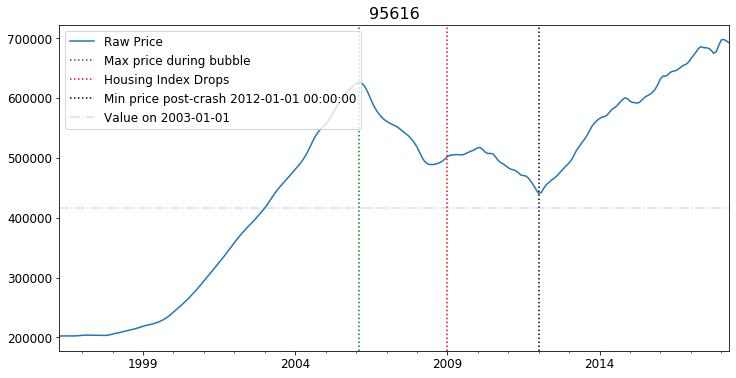

In [516]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

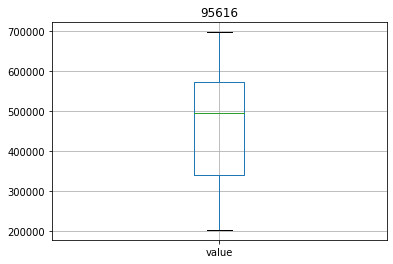

In [517]:
ts.boxplot(column = 'value')
plt.title(geog_area);


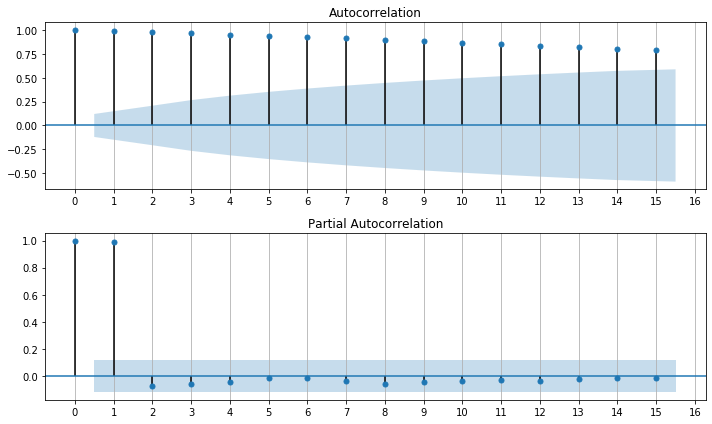

In [518]:
plot_acf_pacf(ts.value)

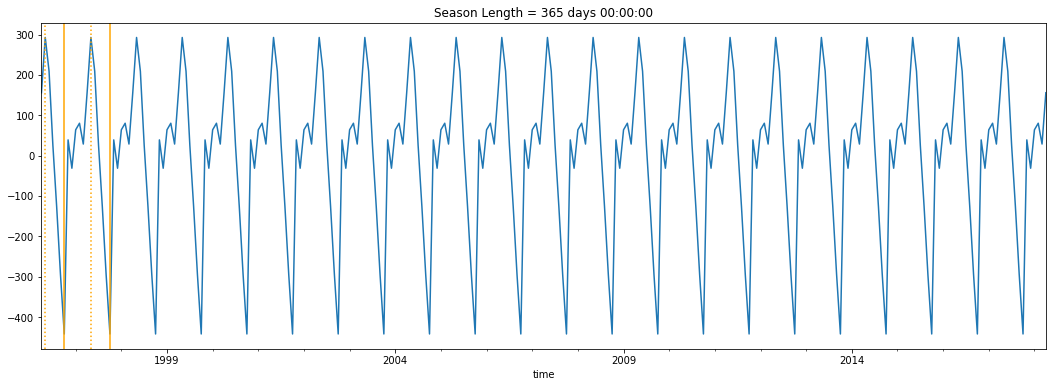

In [519]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [520]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [521]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95616 (Davis):
# ARIMA(0, 0, 0) MSE=24974935922.107
# ARIMA(0, 0, 1) MSE=6358128177.257
# ARIMA(0, 1, 0) MSE=15920047.966
# ARIMA(0, 1, 1) MSE=6483898.607
# ARIMA(0, 2, 0) MSE=6375114.694
# ARIMA(0, 2, 1) MSE=4649057.667
# ARIMA(1, 0, 0) MSE=20383279.193
# ARIMA(1, 1, 0) MSE=6059923.938
# ARIMA(1, 1, 2) MSE=3886452.375
# ARIMA(1, 2, 0) MSE=6014655.665
# ARIMA(1, 2, 1) MSE=4789508.653
# ARIMA(2, 0, 2) MSE=4109109.875
# ARIMA(2, 1, 0) MSE=5376366.750
# ARIMA(2, 1, 2) MSE=3480847.318
# ARIMA(2, 2, 0) MSE=4311036.711
# ARIMA(2, 2, 1) MSE=4189438.434
# ARIMA(2, 2, 2) MSE=3885585.328
# ARIMA(4, 0, 0) MSE=4191843.232
# ARIMA(4, 0, 1) MSE=4041019.626
# ARIMA(4, 0, 2) MSE=3655864.755
# ARIMA(4, 1, 1) MSE=4030826.181
# ARIMA(4, 2, 0) MSE=4194786.920
# ARIMA(6, 0, 0) MSE=4066064.655
# ARIMA(6, 0, 1) MSE=4199809.424
# ARIMA(6, 1, 1) MSE=3960086.491
# ARIMA(6, 2, 0) MSE=4232505.877
# ARIMA(8, 0, 0) MSE=4141034.620
# ARIMA(8, 2, 0) MSE=4289118.952
# ARIMA(10, 0, 0) MSE=4221151.326
# Best ARIMA(2, 1, 2) MSE=3480847.318
# Best ARIMA order = (2, 1, 2)

Best ARIMA for Davis is (2,1,2), with MSE=3480557.249

For 95616 (Davis):
Best ARIMA order = (2, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2235.766
Method:                       css-mle   S.D. of innovations           1139.451
Date:                Tue, 24 Mar 2020   AIC                           4483.533
Time:                        13:32:33   BIC                           4504.989
Sample:                    05-01-1996   HQIC                          4492.155
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1754.3863    715.123      2.453      0.015     352.771    3156.002
ar.L1.D.value     0.2768      0.068      4.059      0.000       0.143     

(['95616'],
 ['Davis'],
 ['Yolo'],
 [(2, 1, 2)],
 [717863.06],
 [619575.34],
 [816150.79],
 [692300.0],
 [3.69],
 [-10.5],
 [17.89])

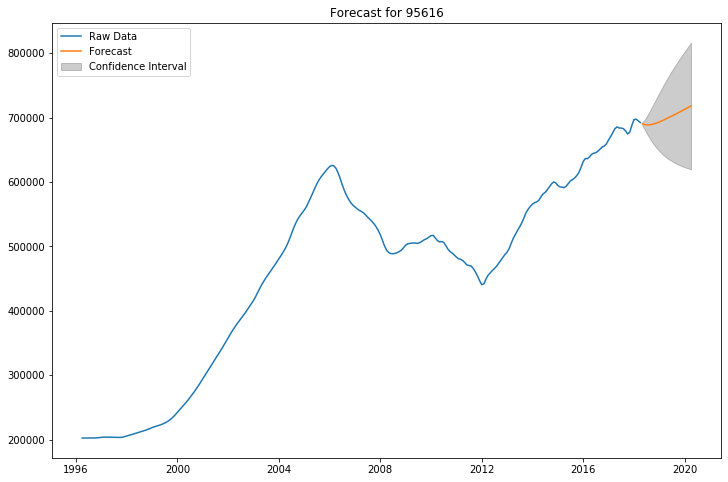

In [522]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (2, 1, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [523]:
print_results_lists()

(['95616'],
 ['Davis'],
 ['Yolo'],
 [(2, 1, 2)],
 [717863.06],
 [619575.34],
 [816150.79],
 [692300.0],
 [3.69],
 [-10.5],
 [17.89])

In [524]:
# pop_results_lists()   # use this if the last model results were in error 

In [525]:
# print_results_lists()

### Recommendation--Zip code 95616:   mediocre investment opportunity

By the model prediction, I would expect to see a 3.697% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -10.5% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 17.894% change in price by April 1, 2020.



## SacMetro: 95619 (Diamond Springs) -- solid investment candidate

### Set up dataframe

In [526]:
geog_area = '95619'

In [527]:
city = 'Diamond Springs'

In [528]:
county = 'El Dorado'

In [529]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [530]:
ts = ts.resample('MS').asfreq()

In [531]:
ts.head()

Metro     MetroState CountyName             City    Zip  \
time                                                                       
1996-04-01  Sacramento  Sacramento CA  El Dorado  Diamond Springs  95619   
1996-05-01  Sacramento  Sacramento CA  El Dorado  Diamond Springs  95619   
1996-06-01  Sacramento  Sacramento CA  El Dorado  Diamond Springs  95619   
1996-07-01  Sacramento  Sacramento CA  El Dorado  Diamond Springs  95619   
1996-08-01  Sacramento  Sacramento CA  El Dorado  Diamond Springs  95619   

               value  
time                  
1996-04-01  122400.0  
1996-05-01  121800.0  
1996-06-01  121200.0  
1996-07-01  120700.0  
1996-08-01  120200.0

### Visualizations

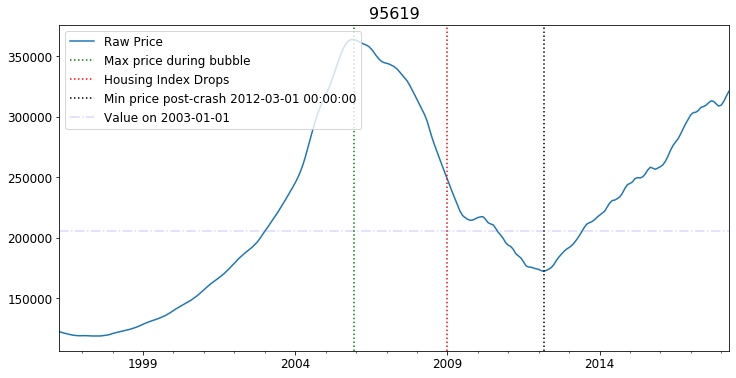

In [532]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

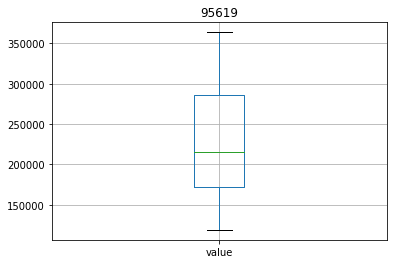

In [533]:
ts.boxplot(column = 'value')
plt.title(geog_area);


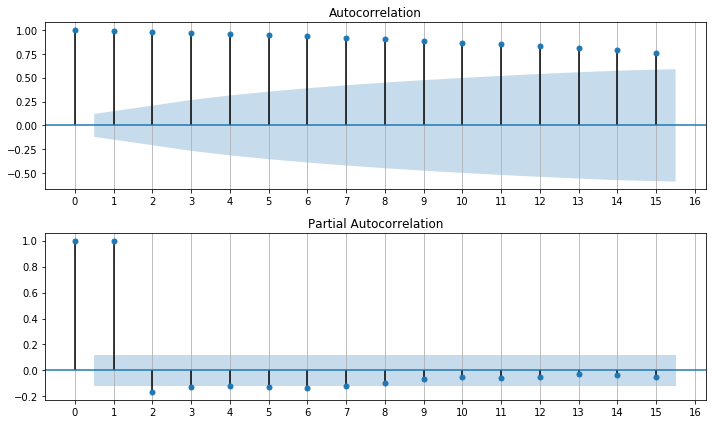

In [534]:
plot_acf_pacf(ts.value)

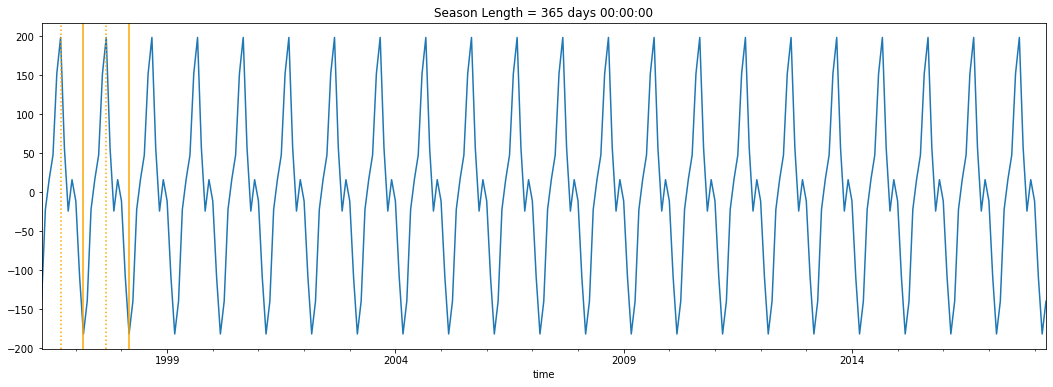

In [535]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [536]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [537]:
# This function will run parameter tuning and will append lists
# Uncomment to run

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95619 (Diamond Springs):
# ARIMA(0, 0, 0) MSE=2451339099.734
# ARIMA(0, 1, 0) MSE=4707454.395
# ARIMA(0, 1, 1) MSE=2047512.157
# ARIMA(0, 2, 0) MSE=1270172.339
# ARIMA(0, 2, 1) MSE=1042876.624
# ARIMA(0, 2, 2) MSE=1117413.669
# ARIMA(1, 1, 0) MSE=1238963.696
# ARIMA(1, 1, 1) MSE=997222.628
# ARIMA(1, 1, 2) MSE=1086835.684
# ARIMA(1, 2, 0) MSE=1251717.093
# ARIMA(1, 2, 1) MSE=1061955.573
# ARIMA(1, 2, 2) MSE=936561.593
# ARIMA(2, 0, 1) MSE=1002747.561
# ARIMA(2, 0, 2) MSE=1085518.475
# ARIMA(2, 1, 0) MSE=1196477.071
# ARIMA(2, 1, 1) MSE=1017853.390
# ARIMA(2, 1, 2) MSE=844879.104
# ARIMA(2, 2, 0) MSE=967093.287
# ARIMA(2, 2, 1) MSE=940094.652
# ARIMA(4, 0, 1) MSE=917935.450
# ARIMA(4, 1, 1) MSE=926049.010
# ARIMA(4, 2, 0) MSE=956773.299
# ARIMA(4, 2, 1) MSE=956654.141
# ARIMA(6, 0, 1) MSE=934282.283
# ARIMA(6, 2, 0) MSE=907053.294
# ARIMA(8, 2, 0) MSE=891505.947
# ARIMA(8, 2, 1) MSE=932219.738
# ARIMA(10, 1, 1) MSE=896085.220
# Best ARIMA(2, 1, 2) MSE=844879.104
# Best ARIMA order = (2, 1, 2)

For 95619 (Diamond Springs):
Best ARIMA order = (2, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2074.470
Method:                       css-mle   S.D. of innovations            619.869
Date:                Tue, 24 Mar 2020   AIC                           4160.940
Time:                        13:32:44   BIC                           4182.396
Sample:                    05-01-1996   HQIC                          4169.562
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           752.6516    701.632      1.073      0.284    -622.522    2127.825
ar.L1.D.value     0.2992      0.066      4.505      0.000       

(['95616', '95619'],
 ['Davis', 'Diamond Springs'],
 ['Yolo', 'El Dorado'],
 [(2, 1, 2), (2, 1, 2)],
 [717863.06, 355774.45],
 [619575.34, 275292.09],
 [816150.79, 436256.81],
 [692300.0, 321100.0],
 [3.69, 10.8],
 [-10.5, -14.27],
 [17.89, 35.86])

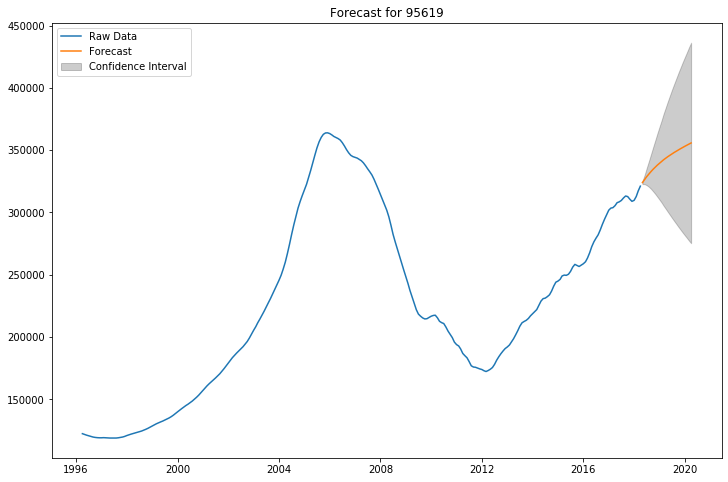

In [538]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (2, 1, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [539]:
print_results_lists()

(['95616', '95619'],
 ['Davis', 'Diamond Springs'],
 ['Yolo', 'El Dorado'],
 [(2, 1, 2), (2, 1, 2)],
 [717863.06, 355774.45],
 [619575.34, 275292.09],
 [816150.79, 436256.81],
 [692300.0, 321100.0],
 [3.69, 10.8],
 [-10.5, -14.27],
 [17.89, 35.86])

In [540]:
# pop_results_lists()

In [541]:
# print_results_lists()

### Recommendation--Zip code 95619:  solid investment candidate

By the model prediction, I would expect to see a 10.799% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -14.266% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 35.863% change in price by April 1, 2020.



## SacMetro: 95864 (Arden-Arcade) -- Don't invest

### Set up dataframe

In [542]:
geog_area = '95864'

In [543]:
city = 'Arden-Arcade'

In [544]:
county = 'Sacramento'

In [545]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [546]:
ts

Metro     MetroState  CountyName          City    Zip  \
time                                                                     
1996-04-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-05-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-06-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-07-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-08-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-09-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-10-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-11-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1996-12-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-01-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-02-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-03-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-04-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-05-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-06-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-07-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-08-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-09-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-10-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-11-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1997-12-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-01-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-02-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-03-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-04-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-05-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-06-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-07-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-08-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-09-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-10-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-11-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1998-12-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-01-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-02-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-03-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-04-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-05-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-06-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-07-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-08-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-09-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-10-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-11-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
1999-12-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-01-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-02-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-03-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-04-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-05-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-06-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-07-01  Sacramento  Sacramento CA  Sacramento  Arden-Arcade  95864   
2000-08-01  Sacrament

### Visualizations

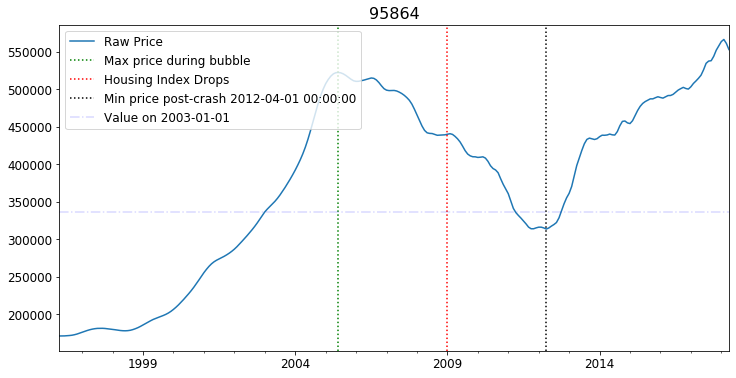

In [547]:
plot_single_geog(df_sac, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

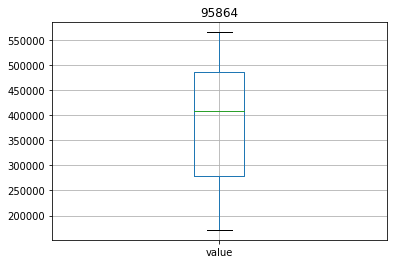

In [548]:
ts.boxplot(column = 'value')
plt.title(geog_area);


In [549]:
# ts = ts.value

ts_values = ts.value

In [550]:
ts_values.head()

time
1996-04-01    171200.0
1996-05-01    171200.0
1996-06-01    171300.0
1996-07-01    171500.0
1996-08-01    171800.0
Name: value, dtype: float64

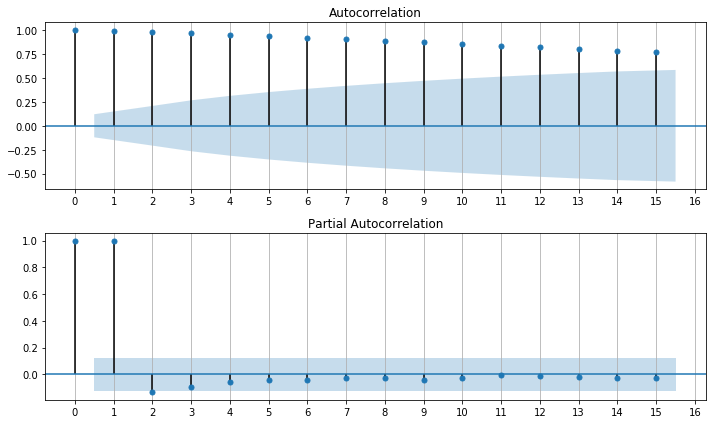

In [551]:
plot_acf_pacf(ts_values, figsize=(10,6), lags=15)

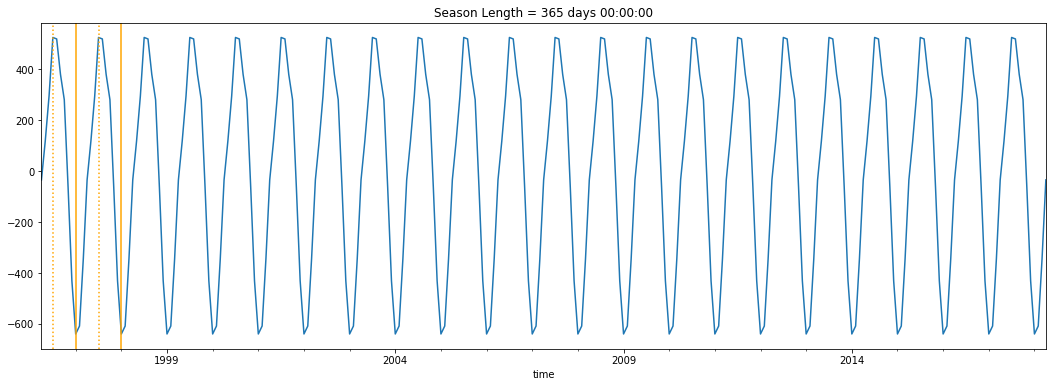

In [552]:
plot_seasonal_decomp(ts_values);

### ARIMA parameters tuning

In [553]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [554]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95864 (Arden-Arcade):
# ARIMA(0, 0, 0) MSE=11465800862.983
# ARIMA(0, 0, 1) MSE=2934591813.460
# ARIMA(0, 1, 0) MSE=23929461.769
# ARIMA(0, 1, 1) MSE=7436550.488
# ARIMA(0, 2, 0) MSE=6012004.342
# ARIMA(0, 2, 1) MSE=4074923.813
# ARIMA(1, 0, 0) MSE=26872727.311
# ARIMA(1, 1, 0) MSE=5831037.129
# ARIMA(1, 1, 2) MSE=3804400.774
# ARIMA(1, 2, 0) MSE=5453493.274
# ARIMA(1, 2, 1) MSE=4203720.406
# ARIMA(2, 0, 2) MSE=3907357.655
# ARIMA(2, 1, 0) MSE=5031187.153
# ARIMA(2, 1, 1) MSE=3912614.690
# ARIMA(2, 2, 0) MSE=4083235.361
# ARIMA(2, 2, 1) MSE=3819895.118
# ARIMA(4, 0, 1) MSE=3687337.270
# ARIMA(4, 1, 1) MSE=3728162.247
# ARIMA(4, 1, 2) MSE=3872462.356
# ARIMA(4, 2, 0) MSE=3886941.394
# ARIMA(6, 1, 1) MSE=3888790.791
# ARIMA(6, 2, 0) MSE=4030564.248
# ARIMA(8, 0, 1) MSE=3875716.402
# ARIMA(8, 0, 2) MSE=3678342.917
# ARIMA(8, 1, 1) MSE=3861795.714
# ARIMA(8, 2, 0) MSE=3963288.930
# ARIMA(8, 2, 1) MSE=3928006.853
# Best ARIMA(8, 0, 2) MSE=3678342.917
# Best ARIMA order = (8, 0, 2)

For 95864 (Arden-Arcade):
Best ARIMA order = (8, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(8, 2)   Log Likelihood               -2246.409
Method:                       css-mle   S.D. of innovations           1094.652
Date:                Tue, 24 Mar 2020   AIC                           4516.817
Time:                        13:33:26   BIC                           4559.774
Sample:                    04-01-1996   HQIC                          4534.076
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.746e+05   5.71e+04      6.560      0.000    2.63e+05    4.87e+05
ar.L1.value     1.9615      0.000   1.62e+04      0.000       1.961      

(['95616', '95619', '95864'],
 ['Davis', 'Diamond Springs', 'Arden-Arcade'],
 ['Yolo', 'El Dorado', 'Sacramento'],
 [(2, 1, 2), (2, 1, 2), (8, 0, 2)],
 [717863.06, 355774.45, 449047.92],
 [619575.34, 275292.09, 327568.68],
 [816150.79, 436256.81, 570527.16],
 [692300.0, 321100.0, 552700.0],
 [3.69, 10.8, -18.75],
 [-10.5, -14.27, -40.73],
 [17.89, 35.86, 3.23])

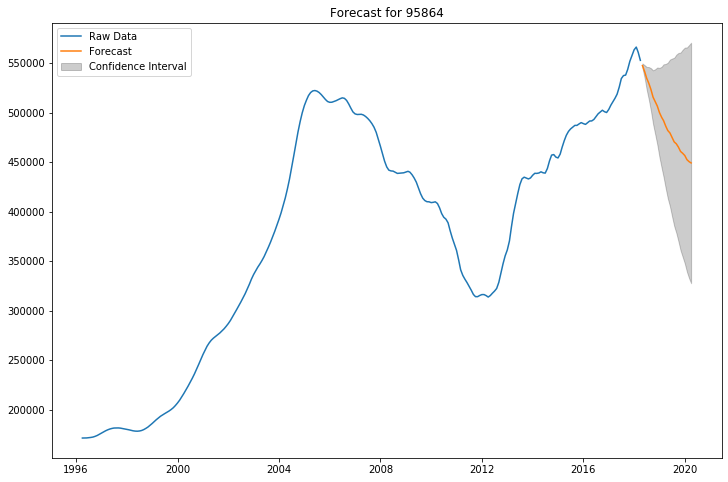

In [555]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (8, 0, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [556]:
print_results_lists()

(['95616', '95619', '95864'],
 ['Davis', 'Diamond Springs', 'Arden-Arcade'],
 ['Yolo', 'El Dorado', 'Sacramento'],
 [(2, 1, 2), (2, 1, 2), (8, 0, 2)],
 [717863.06, 355774.45, 449047.92],
 [619575.34, 275292.09, 327568.68],
 [816150.79, 436256.81, 570527.16],
 [692300.0, 321100.0, 552700.0],
 [3.69, 10.8, -18.75],
 [-10.5, -14.27, -40.73],
 [17.89, 35.86, 3.23])

In [557]:
# pop_results_lists()

In [558]:
# print_results_lists()

### Recommendation for ZIP code 95864:  Don't invest

By the model prediction, I would expect to see a -18.754% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -40.733% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 3.225% change in price by April 1, 2020.

## SacMetro:  95831 (Sacramento_Pocket) -- Don't invest; lots of downside risk

### Set up dataframe

In [559]:
geog_area = '95831'

In [560]:
city = 'Sacramento_Pocket'

In [561]:
county = 'Sacramento'

In [562]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [563]:
ts.head()

Metro     MetroState  CountyName        City    Zip     value
time                                                                          
1996-04-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  162600.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  162000.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  161200.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  160400.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  159500.0

In [564]:
ts = ts.resample('MS').asfreq()

In [565]:
ts.head()

Metro     MetroState  CountyName        City    Zip     value
time                                                                          
1996-04-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  162600.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  162000.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  161200.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  160400.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95831  159500.0

### Visualizations

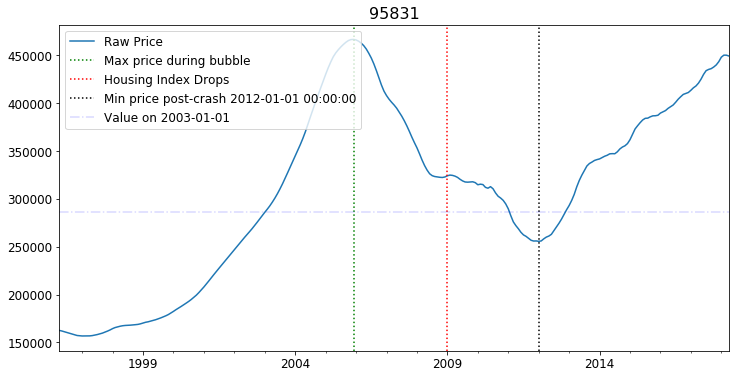

In [566]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

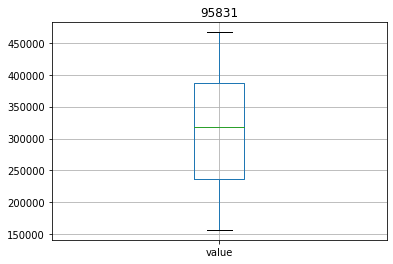

In [567]:
ts.boxplot(column = 'value')
plt.title(geog_area);


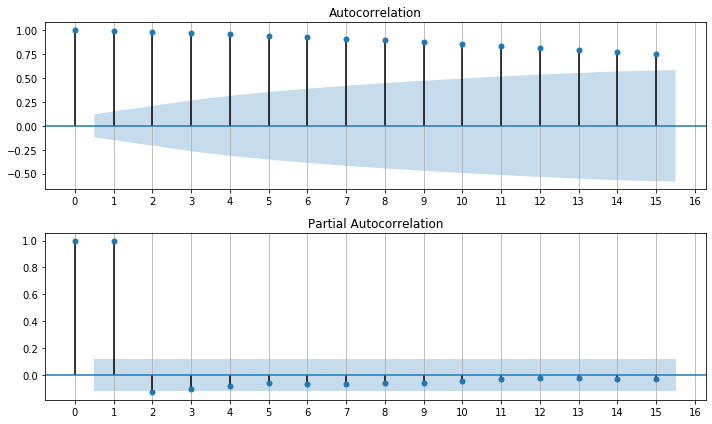

In [568]:
plot_acf_pacf(ts.value)

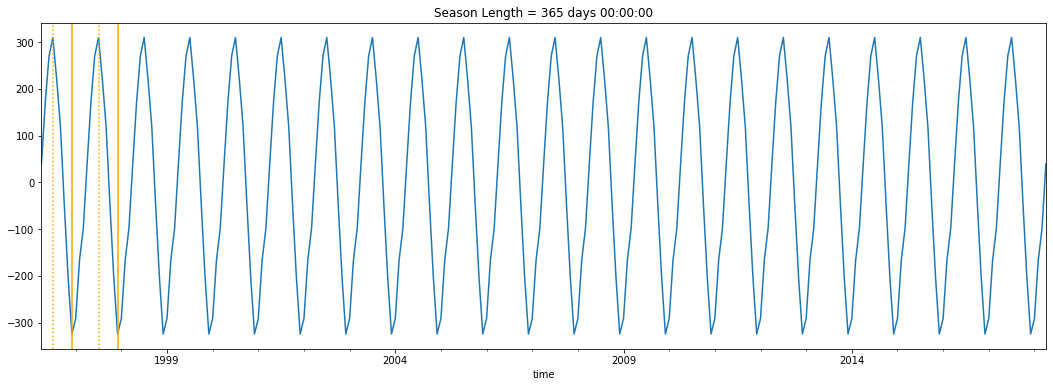

In [569]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [570]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [571]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95831 (Sacramento_Pocket):
# ARIMA(0, 0, 0) MSE=6237336634.628
# ARIMA(0, 1, 0) MSE=8199888.411
# ARIMA(0, 1, 1) MSE=2806201.867
# ARIMA(0, 2, 0) MSE=1259854.053
# ARIMA(0, 2, 1) MSE=1039138.690
# ARIMA(0, 2, 2) MSE=1025012.347
# ARIMA(1, 1, 0) MSE=1228939.590
# ARIMA(1, 1, 1) MSE=993203.816
# ARIMA(1, 1, 2) MSE=993776.336
# ARIMA(1, 2, 0) MSE=1179480.375
# ARIMA(1, 2, 1) MSE=1040275.696
# ARIMA(1, 2, 2) MSE=1013140.983
# ARIMA(2, 0, 1) MSE=997994.893
# ARIMA(2, 0, 2) MSE=997261.843
# ARIMA(2, 1, 0) MSE=1132188.559
# ARIMA(2, 1, 1) MSE=1000728.542
# ARIMA(2, 1, 2) MSE=984631.634
# ARIMA(2, 2, 0) MSE=977438.093
# ARIMA(2, 2, 1) MSE=965484.844
# ARIMA(2, 2, 2) MSE=929500.562
# ARIMA(4, 0, 1) MSE=940918.867
# ARIMA(4, 0, 2) MSE=897798.921
# ARIMA(4, 1, 0) MSE=1003127.984
# ARIMA(4, 1, 1) MSE=1018978.741
# ARIMA(4, 1, 2) MSE=1014067.817
# ARIMA(4, 2, 0) MSE=1063775.724
# ARIMA(4, 2, 1) MSE=1099030.175
# ARIMA(6, 0, 1) MSE=1018764.549
# ARIMA(6, 0, 2) MSE=962846.532
# ARIMA(6, 1, 1) MSE=1046905.716
# ARIMA(6, 2, 0) MSE=1072513.045
# ARIMA(6, 2, 1) MSE=1051610.760
# ARIMA(8, 0, 2) MSE=1002869.598
# ARIMA(8, 2, 0) MSE=1112408.641
# ARIMA(8, 2, 1) MSE=1104552.204
# Best ARIMA(4, 0, 2) MSE=897798.921
# Best ARIMA order = (4, 0, 2)

For 95831 (Sacramento_Pocket):
Best ARIMA order = (4, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(4, 2)   Log Likelihood               -2117.342
Method:                       css-mle   S.D. of innovations            694.322
Date:                Tue, 24 Mar 2020   AIC                           4250.683
Time:                        13:33:45   BIC                           4279.321
Sample:                    04-01-1996   HQIC                          4262.190
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.083e+05   3.93e+04      7.847      0.000    2.31e+05    3.85e+05
ar.L1.value     1.1399      0.098     11.687      0.000       0.949 

(['95616', '95619', '95864', '95831'],
 ['Davis', 'Diamond Springs', 'Arden-Arcade', 'Sacramento_Pocket'],
 ['Yolo', 'El Dorado', 'Sacramento', 'Sacramento'],
 [(2, 1, 2), (2, 1, 2), (8, 0, 2), (4, 0, 2)],
 [717863.06, 355774.45, 449047.92, 386994.52],
 [619575.34, 275292.09, 327568.68, 292621.1],
 [816150.79, 436256.81, 570527.16, 481367.94],
 [692300.0, 321100.0, 552700.0, 449300.0],
 [3.69, 10.8, -18.75, -13.87],
 [-10.5, -14.27, -40.73, -34.87],
 [17.89, 35.86, 3.23, 7.14])

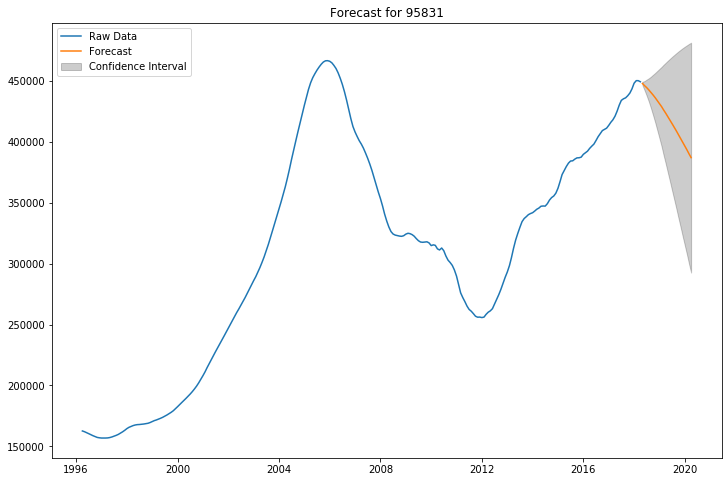

In [572]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4,0,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [573]:
print_results_lists()

(['95616', '95619', '95864', '95831'],
 ['Davis', 'Diamond Springs', 'Arden-Arcade', 'Sacramento_Pocket'],
 ['Yolo', 'El Dorado', 'Sacramento', 'Sacramento'],
 [(2, 1, 2), (2, 1, 2), (8, 0, 2), (4, 0, 2)],
 [717863.06, 355774.45, 449047.92, 386994.52],
 [619575.34, 275292.09, 327568.68, 292621.1],
 [816150.79, 436256.81, 570527.16, 481367.94],
 [692300.0, 321100.0, 552700.0, 449300.0],
 [3.69, 10.8, -18.75, -13.87],
 [-10.5, -14.27, -40.73, -34.87],
 [17.89, 35.86, 3.23, 7.14])

In [574]:
# pop_results_lists()

In [575]:
# print_results_lists()

### Zip code 95831:  don't invest; lots of downside risk

By the model prediction, I would expect to see a -13.413% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -32.77% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 5.945% change in price by April 1, 2020.

## SacMetro:  95811 (Sacramento_DosRios) -- Mediocre predicted returns

### Set up dataframe

In [576]:
geog_area = '95811'

In [577]:
city = 'Sacramento_DosRios'

In [578]:
county = 'Sacramento'

In [579]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [580]:
ts.head()

Metro     MetroState  CountyName        City    Zip     value
time                                                                          
1996-04-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  119400.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  119200.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  119000.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  118700.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  118500.0

In [581]:
ts = ts.resample('MS').asfreq()

In [582]:
ts.head()

Metro     MetroState  CountyName        City    Zip     value
time                                                                          
1996-04-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  119400.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  119200.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  119000.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  118700.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95811  118500.0

### Visualizations

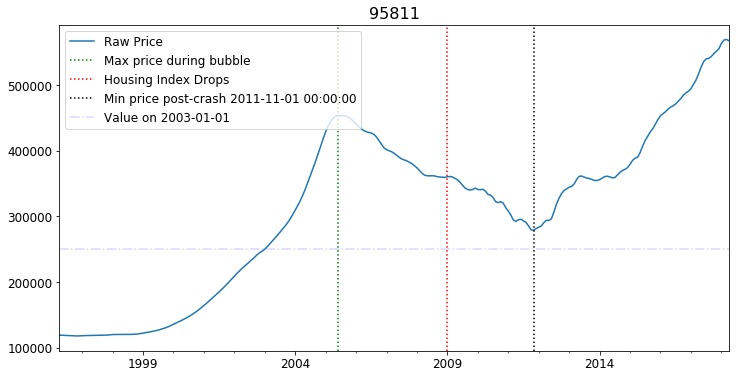

In [583]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

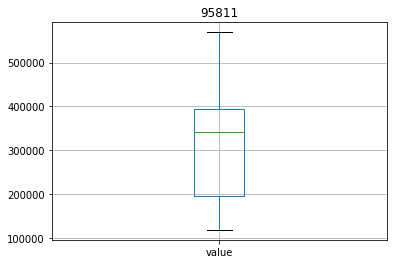

In [584]:
ts.boxplot(column = 'value')
plt.title(geog_area);


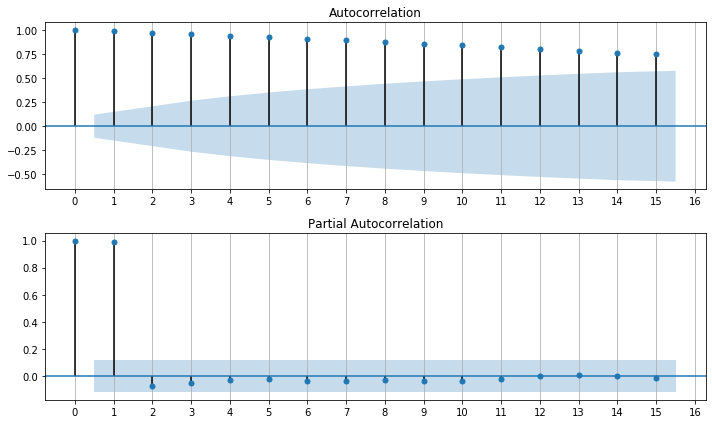

In [585]:
plot_acf_pacf(ts.value)

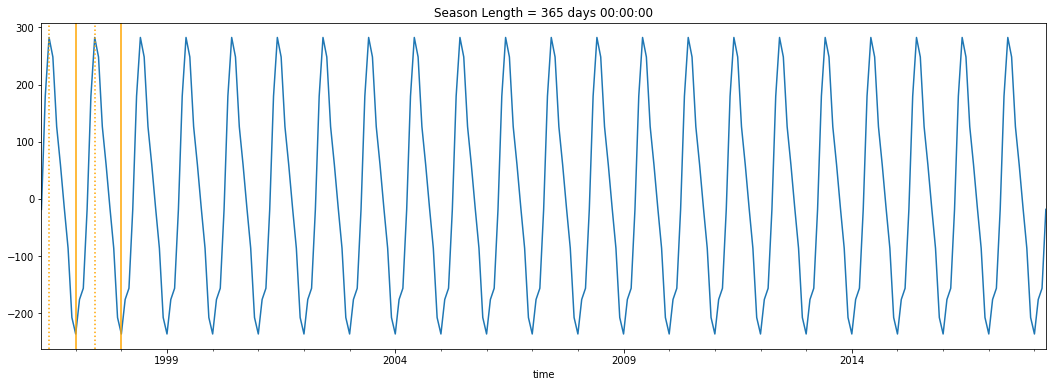

In [586]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [587]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [588]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95811 (Sacramento_DosRios):
# ARIMA(0, 0, 0) MSE=18520983415.502
# ARIMA(0, 1, 0) MSE=17442930.600
# ARIMA(0, 1, 1) MSE=6663913.088
# ARIMA(0, 2, 0) MSE=6259233.402
# ARIMA(0, 2, 1) MSE=4809950.544
# ARIMA(0, 2, 2) MSE=4652346.488
# ARIMA(1, 1, 0) MSE=5929428.514
# ARIMA(1, 1, 1) MSE=4308533.425
# ARIMA(1, 1, 2) MSE=4415472.378
# ARIMA(1, 2, 0) MSE=5976013.490
# ARIMA(1, 2, 1) MSE=4869473.590
# ARIMA(1, 2, 2) MSE=4361666.655
# ARIMA(2, 0, 1) MSE=4394796.652
# ARIMA(2, 0, 2) MSE=4483510.578
# ARIMA(2, 1, 0) MSE=5423012.783
# ARIMA(2, 1, 1) MSE=4418327.311
# ARIMA(2, 1, 2) MSE=4240181.627
# ARIMA(2, 2, 0) MSE=4324646.641
# ARIMA(2, 2, 1) MSE=4186248.281
# ARIMA(4, 0, 1) MSE=4065706.695
# ARIMA(4, 0, 2) MSE=4140724.899
# ARIMA(4, 1, 0) MSE=4234643.204
# ARIMA(4, 1, 1) MSE=4218865.415
# ARIMA(4, 2, 0) MSE=4228783.375
# ARIMA(4, 2, 1) MSE=4121935.763
# ARIMA(6, 0, 1) MSE=4073047.098
# ARIMA(6, 1, 0) MSE=3905200.379
# ARIMA(6, 1, 1) MSE=3814571.556
# ARIMA(8, 2, 0) MSE=4101973.234
# ARIMA(10, 1, 0) MSE=3794247.844
# Best ARIMA(10, 1, 0) MSE=3794247.844
# Best ARIMA order = (10, 1, 0)

For 95811 (Sacramento_DosRios):
Best ARIMA order = (10, 1, 0)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                ARIMA(10, 1, 0)   Log Likelihood               -2251.853
Method:                       css-mle   S.D. of innovations           1214.967
Date:                Tue, 24 Mar 2020   AIC                           4527.706
Time:                        13:33:57   BIC                           4570.618
Sample:                    05-01-1996   HQIC                          4544.949
                         - 04-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1537.8361    878.462      1.751      0.081    -183.919    3259.591
ar.L1.D.value      1.4319      0.061     23.473      0.00

(['95616', '95619', '95864', '95831', '95811'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios'],
 ['Yolo', 'El Dorado', 'Sacramento', 'Sacramento', 'Sacramento'],
 [(2, 1, 2), (2, 1, 2), (8, 0, 2), (4, 0, 2), (10, 1, 0)],
 [717863.06, 355774.45, 449047.92, 386994.52, 570598.7],
 [619575.34, 275292.09, 327568.68, 292621.1, 459606.77],
 [816150.79, 436256.81, 570527.16, 481367.94, 681590.63],
 [692300.0, 321100.0, 552700.0, 449300.0, 567500.0],
 [3.69, 10.8, -18.75, -13.87, 0.55],
 [-10.5, -14.27, -40.73, -34.87, -19.01],
 [17.89, 35.86, 3.23, 7.14, 20.1])

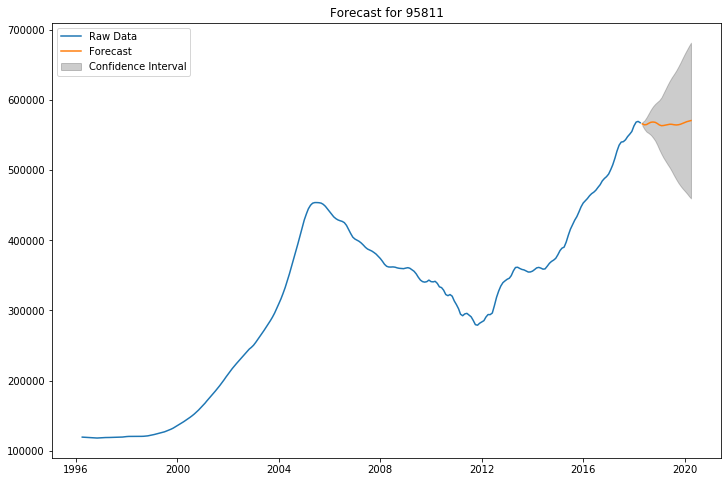

In [589]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (10,1,0)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [590]:
print_results_lists()

(['95616', '95619', '95864', '95831', '95811'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios'],
 ['Yolo', 'El Dorado', 'Sacramento', 'Sacramento', 'Sacramento'],
 [(2, 1, 2), (2, 1, 2), (8, 0, 2), (4, 0, 2), (10, 1, 0)],
 [717863.06, 355774.45, 449047.92, 386994.52, 570598.7],
 [619575.34, 275292.09, 327568.68, 292621.1, 459606.77],
 [816150.79, 436256.81, 570527.16, 481367.94, 681590.63],
 [692300.0, 321100.0, 552700.0, 449300.0, 567500.0],
 [3.69, 10.8, -18.75, -13.87, 0.55],
 [-10.5, -14.27, -40.73, -34.87, -19.01],
 [17.89, 35.86, 3.23, 7.14, 20.1])

In [591]:
# pop_results_lists()

In [592]:
# print_results_lists()

### Zip code 95811:  Don't invest--mediocre predicted returns with significant potential downside (but also significant potential upside)

By the model prediction, I would expect to see a 0.546% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -19.012% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 20.104% change in price by April 1, 2020.

## SacMetro:  95818 (Sacramento_LandPark) -- Do not invest

### Set up dataframe

In [593]:
geog_area = '95818'

In [594]:
city = 'Sacramento_LandPark'

In [595]:
county = 'Sacramento'

In [596]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [597]:
ts.head()

Metro     MetroState  CountyName        City    Zip     value
time                                                                          
1996-04-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144000.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144300.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144500.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144500.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144600.0

In [598]:
ts = ts.resample('MS').asfreq()

In [599]:
ts.head()

Metro     MetroState  CountyName        City    Zip     value
time                                                                          
1996-04-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144000.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144300.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144500.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144500.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Sacramento  95818  144600.0

### Visualizations

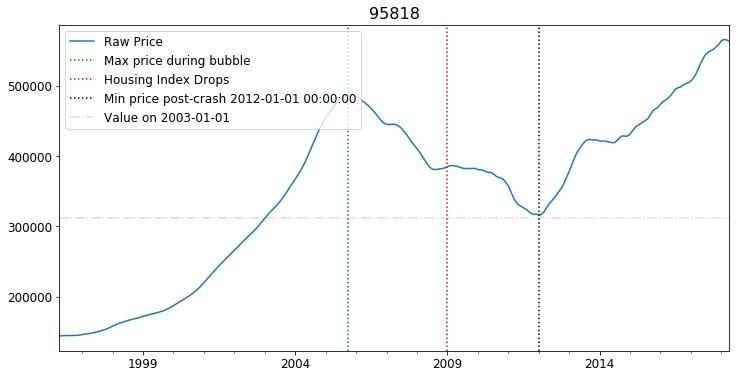

In [600]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

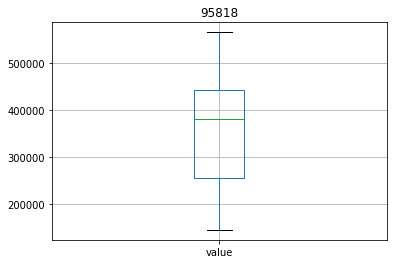

In [601]:
ts.boxplot(column = 'value')
plt.title(geog_area);


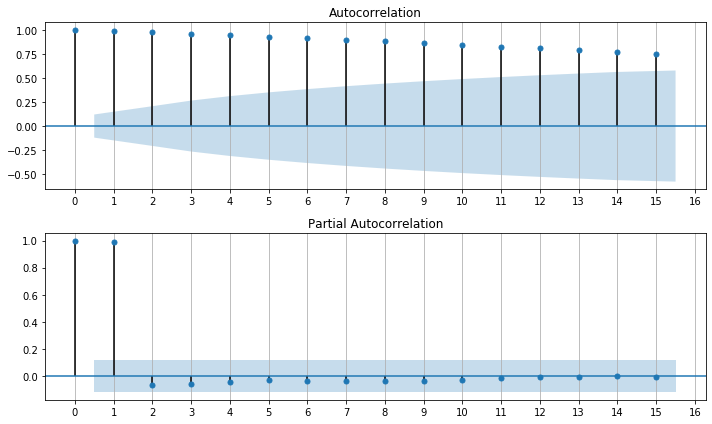

In [602]:
plot_acf_pacf(ts.value)

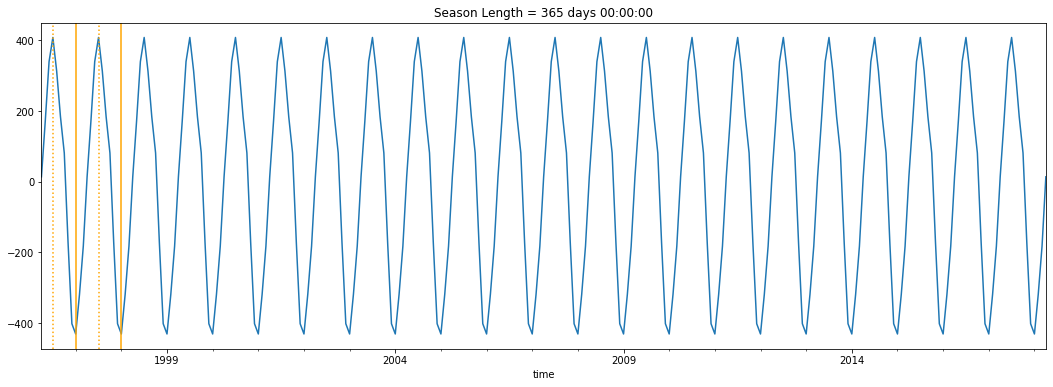

In [603]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [604]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [605]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95818 (Sacramento_LandPark):
# ARIMA(0, 0, 0) MSE=15030221845.905
# ARIMA(0, 0, 1) MSE=3839853199.085
# ARIMA(0, 1, 0) MSE=13853226.433
# ARIMA(0, 1, 1) MSE=4751401.353
# ARIMA(0, 2, 0) MSE=2389199.594
# ARIMA(0, 2, 1) MSE=1959226.911
# ARIMA(0, 2, 2) MSE=2011112.927
# ARIMA(1, 0, 0) MSE=17883620.287
# ARIMA(1, 1, 0) MSE=2327429.087
# ARIMA(1, 1, 1) MSE=1871827.369
# ARIMA(1, 1, 2) MSE=1924694.938
# ARIMA(1, 2, 0) MSE=2163044.788
# ARIMA(1, 2, 1) MSE=1991706.825
# ARIMA(2, 0, 0) MSE=2336085.096
# ARIMA(2, 0, 1) MSE=1887773.535
# ARIMA(2, 0, 2) MSE=1940292.855
# ARIMA(2, 1, 0) MSE=2049005.717
# ARIMA(2, 1, 1) MSE=1903363.993
# ARIMA(2, 2, 0) MSE=1973087.506
# ARIMA(2, 2, 1) MSE=1967258.535
# ARIMA(4, 0, 0) MSE=1931586.710
# ARIMA(4, 0, 1) MSE=1921479.017
# ARIMA(4, 1, 1) MSE=1939752.255
# ARIMA(4, 2, 0) MSE=2034430.135
# ARIMA(4, 2, 1) MSE=2078002.071
# ARIMA(6, 0, 0) MSE=1988625.655
# ARIMA(6, 0, 1) MSE=2024467.046
# ARIMA(6, 1, 1) MSE=2006733.869
# ARIMA(6, 2, 0) MSE=2084413.974
# ARIMA(6, 2, 1) MSE=2101965.381
# ARIMA(8, 0, 0) MSE=2053763.431
# ARIMA(8, 1, 1) MSE=1997711.981
# ARIMA(10, 0, 0) MSE=2126639.939
# ARIMA(10, 2, 1) MSE=2037544.338
# Best ARIMA(1, 1, 1) MSE=1871827.369
# Best ARIMA order = (1, 1, 1)

For 95818 (Sacramento_LandPark):
Best ARIMA order = (1, 1, 1)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2170.032
Method:                       css-mle   S.D. of innovations            893.671
Date:                Tue, 24 Mar 2020   AIC                           4348.063
Time:                        13:34:09   BIC                           4362.367
Sample:                    05-01-1996   HQIC                          4353.811
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1391.9330    968.111      1.438      0.152    -505.530    3289.396
ar.L1.D.value     0.9172      0.024     37.636      0.000   

(['95616', '95619', '95864', '95831', '95811', '95818'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark'],
 ['Yolo', 'El Dorado', 'Sacramento', 'Sacramento', 'Sacramento', 'Sacramento'],
 [(2, 1, 2), (2, 1, 2), (8, 0, 2), (4, 0, 2), (10, 1, 0), (1, 1, 1)],
 [717863.06, 355774.45, 449047.92, 386994.52, 570598.7, 563857.1],
 [619575.34, 275292.09, 327568.68, 292621.1, 459606.77, 464602.96],
 [816150.79, 436256.81, 570527.16, 481367.94, 681590.63, 663111.23],
 [692300.0, 321100.0, 552700.0, 449300.0, 567500.0, 563900.0],
 [3.69, 10.8, -18.75, -13.87, 0.55, -0.01],
 [-10.5, -14.27, -40.73, -34.87, -19.01, -17.61],
 [17.89, 35.86, 3.23, 7.14, 20.1, 17.59])

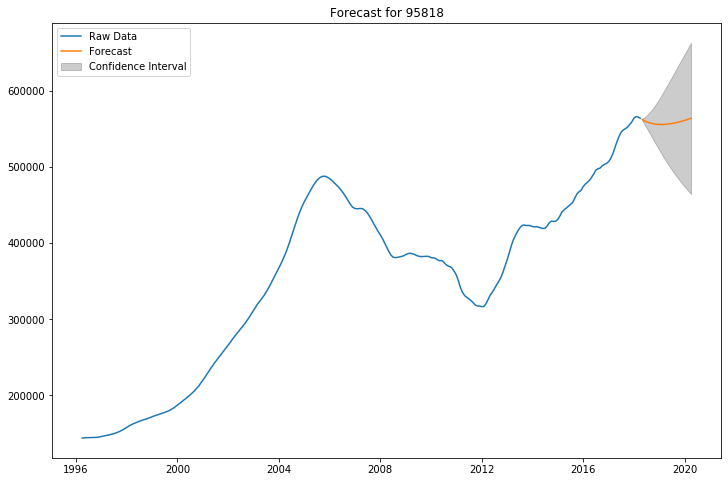

In [606]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (1,1,1)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [607]:
# print_results_lists()

In [608]:
# pop_results_lists()

In [609]:
# print_results_lists()

### Zip code 95818:  Do not invest

By the model prediction, I would expect to see a -0.008% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -17.609% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 17.594% change in price by April 1, 2020.

## SacMetro:  95630 (Folsom)--Poor investment opportunity

### Set up dataframe

In [610]:
geog_area = '95630'

In [611]:
city = 'Folsom'

In [612]:
county = 'Sacramento'

In [613]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [614]:
ts.head()

Metro     MetroState  CountyName    City    Zip     value
time                                                                      
1996-04-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  190000.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  189300.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  188500.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  187800.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  187300.0

In [615]:
ts = ts.resample('MS').asfreq()

In [616]:
ts.head()

Metro     MetroState  CountyName    City    Zip     value
time                                                                      
1996-04-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  190000.0
1996-05-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  189300.0
1996-06-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  188500.0
1996-07-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  187800.0
1996-08-01  Sacramento  Sacramento CA  Sacramento  Folsom  95630  187300.0

### Visualizations

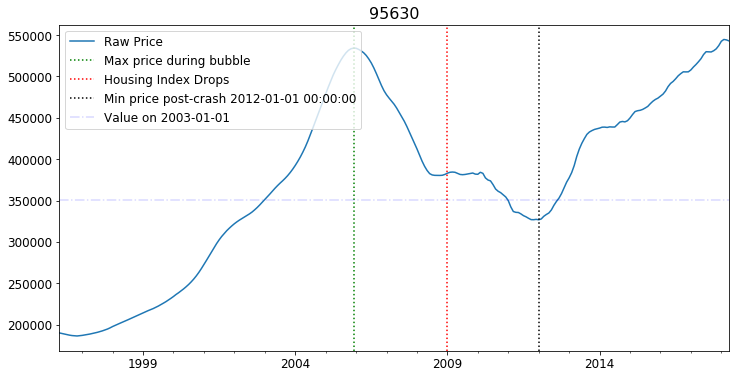

In [617]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

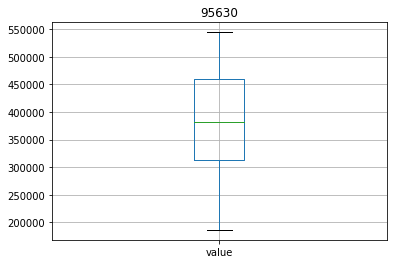

In [618]:
ts.boxplot(column = 'value')
plt.title(geog_area);


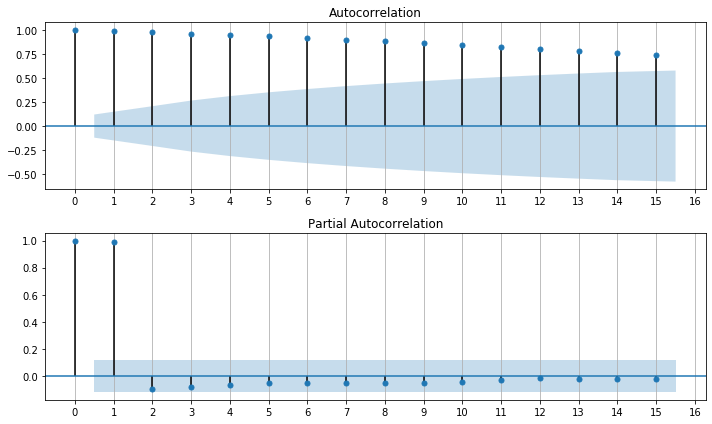

In [619]:
plot_acf_pacf(ts.value)

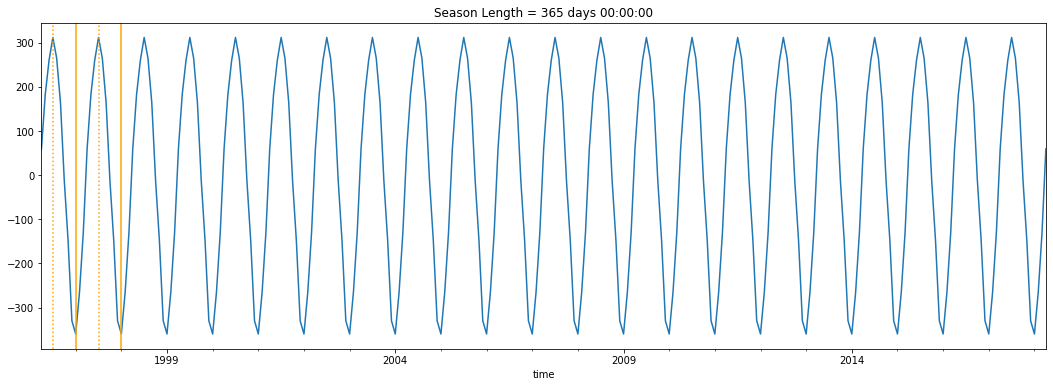

In [620]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [621]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [622]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95630 (Folsom):
# ARIMA(0, 0, 0) MSE=10362329307.124
# ARIMA(0, 0, 1) MSE=2645868476.081
# ARIMA(0, 1, 0) MSE=9743925.543
# ARIMA(0, 1, 1) MSE=3384759.352
# ARIMA(0, 2, 0) MSE=2231534.221
# ARIMA(0, 2, 1) MSE=1765398.821
# ARIMA(0, 2, 2) MSE=1725287.347
# ARIMA(1, 0, 0) MSE=13000642.724
# ARIMA(1, 1, 0) MSE=2165672.110
# ARIMA(1, 1, 1) MSE=1669822.683
# ARIMA(1, 2, 0) MSE=2097363.729
# ARIMA(2, 0, 1) MSE=1683047.579
# ARIMA(2, 1, 0) MSE=1990273.120
# ARIMA(2, 2, 0) MSE=1521322.663
# ARIMA(2, 2, 1) MSE=1573322.566
# ARIMA(2, 2, 2) MSE=1472694.651
# ARIMA(4, 0, 1) MSE=1550263.486
# ARIMA(4, 0, 2) MSE=1444795.113
# ARIMA(4, 1, 1) MSE=1652538.375
# ARIMA(4, 1, 2) MSE=1569702.218
# ARIMA(4, 2, 0) MSE=1668251.905
# ARIMA(4, 2, 1) MSE=1688284.002
# ARIMA(6, 0, 1) MSE=1690896.912
# ARIMA(6, 2, 0) MSE=1632207.031
# ARIMA(6, 2, 1) MSE=1625695.243
# ARIMA(8, 2, 0) MSE=1644832.823
# ARIMA(8, 2, 1) MSE=1662534.232
# ARIMA(10, 2, 0) MSE=1735218.338
# ARIMA(10, 2, 1) MSE=1702121.283
# Best ARIMA(4, 0, 2) MSE=1444795.113
# Best ARIMA order = (4, 0, 2)

For 95630 (Folsom):
Best ARIMA order = (4, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(4, 2)   Log Likelihood               -2158.700
Method:                       css-mle   S.D. of innovations            812.114
Date:                Tue, 24 Mar 2020   AIC                           4333.400
Time:                        13:34:41   BIC                           4362.037
Sample:                    04-01-1996   HQIC                          4344.906
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.737e+05    5.5e+04      6.796      0.000    2.66e+05    4.81e+05
ar.L1.value     1.4051      0.128     10.988      0.000       1.154       1.656

(['95616', '95619', '95864', '95831', '95811', '95818', '95630'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2)],
 [717863.06, 355774.45, 449047.92, 386994.52, 570598.7, 563857.1, 484136.82],
 [619575.34, 275292.09, 327568.68, 292621.1, 459606.77, 464602.96, 382062.81],
 [816150.79, 436256.81, 570527.16, 481367.94, 681590.63, 663111.23, 586210.84],
 [692300.0, 321100.0, 552700.0, 449300.0, 567500.0, 563900.0, 542900.0],
 [3.69, 10.8, -18.75, -13.87, 0.55, -0.01, -10.82],
 [-10.5, -14.27, -40.73, -34.87, -19.01, -17.61, -29.63],
 [17.89, 35.86, 3.23, 7.14, 20.1, 17.59, 7.98])

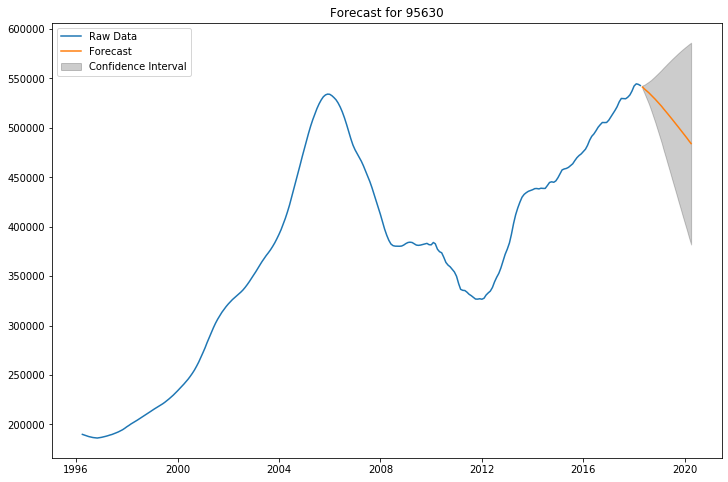

In [623]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4,0,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [624]:
print_results_lists()

(['95616', '95619', '95864', '95831', '95811', '95818', '95630'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2)],
 [717863.06, 355774.45, 449047.92, 386994.52, 570598.7, 563857.1, 484136.82],
 [619575.34, 275292.09, 327568.68, 292621.1, 459606.77, 464602.96, 382062.81],
 [816150.79, 436256.81, 570527.16, 481367.94, 681590.63, 663111.23, 586210.84],
 [692300.0, 321100.0, 552700.0, 449300.0, 567500.0, 563900.0, 542900.0],
 [3.69, 10.8, -18.75, -13.87, 0.55, -0.01, -10.82],
 [-10.5, -14.27, -40.73, -34.87, -19.01, -17.61, -29.63],
 [17.89, 35.86, 3.23, 7.14, 20.1, 17.59, 7.98])

In [625]:
# pop_results_lists()

In [626]:
# print_results_lists()

### Zip code 95630:  Poor investment rating; negative expected return 

By the model prediction, I would expect to see a -10.824% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -29.626% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 7.978% change in price by April 1, 2020.



## SacMetro:  96140 (Carnelian Bay) -- Decent investment opportunity with potentially substantial upside returns and tolerable downside returns¶

### Set up dataframe

In [627]:
geog_area = '96140'

In [628]:
city = 'Carnelian Bay'

In [629]:
county = 'Placer'

In [630]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [631]:
ts.head()

Metro     MetroState CountyName           City    Zip  \
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-05-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-06-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-07-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-08-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   

               value  
time                  
1996-04-01  179100.0  
1996-05-01  179000.0  
1996-06-01  179000.0  
1996-07-01  178900.0  
1996-08-01  178900.0

In [632]:
ts = ts.resample('MS').asfreq()

In [633]:
ts.head()

Metro     MetroState CountyName           City    Zip  \
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-05-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-06-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-07-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   
1996-08-01  Sacramento  Sacramento CA     Placer  Carnelian Bay  96140   

               value  
time                  
1996-04-01  179100.0  
1996-05-01  179000.0  
1996-06-01  179000.0  
1996-07-01  178900.0  
1996-08-01  178900.0

### Visualizations

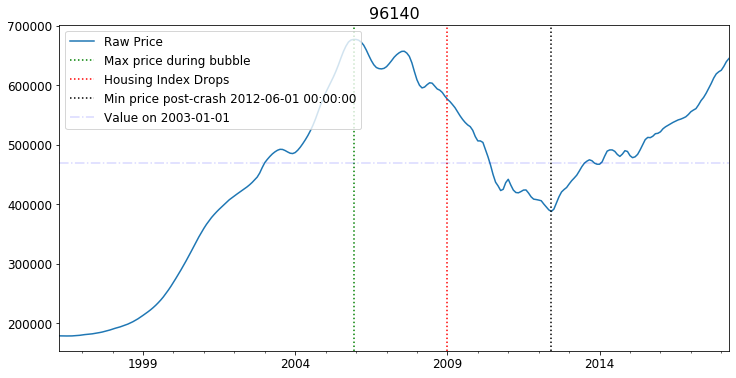

In [634]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

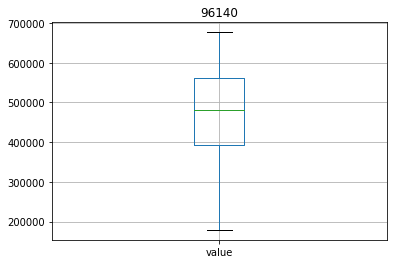

In [635]:
ts.boxplot(column = 'value')
plt.title(geog_area);


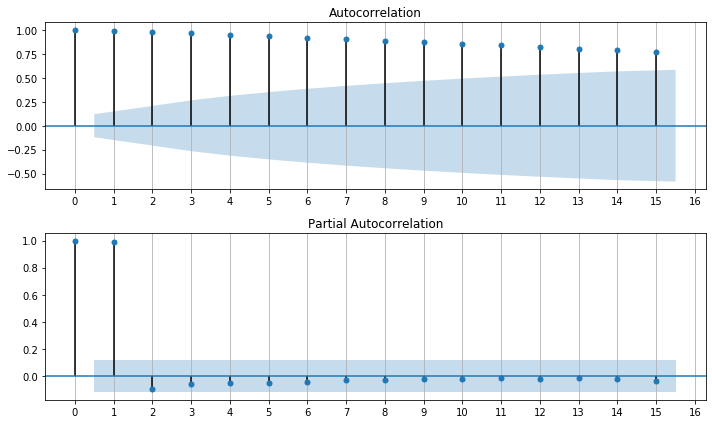

In [636]:
plot_acf_pacf(ts.value)

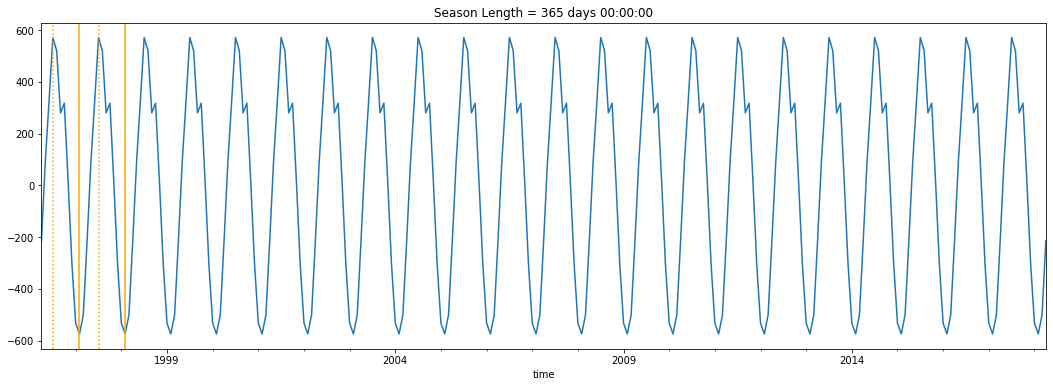

In [637]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [638]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [639]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 96140 (Carnelian Bay):
# ARIMA(0, 0, 0) MSE=6340073169.802
# ARIMA(0, 0, 1) MSE=1653470877.352
# ARIMA(0, 1, 0) MSE=22637370.726
# ARIMA(0, 1, 1) MSE=10760383.623
# ARIMA(0, 2, 0) MSE=12994079.688
# ARIMA(0, 2, 1) MSE=10562560.427
# ARIMA(1, 0, 0) MSE=27514928.547
# ARIMA(1, 1, 0) MSE=12028414.298
# ARIMA(1, 2, 0) MSE=12548849.515
# ARIMA(2, 0, 0) MSE=12135396.057
# ARIMA(2, 1, 0) MSE=10767593.483
# ARIMA(2, 1, 2) MSE=7013523.951
# ARIMA(2, 2, 0) MSE=10270049.843
# ARIMA(2, 2, 1) MSE=10534293.196
# ARIMA(4, 0, 0) MSE=10799618.150
# ARIMA(4, 0, 1) MSE=9876824.779
# ARIMA(4, 0, 2) MSE=7925502.537
# ARIMA(4, 1, 0) MSE=9926713.152
# ARIMA(4, 1, 1) MSE=10174103.377
# ARIMA(4, 2, 0) MSE=10270399.321
# ARIMA(6, 0, 0) MSE=9903809.352
# ARIMA(6, 0, 1) MSE=10764584.137
# ARIMA(6, 0, 2) MSE=7829783.463
# ARIMA(6, 2, 0) MSE=9674385.494
# ARIMA(8, 0, 0) MSE=9354923.086
# ARIMA(10, 0, 0) MSE=9723833.074
# Best ARIMA(2, 1, 2) MSE=7013523.951
# Best ARIMA order = (2, 1, 2)

For 96140 (Carnelian Bay):
Best ARIMA order = (2, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2353.884
Method:                       css-mle   S.D. of innovations           1780.582
Date:                Tue, 24 Mar 2020   AIC                           4719.768
Time:                        13:35:02   BIC                           4741.223
Sample:                    05-01-1996   HQIC                          4728.389
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1757.2551    893.945      1.966      0.050       5.155    3509.355
ar.L1.D.value     0.1234      0.067      1.830      0.068      -0.

(['95616', '95619', '95864', '95831', '95811', '95818', '95630', '96140'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  813115.17],
 [692300.0,
  321100.0,
  552700.0,
  449300.0,
  567500.0,
  563900.0,
  542900.0,
  644600.0],
 [3.69, 10.8, -18.75, -13.87, 0.55, -0.01, -10.82, 6.55],
 [-10.5, -14.27, -40.73, -34.87, -19.01, -17.61, -29.63, -13.04],
 [17.89, 35.86

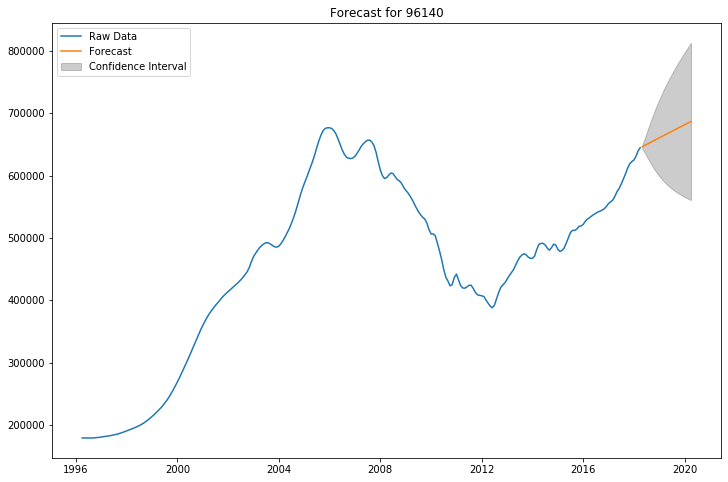

In [640]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (2,1,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [641]:
print_results_lists()

(['95616', '95619', '95864', '95831', '95811', '95818', '95630', '96140'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  813115.17],
 [692300.0,
  321100.0,
  552700.0,
  449300.0,
  567500.0,
  563900.0,
  542900.0,
  644600.0],
 [3.69, 10.8, -18.75, -13.87, 0.55, -0.01, -10.82, 6.55],
 [-10.5, -14.27, -40.73, -34.87, -19.01, -17.61, -29.63, -13.04],
 [17.89, 35.86

In [642]:
# pop_results_lists()

In [643]:
# print_results_lists()

### Zip code 96140 (Carnelian Bay):  Decent investment opportunity with potentially substantial upside returns and tolerable downside returns

By the model prediction, I would expect to see a 6.549% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -13.044% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 26.143% change in price by April 1, 2020.

## SacMetro:  95672 (Rescue) -- Excellent investment opportunity 

### Set up dataframe

In [644]:
geog_area = '95672'

In [645]:
city = 'Rescue'

In [646]:
county = 'El Dorado'

In [647]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [648]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196600.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196700.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196900.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  197000.0

In [649]:
ts = ts.resample('MS').asfreq()

In [650]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196600.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196700.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  196900.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Rescue  95672  197000.0

### Visualizations

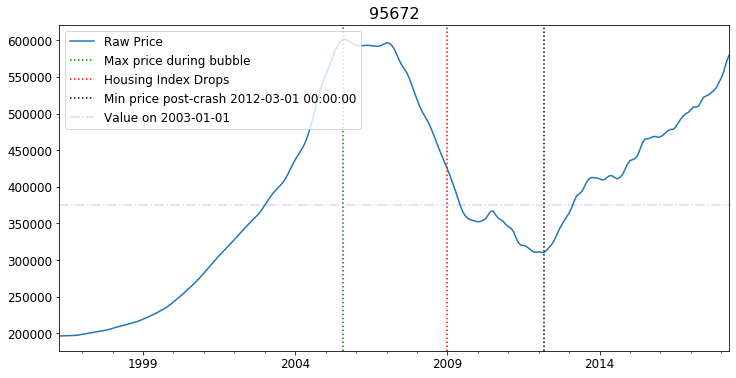

In [651]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

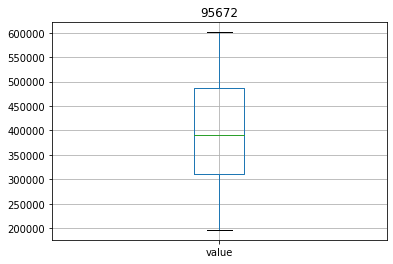

In [652]:
ts.boxplot(column = 'value')
plt.title(geog_area);


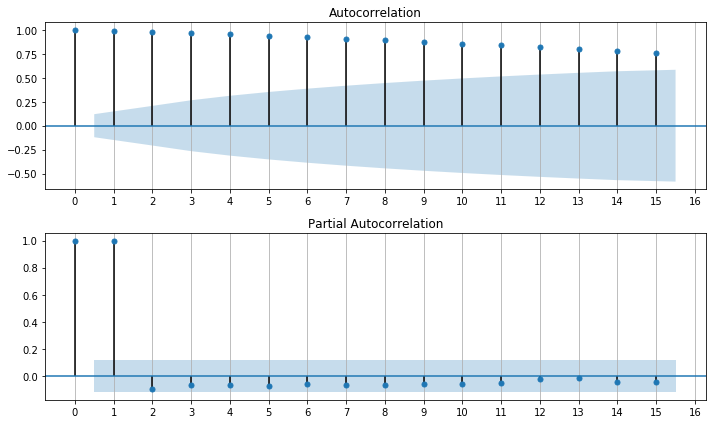

In [653]:
plot_acf_pacf(ts.value)

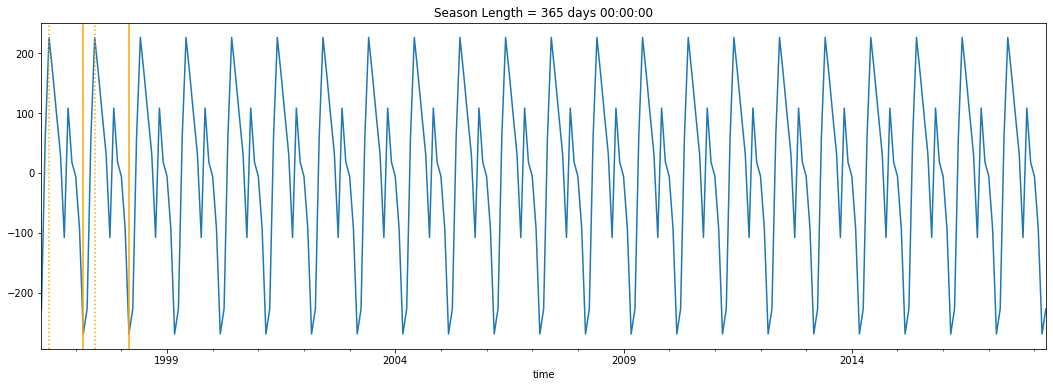

In [654]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [655]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [656]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95672 (Rescue):
# ARIMA(0, 0, 0) MSE=7052827541.559
# ARIMA(0, 1, 0) MSE=16595398.822
# ARIMA(0, 1, 1) MSE=6483913.155
# ARIMA(0, 2, 0) MSE=4714062.310
# ARIMA(0, 2, 1) MSE=3377346.501
# ARIMA(1, 1, 0) MSE=4582501.583
# ARIMA(1, 1, 2) MSE=3000091.096
# ARIMA(1, 2, 0) MSE=4543870.784
# ARIMA(1, 2, 1) MSE=3536089.687
# ARIMA(2, 1, 0) MSE=4255045.550
# ARIMA(2, 1, 1) MSE=3323429.665
# ARIMA(2, 1, 2) MSE=2788618.838
# ARIMA(2, 2, 0) MSE=3175132.426
# ARIMA(2, 2, 1) MSE=3050159.054
# ARIMA(2, 2, 2) MSE=2894234.877
# ARIMA(4, 0, 1) MSE=2989526.471
# ARIMA(4, 0, 2) MSE=2734700.139
# ARIMA(4, 1, 1) MSE=3028031.963
# ARIMA(4, 1, 2) MSE=2594330.334
# ARIMA(4, 2, 0) MSE=3069350.005
# ARIMA(4, 2, 2) MSE=2735749.611
# ARIMA(6, 0, 1) MSE=3068143.019
# ARIMA(6, 0, 2) MSE=2652917.081
# ARIMA(6, 2, 0) MSE=3048995.671
# Best ARIMA(4, 1, 2) MSE=2594330.334
# Best ARIMA order = (4, 1, 2)

For 95672 (Rescue):
Best ARIMA order = (4, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2210.851
Method:                       css-mle   S.D. of innovations           1037.020
Date:                Tue, 24 Mar 2020   AIC                           4437.702
Time:                        13:35:15   BIC                           4466.310
Sample:                    05-01-1996   HQIC                          4449.198
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1450.0001   1467.525      0.988      0.324   -1426.297    4326.297
ar.L1.D.value     0.3614      0.074      4.890      0.000       0.217    

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  813115.17,
  786158.66],
 [692300.0,
  321100.0,
  552700.0,
  449300.0,
  567500.0,
  563900.0,
  542900.0,
  644600.0,
  579300.0],
 [3.69, 10.8, -18.75, 

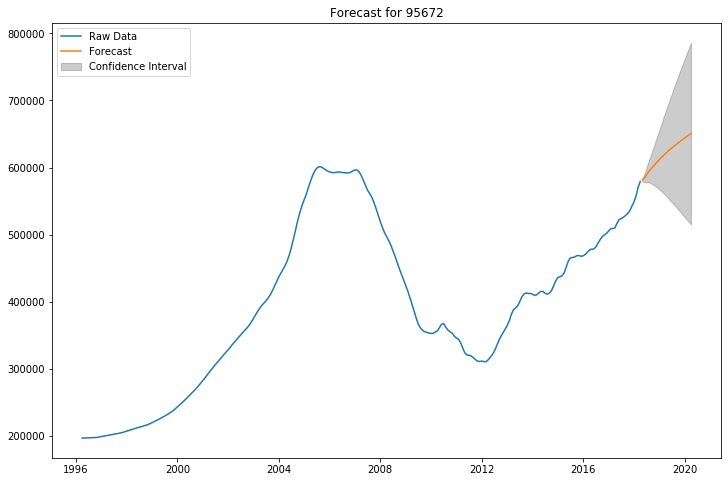

In [657]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4,1,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [658]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  813115.17,
  786158.66],
 [692300.0,
  321100.0,
  552700.0,
  449300.0,
  567500.0,
  563900.0,
  542900.0,
  644600.0,
  579300.0],
 [3.69, 10.8, -18.75, 

In [659]:
# pop_results_lists()

In [660]:
# print_results_lists()

### Zip code 95672 (Rescue):  Excellent investment opportunity with limited downside and large potential upside

By the model prediction, I would expect to see a 12.304% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -11.101% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 35.708% change in price by April 1, 2020.


## SacMetro:  95636 (Somerset) -- Poor investment rating -- do not invest

### Set up dataframe

In [661]:
geog_area = '95636'

In [662]:
city = 'Somerset'

In [663]:
county = 'El Dorado'

In [664]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [665]:
ts.head()

Metro     MetroState CountyName      City    Zip    value
time                                                                      
1996-04-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95100.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95400.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95600.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95900.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  96200.0

In [666]:
ts = ts.resample('MS').asfreq()

In [667]:
ts.head()

Metro     MetroState CountyName      City    Zip    value
time                                                                      
1996-04-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95100.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95400.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95600.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  95900.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Somerset  95636  96200.0

### Visualizations

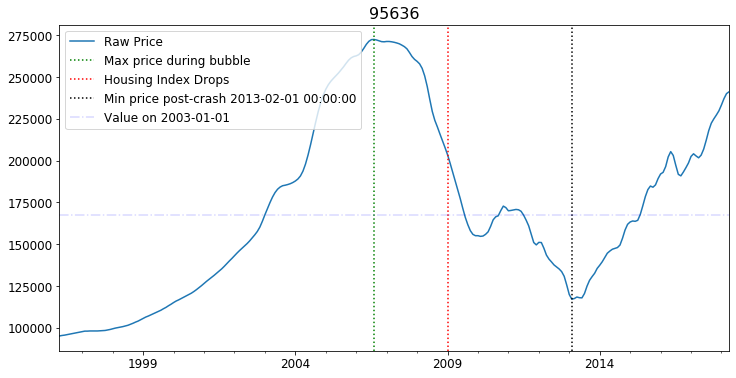

In [668]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

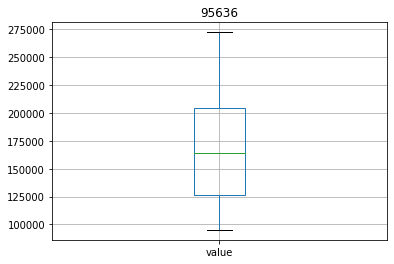

In [669]:
ts.boxplot(column = 'value')
plt.title(geog_area);


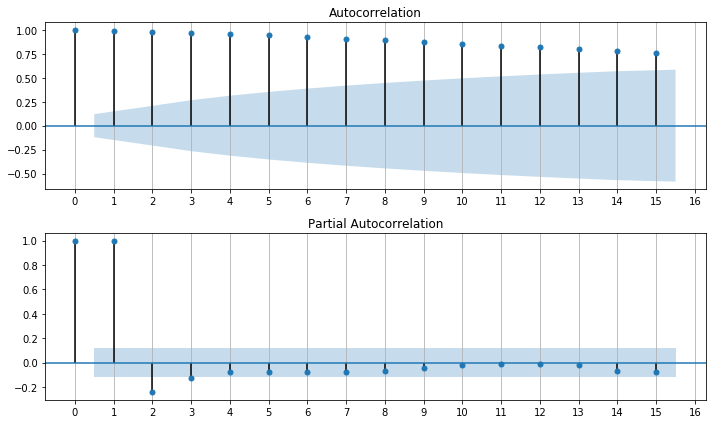

In [670]:
plot_acf_pacf(ts.value)

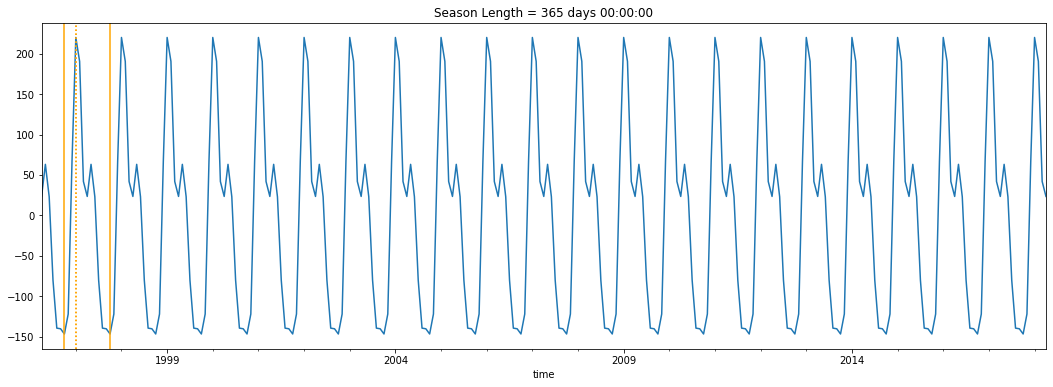

In [671]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [672]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [673]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95636 (Somerset):
# ARIMA(0, 0, 0) MSE=1088723922.625
# ARIMA(0, 1, 0) MSE=8228891.143
# ARIMA(0, 1, 1) MSE=3057297.804
# ARIMA(0, 2, 0) MSE=3351463.257
# ARIMA(0, 2, 1) MSE=2056640.674
# ARIMA(1, 1, 0) MSE=3170861.807
# ARIMA(1, 2, 0) MSE=2925409.679
# ARIMA(2, 1, 0) MSE=2522237.144
# ARIMA(2, 2, 0) MSE=1782338.420
# ARIMA(2, 2, 1) MSE=1660856.151
# ARIMA(4, 0, 1) MSE=1571916.062
# ARIMA(4, 1, 1) MSE=1594600.303
# ARIMA(4, 2, 0) MSE=1623269.957
# ARIMA(4, 2, 1) MSE=1619885.582
# ARIMA(6, 0, 1) MSE=1535639.868
# ARIMA(6, 2, 0) MSE=1562171.584
# Best ARIMA(6, 0, 1) MSE=1535639.868
# Best ARIMA order = (6, 0, 1)

For 95636 (Somerset):
Best ARIMA order = (6, 0, 1)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(6, 1)   Log Likelihood               -2136.708
Method:                       css-mle   S.D. of innovations            750.047
Date:                Tue, 24 Mar 2020   AIC                           4291.416
Time:                        13:35:23   BIC                           4323.634
Sample:                    04-01-1996   HQIC                          4304.361
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.712e+05   2.17e+04      7.886      0.000    1.29e+05    2.14e+05
ar.L1.value     3.1670        nan        nan        nan         nan         n

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56,
  165787.22],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  813115.17,
  786158.66,
  294403.76],
 [692300.0,
  321100.0,
  552700.0,
  4

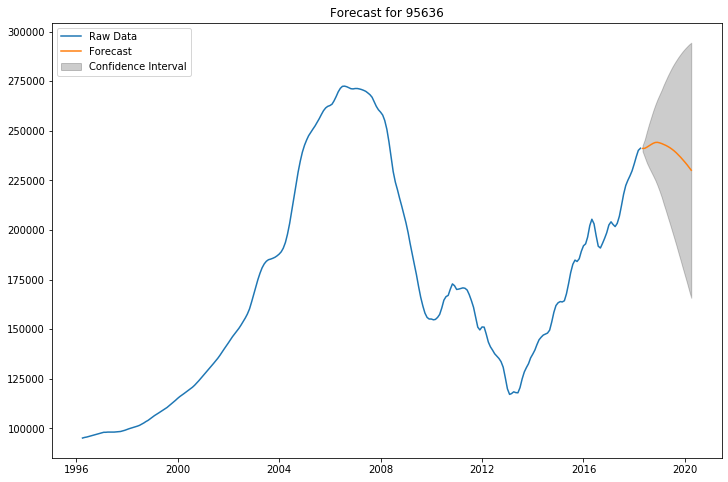

In [674]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (6,0,1)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [675]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56,
  165787.22],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  813115.17,
  786158.66,
  294403.76],
 [692300.0,
  321100.0,
  552700.0,
  4

In [676]:
# pop_results_lists()

In [677]:
# print_results_lists()

### Zip code 95636:  Poor investment rating--negative investment returns--do not invest

By the model prediction, I would expect to see a -4.604% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -31.266% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 22.058% change in price by April 1, 2020.

## SacMetro:  95709 (Camino) -- Okay investment opportunity with significant downside risk (but also significant upside returns)

### Set up dataframe

In [678]:
geog_area = '95709'

In [679]:
city = 'Camino'

In [680]:
county = 'El Dorado'

In [681]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [682]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141600.0

In [683]:
ts = ts.resample('MS').asfreq()

In [684]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141600.0

### Visualizations

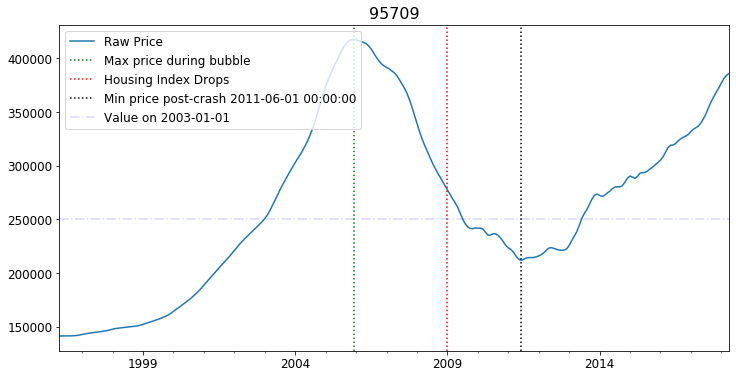

In [685]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

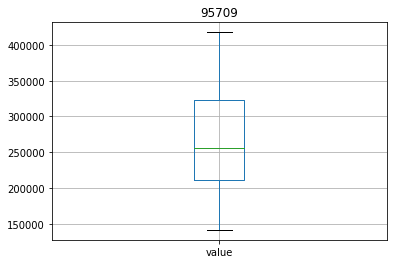

In [686]:
ts.boxplot(column = 'value')
plt.title(geog_area);


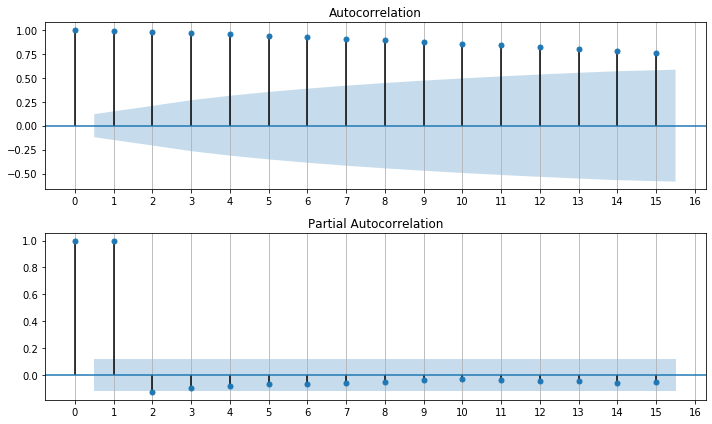

In [687]:
plot_acf_pacf(ts.value)

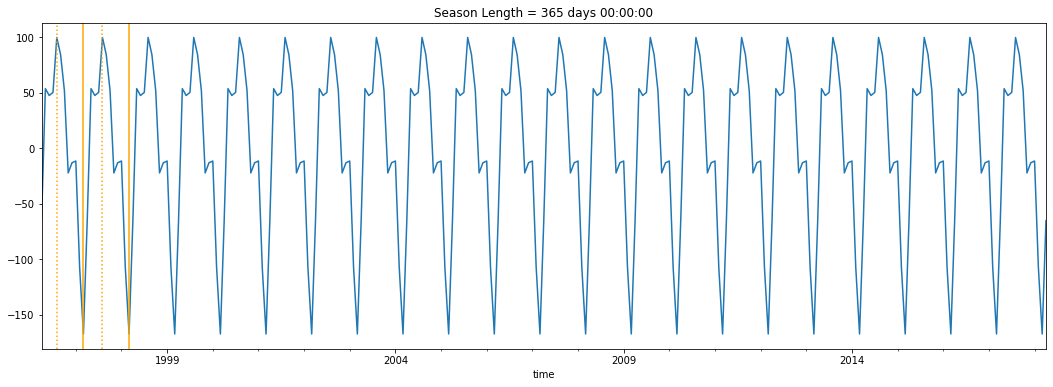

In [688]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [689]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [690]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95709 (Camino):
# ARIMA(0, 0, 0) MSE=2967456006.271
# ARIMA(0, 1, 0) MSE=5872617.433
# ARIMA(0, 1, 1) MSE=2115837.697
# ARIMA(0, 2, 0) MSE=1332894.689
# ARIMA(0, 2, 1) MSE=872950.276
# ARIMA(1, 1, 0) MSE=1299745.292
# ARIMA(1, 1, 1) MSE=837961.158
# ARIMA(1, 1, 2) MSE=766049.672
# ARIMA(1, 2, 0) MSE=1180859.093
# ARIMA(1, 2, 1) MSE=885507.481
# ARIMA(1, 2, 2) MSE=735744.867
# ARIMA(2, 0, 1) MSE=839244.625
# ARIMA(2, 0, 2) MSE=773820.757
# ARIMA(2, 1, 0) MSE=1115504.104
# ARIMA(2, 1, 1) MSE=841442.546
# ARIMA(2, 1, 2) MSE=697595.599
# ARIMA(2, 2, 0) MSE=768038.570
# ARIMA(2, 2, 1) MSE=735439.979
# ARIMA(2, 2, 2) MSE=736407.804
# ARIMA(4, 0, 1) MSE=714993.737
# ARIMA(4, 0, 2) MSE=732581.121
# ARIMA(4, 1, 1) MSE=719904.376
# ARIMA(4, 2, 0) MSE=744712.414
# ARIMA(4, 2, 1) MSE=740008.295
# ARIMA(6, 1, 1) MSE=717353.488
# ARIMA(6, 2, 0) MSE=758597.116
# ARIMA(6, 2, 1) MSE=745464.522
# ARIMA(8, 2, 0) MSE=762536.105
# ARIMA(8, 2, 1) MSE=764989.450
# ARIMA(10, 2, 0) MSE=771994.004
# ARIMA(10, 2, 1) MSE=775353.130
# Best ARIMA(2, 1, 2) MSE=697595.599
# Best ARIMA order = (2, 1, 2)

For 95709 (Camino):
Best ARIMA order = (2, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2056.594
Method:                       css-mle   S.D. of innovations            579.070
Date:                Tue, 24 Mar 2020   AIC                           4125.188
Time:                        13:35:35   BIC                           4146.644
Sample:                    05-01-1996   HQIC                          4133.810
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           899.0402    855.399      1.051      0.294    -777.510    2575.591
ar.L1.D.value     0.3400      0.082      4.153      0.000       0.180    

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56,
  165787.22,
  321956.34],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  

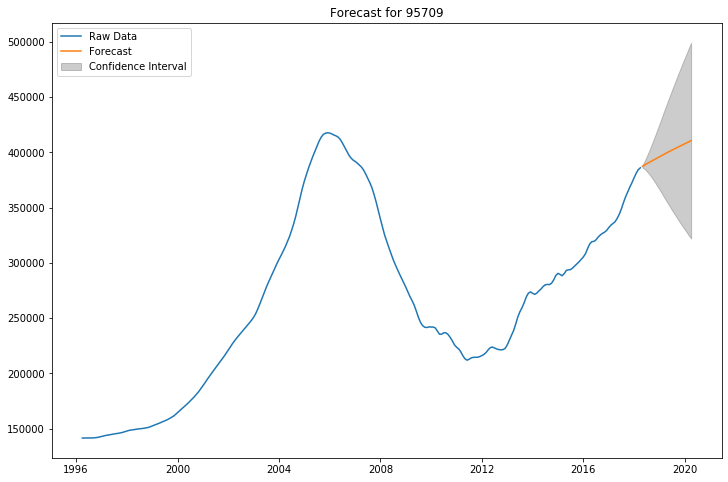

In [691]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (2,1,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [692]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56,
  165787.22,
  321956.34],
 [816150.79,
  436256.81,
  570527.16,
  481367.94,
  681590.63,
  663111.23,
  586210.84,
  

In [693]:
# pop_results_lists()

In [694]:
# print_results_lists()

### Zip code 95709 (Camino):  Okay investment opportunity with significant downside risk (but also significant upside returns)

By the model prediction, I would expect to see a 6.367% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -16.592% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 29.326% change in price by April 1, 2020.

## SacMetro:  95746 (Granite Bay) -- Solid investment opportunity

### Set up dataframe

In [695]:
geog_area = '95746'

In [696]:
city = 'Granite Bay'

In [697]:
county = 'Placer'

In [698]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141600.0

In [699]:
ts = ts.resample('MS').asfreq()

In [700]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141500.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Camino  95709  141600.0

### Visualizations

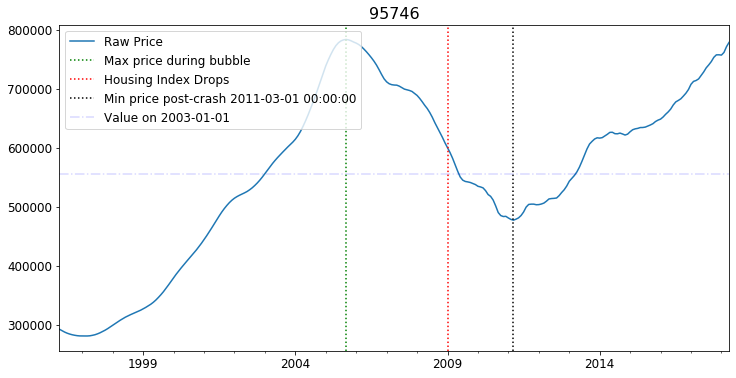

In [701]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

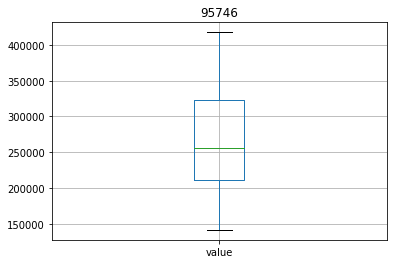

In [702]:
ts.boxplot(column = 'value')
plt.title(geog_area);


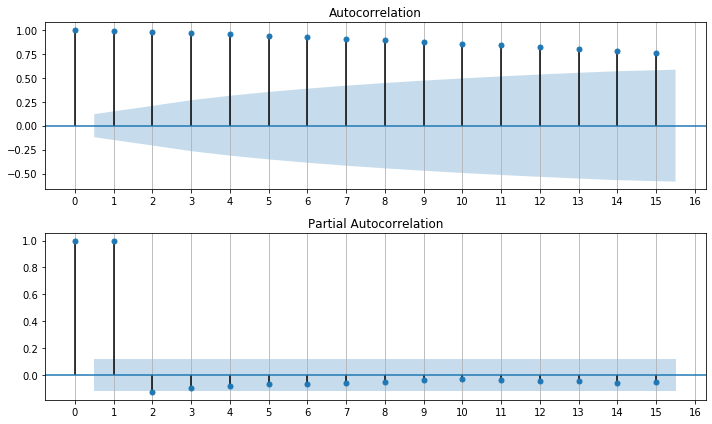

In [703]:
plot_acf_pacf(ts.value)

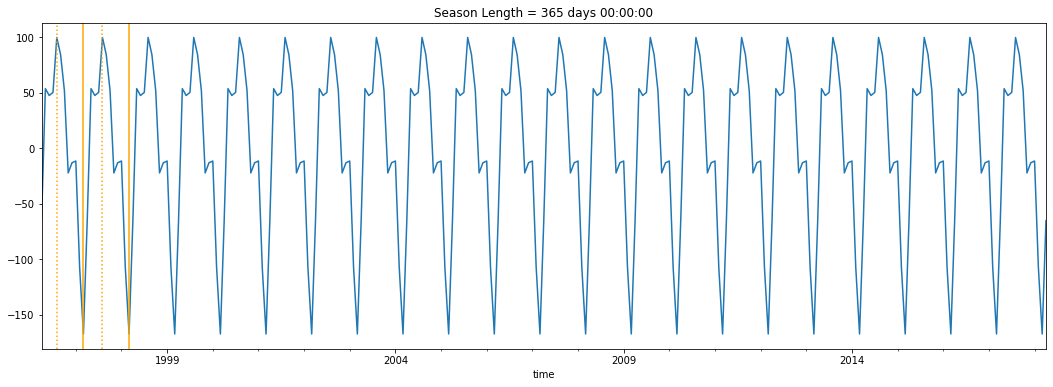

In [704]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [705]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [706]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95746 (Granite Bay):
# ARIMA(0, 0, 0) MSE=12134424077.244
# ARIMA(0, 0, 1) MSE=3123788984.556
# ARIMA(0, 1, 0) MSE=13089546.571
# ARIMA(0, 1, 1) MSE=6536140.551
# ARIMA(0, 2, 0) MSE=4784362.295
# ARIMA(0, 2, 1) MSE=4223158.179
# ARIMA(0, 2, 2) MSE=4453409.133
# ARIMA(1, 0, 0) MSE=20356040.575
# ARIMA(1, 1, 0) MSE=4638930.152
# ARIMA(1, 1, 1) MSE=4006169.147
# ARIMA(1, 1, 2) MSE=4245452.231
# ARIMA(1, 2, 0) MSE=4688281.403
# ARIMA(1, 2, 1) MSE=4297882.791
# ARIMA(2, 0, 0) MSE=4681541.210
# ARIMA(2, 0, 1) MSE=21107346390.555
# ARIMA(2, 0, 2) MSE=4281419.314
# ARIMA(2, 1, 0) MSE=4438028.164
# ARIMA(2, 1, 1) MSE=4085772.049
# ARIMA(2, 2, 0) MSE=3967456.687
# ARIMA(2, 2, 1) MSE=4015211.253
# ARIMA(2, 2, 2) MSE=3850493.705
# ARIMA(4, 0, 0) MSE=3848082.691
# ARIMA(4, 0, 1) MSE=3797564.066
# ARIMA(4, 0, 2) MSE=3569277.635
# ARIMA(4, 1, 0) MSE=3956932.695
# ARIMA(4, 1, 1) MSE=3765133.557
# ARIMA(4, 1, 2) MSE=3192123.140
# ARIMA(4, 2, 0) MSE=4133353.785
# ARIMA(6, 0, 0) MSE=4022418.465
# ARIMA(8, 0, 0) MSE=4228144.504
# ARIMA(10, 0, 0) MSE=3893362.210
# Best ARIMA(4, 1, 2) MSE=3192123.140
# Best ARIMA order = (4, 1, 2)

For 95746 (Granite Bay):
Best ARIMA order = (4, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2050.768
Method:                       css-mle   S.D. of innovations            566.552
Date:                Tue, 24 Mar 2020   AIC                           4117.537
Time:                        13:35:40   BIC                           4146.144
Sample:                    05-01-1996   HQIC                          4129.032
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           926.1367   1083.879      0.854      0.394   -1198.227    3050.500
ar.L1.D.value     0.4035      0.098      4.108      0.000       0.21

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56,
  165787.22,
  321956.34,
  339823.66],
 [816150.79,
 

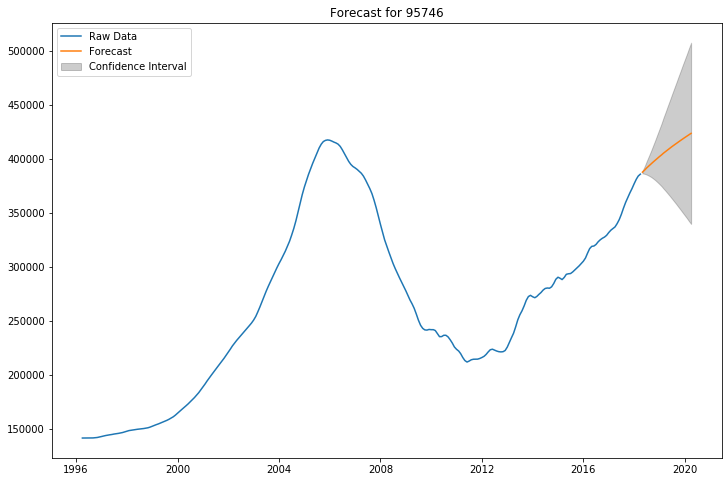

In [707]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4,1,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [708]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  514993.56,
  165787.22,
  321956.34,
  339823.66],
 [816150.79,
 

In [709]:
# pop_results_lists()

In [710]:
# print_results_lists()

### Zip code 95746 (Granite Bay):  Solid investment opportunity

By the model prediction, I would expect to see a 9.795% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -11.963% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 31.553% change in price by April 1, 2020.

## SacMetro:  95614 (Cool) -- Not a great investment opportunity

### Set up dataframe

In [711]:
geog_area = '95614'

In [712]:
city = 'Cool'

In [713]:
county = 'El Dorado'

In [714]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [715]:
ts.head()

Metro     MetroState CountyName  City    Zip     value
time                                                                   
1996-04-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  157500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  157200.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  156900.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  156700.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  156400.0

In [716]:
ts = ts.resample('MS').asfreq()

In [717]:
ts.head()

Metro     MetroState CountyName  City    Zip     value
time                                                                   
1996-04-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  157500.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  157200.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  156900.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  156700.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  Cool  95614  156400.0

### Visualizations

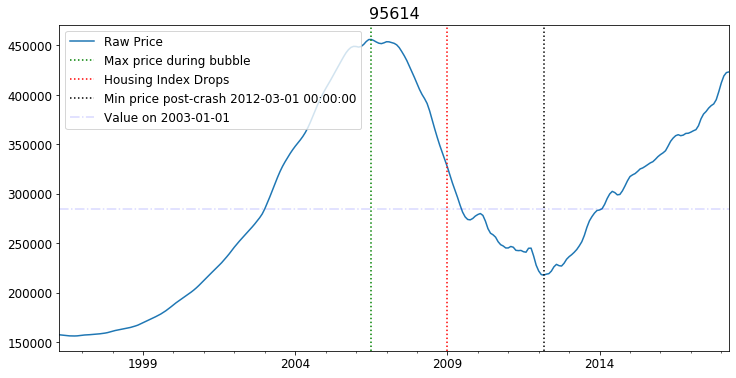

In [718]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

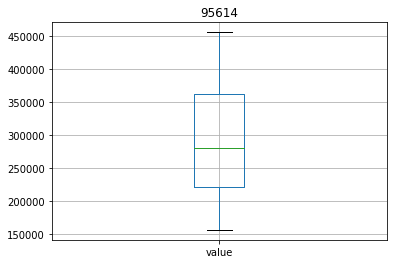

In [719]:
ts.boxplot(column = 'value')
plt.title(geog_area);


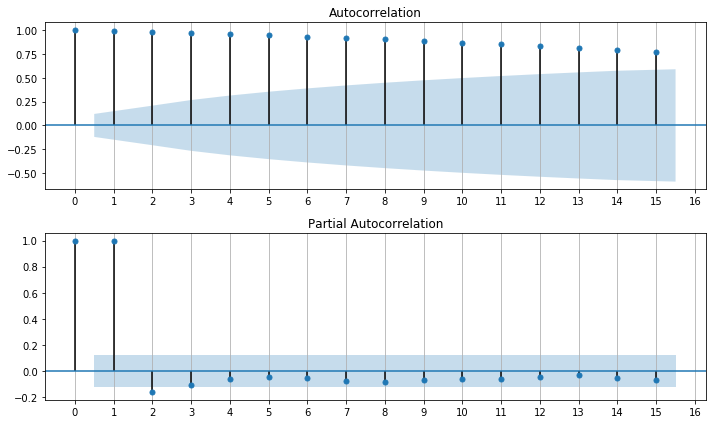

In [720]:
plot_acf_pacf(ts.value)

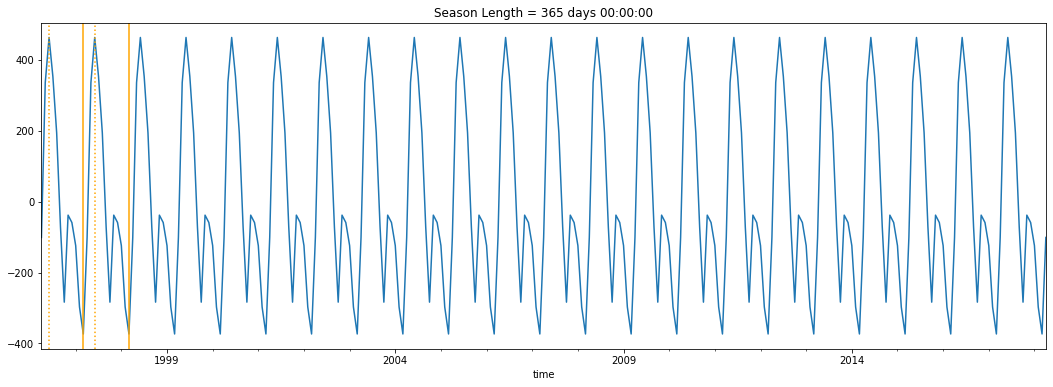

In [721]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [722]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [723]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95614 (Cool):
# ARIMA(0, 0, 0) MSE=3683099817.279
# ARIMA(0, 1, 0) MSE=10675795.704
# ARIMA(0, 1, 1) MSE=3619321.883
# ARIMA(0, 2, 0) MSE=4319048.972
# ARIMA(0, 2, 1) MSE=3012010.363
# ARIMA(1, 1, 0) MSE=4117580.867
# ARIMA(1, 2, 0) MSE=4133589.687
# ARIMA(2, 1, 0) MSE=3743946.854
# ARIMA(2, 2, 0) MSE=3114778.488
# ARIMA(2, 2, 1) MSE=2801983.225
# ARIMA(2, 2, 2) MSE=2513648.766
# ARIMA(4, 0, 1) MSE=2691902.812
# ARIMA(4, 0, 2) MSE=2385169.321
# ARIMA(4, 1, 1) MSE=2703753.532
# ARIMA(4, 2, 0) MSE=2472884.029
# ARIMA(4, 2, 1) MSE=2490043.627
# ARIMA(6, 0, 1) MSE=2429247.351
# Best ARIMA(4, 0, 2) MSE=2385169.321
# Best ARIMA order = (4, 0, 2)

For 95614 (Cool):
Best ARIMA order = (4, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(4, 2)   Log Likelihood               -2191.961
Method:                       css-mle   S.D. of innovations            920.005
Date:                Tue, 24 Mar 2020   AIC                           4399.921
Time:                        13:35:47   BIC                           4428.559
Sample:                    04-01-1996   HQIC                          4411.428
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.931e+05   6.92e+04      4.233      0.000    1.57e+05    4.29e+05
ar.L1.value     1.4334      0.076     18.835      0.000       1.284       1.583
a

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57,
  406562.1],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  5149

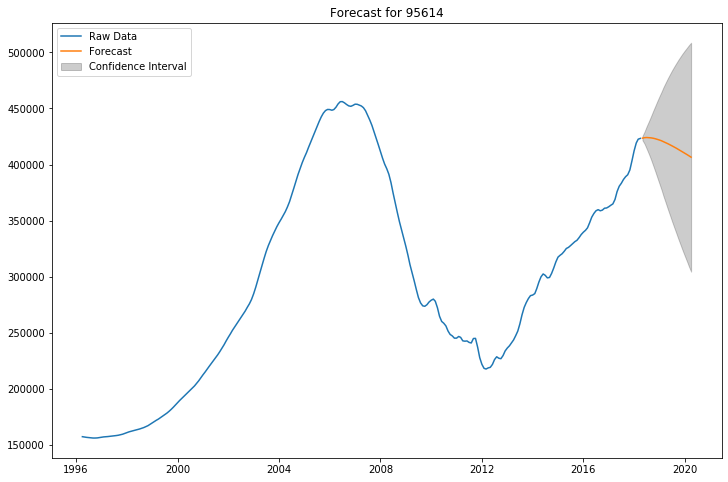

In [724]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4, 0, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [725]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57,
  406562.1],
 [619575.34,
  275292.09,
  327568.68,
  292621.1,
  459606.77,
  464602.96,
  382062.81,
  560520.55,
  5149

In [726]:
# pop_results_lists()

In [727]:
# print_results_lists()

### Zip code 95614 (Cool):  Poor investment opportunity

By the model prediction, I would expect to see a -3.954% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -28.057% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 20.149% change in price by April 1, 2020.

## SacMetro:  95663 (Penryn) -- Mediocre investment opportunity

### Set up dataframe

In [728]:
geog_area = '95663'

In [729]:
city = 'Penryn'

In [730]:
county = 'Placer'

In [731]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [732]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195400.0
1996-05-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195300.0
1996-06-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195300.0
1996-07-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195300.0
1996-08-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195400.0

In [733]:
ts = ts.resample('MS').asfreq()

In [734]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195400.0
1996-05-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195300.0
1996-06-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195300.0
1996-07-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195300.0
1996-08-01  Sacramento  Sacramento CA     Placer  Penryn  95663  195400.0

### Visualizations

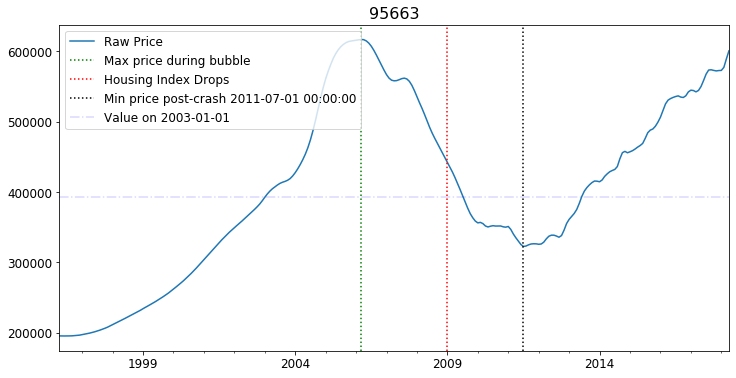

In [735]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

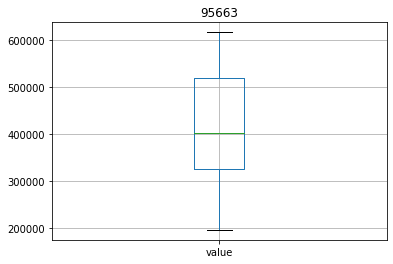

In [736]:
ts.boxplot(column = 'value')
plt.title(geog_area);


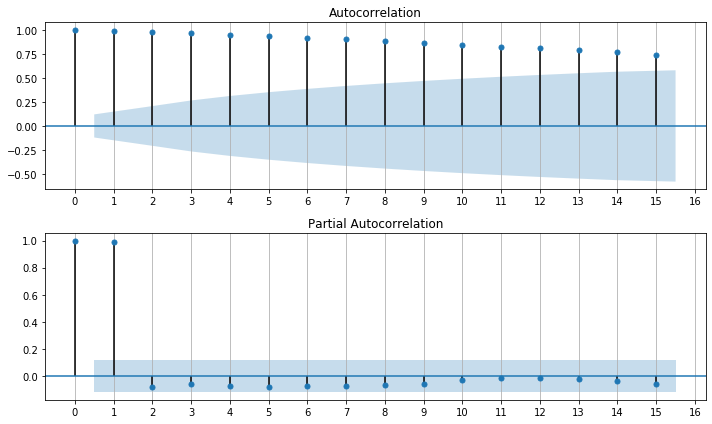

In [737]:
plot_acf_pacf(ts.value)

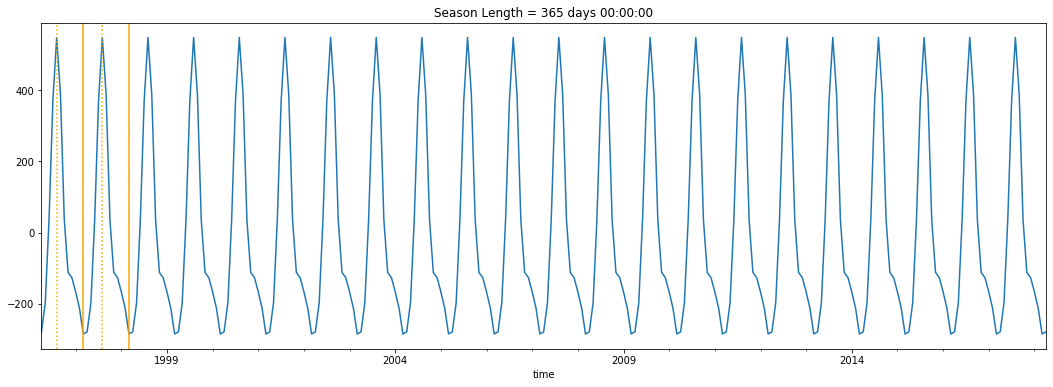

In [738]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [739]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [740]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95663 (Penryn):
# ARIMA(0, 0, 0) MSE=9818607466.817
# ARIMA(0, 0, 1) MSE=2518058335.648
# ARIMA(0, 1, 0) MSE=17562047.108
# ARIMA(0, 1, 1) MSE=8062655.542
# ARIMA(0, 2, 0) MSE=6806179.084
# ARIMA(0, 2, 1) MSE=5156267.166
# ARIMA(1, 0, 0) MSE=22864902.794
# ARIMA(1, 1, 0) MSE=6621129.281
# ARIMA(1, 1, 1) MSE=4884407.610
# ARIMA(1, 1, 2) MSE=4575029.905
# ARIMA(1, 2, 0) MSE=6164059.231
# ARIMA(1, 2, 1) MSE=5304938.358
# ARIMA(1, 2, 2) MSE=4602724.825
# ARIMA(2, 0, 0) MSE=6668049.476
# ARIMA(2, 0, 1) MSE=4931646.056
# ARIMA(2, 0, 2) MSE=4652341.914
# ARIMA(2, 1, 1) MSE=4940987.100
# ARIMA(2, 2, 0) MSE=4717586.624
# ARIMA(2, 2, 1) MSE=4793113.044
# ARIMA(2, 2, 2) MSE=4468610.933
# ARIMA(4, 0, 0) MSE=4585105.508
# ARIMA(4, 0, 1) MSE=4653791.216
# ARIMA(4, 0, 2) MSE=4248724.392
# ARIMA(4, 1, 1) MSE=4700771.528
# ARIMA(4, 2, 0) MSE=4879382.738
# ARIMA(4, 2, 1) MSE=4944818.865
# ARIMA(6, 0, 0) MSE=4763417.829
# ARIMA(6, 0, 1) MSE=4856929.426
# ARIMA(6, 1, 1) MSE=4367913.754
# ARIMA(6, 2, 0) MSE=4530648.031
# ARIMA(6, 2, 1) MSE=4411107.586
# ARIMA(8, 0, 1) MSE=4342155.192
# ARIMA(8, 2, 0) MSE=4456621.365
# ARIMA(8, 2, 1) MSE=4496173.009
# ARIMA(10, 0, 1) MSE=4400921.884
# ARIMA(10, 1, 1) MSE=4416056.878
# Best ARIMA(4, 0, 2) MSE=4248724.392
# Best ARIMA order = (4, 0, 2)

For 95663 (Penryn):
Best ARIMA order = (4, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(4, 2)   Log Likelihood               -2273.008
Method:                       css-mle   S.D. of innovations           1249.597
Date:                Tue, 24 Mar 2020   AIC                           4562.015
Time:                        13:35:53   BIC                           4590.653
Sample:                    04-01-1996   HQIC                          4573.522
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.046e+05   1.08e+05      3.732      0.000    1.92e+05    6.17e+05
ar.L1.value     1.2467      0.081     15.373      0.000       1.088       1.406

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57,
  406562.1,
  612903.01],
 [619575.34,
  275292.09,
  327568.68,
  292621.

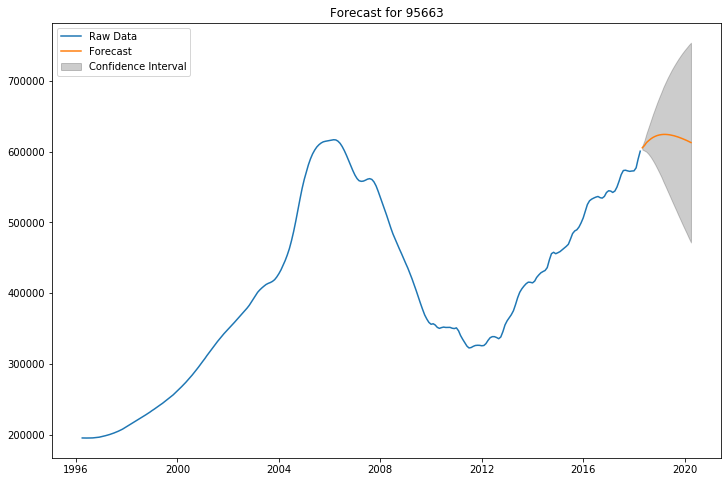

In [741]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4, 0, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [742]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57,
  406562.1,
  612903.01],
 [619575.34,
  275292.09,
  327568.68,
  292621.

In [743]:
# pop_results_lists()

In [744]:
# print_results_lists()

### Zip code 95663 (Penryn):  Mediocre investment opportunity

By the model prediction, I would expect to see a 2.031% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -21.468% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 25.531% change in price by April 1, 2020.


## SacMetro:  95623 (El Dorado) -- Good investment opportunity

### Set up dataframe

In [745]:
geog_area = '95623'

In [746]:
city = 'El Dorado'

In [747]:
county = 'El Dorado'

In [748]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [749]:
ts.head()

Metro     MetroState CountyName       City    Zip     value
time                                                                        
1996-04-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  165300.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  164900.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  164400.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  164000.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  163700.0

In [750]:
ts = ts.resample('MS').asfreq()

In [751]:
ts.head()

Metro     MetroState CountyName       City    Zip     value
time                                                                        
1996-04-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  165300.0
1996-05-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  164900.0
1996-06-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  164400.0
1996-07-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  164000.0
1996-08-01  Sacramento  Sacramento CA  El Dorado  El Dorado  95623  163700.0

### Visualizations

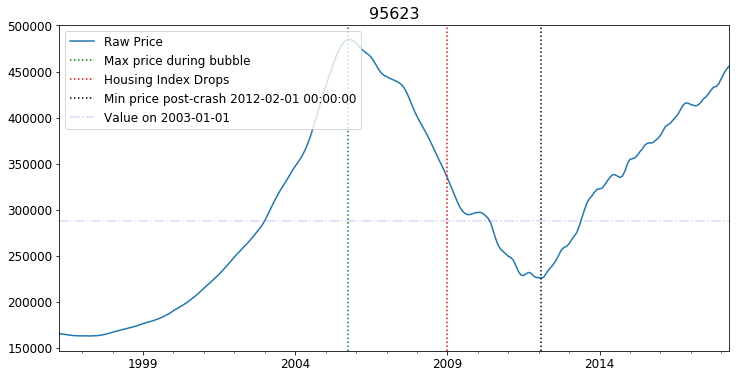

In [752]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

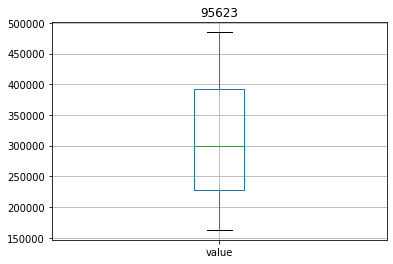

In [753]:
ts.boxplot(column = 'value')
plt.title(geog_area);


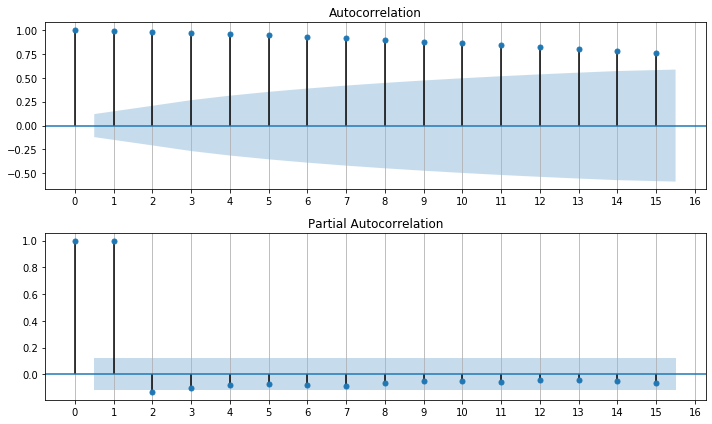

In [754]:
plot_acf_pacf(ts.value)

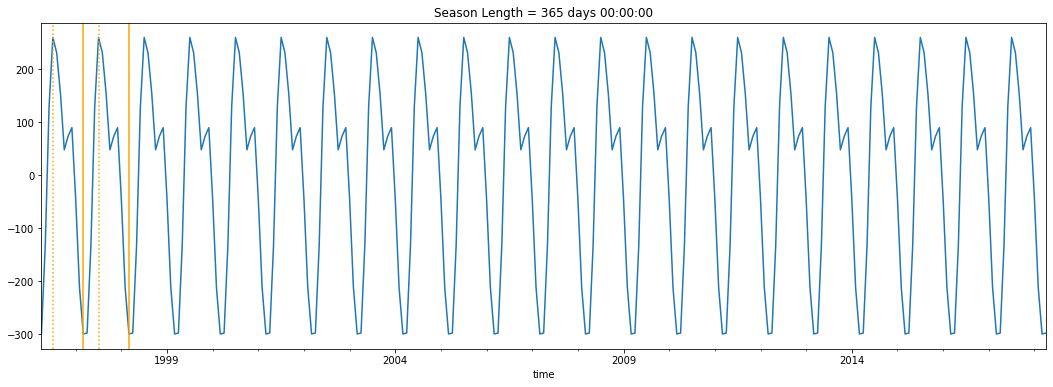

In [755]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [756]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [757]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95623 (El Dorado):
# ARIMA(0, 0, 0) MSE=6129867602.506
# ARIMA(0, 1, 0) MSE=10705214.389
# ARIMA(0, 1, 1) MSE=4075297.295
# ARIMA(0, 2, 0) MSE=3137970.629
# ARIMA(0, 2, 1) MSE=2302802.863
# ARIMA(1, 1, 0) MSE=3039626.202
# ARIMA(1, 2, 0) MSE=2824383.412
# ARIMA(2, 2, 0) MSE=2174119.719
# ARIMA(2, 2, 1) MSE=2171819.229
# ARIMA(2, 2, 2) MSE=1904356.693
# ARIMA(4, 0, 1) MSE=2107890.562
# ARIMA(4, 1, 1) MSE=2127827.996
# ARIMA(4, 2, 0) MSE=2149243.837
# ARIMA(4, 2, 1) MSE=2159396.102
# ARIMA(6, 1, 1) MSE=1962248.318
# ARIMA(6, 2, 0) MSE=2043600.790
# ARIMA(6, 2, 1) MSE=1966868.335
# ARIMA(8, 2, 0) MSE=1956960.347
# ARIMA(10, 2, 0) MSE=1989689.643
# ARIMA(10, 2, 1) MSE=1938540.860
# Best ARIMA(2, 2, 2) MSE=1904356.693
# Best ARIMA order = (2, 2, 2)

For 95623 (El Dorado):
Best ARIMA order = (2, 2, 2)
                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  263
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2138.636
Method:                       css-mle   S.D. of innovations            817.527
Date:                Tue, 24 Mar 2020   AIC                           4289.272
Time:                        13:35:58   BIC                           4310.705
Sample:                    06-01-1996   HQIC                          4297.885
                         - 04-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.6879     96.631      0.069      0.945    -182.705     196.081
ar.L1.D2.value    -0.6158      0.065     -9.421      0.000      -0.

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57,
  406562.1,
  612903

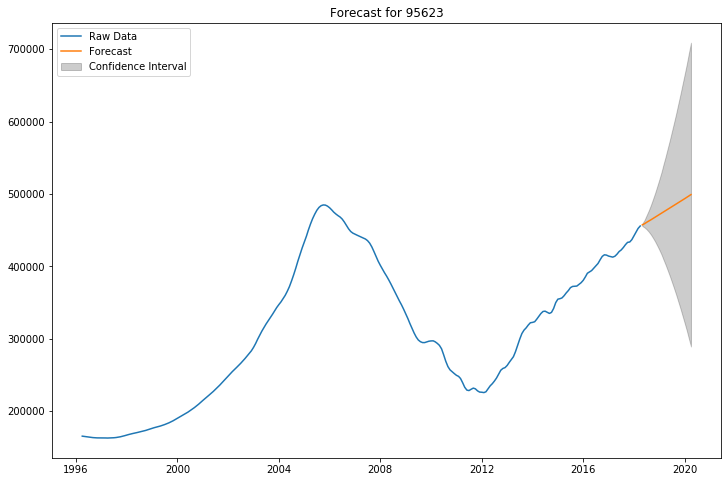

In [758]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (2,2,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [759]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095.49,
  410576.95,
  423809.57,
  406562.1,
  612903

In [760]:
# pop_results_lists()

In [761]:
# print_results_lists()

### Zip code 95623 (El Dorado):   Good--but risky--investment opportunity with very large potential upside, but also large potential downside

By the model prediction, I would expect to see a 9.529% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -36.532% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 55.591% change in price by April 1, 2020.


## SacMetro:  95747 (Roseville) -- Poor investment rating -- don't invest

### Set up dataframe

In [762]:
geog_area = '95747'

In [763]:
city = 'Roseville'

In [764]:
county = 'Placer'

In [765]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [766]:
ts.head()

Metro     MetroState CountyName       City    Zip     value
time                                                                        
1996-04-01  Sacramento  Sacramento CA     Placer  Roseville  95747  192700.0
1996-05-01  Sacramento  Sacramento CA     Placer  Roseville  95747  193700.0
1996-06-01  Sacramento  Sacramento CA     Placer  Roseville  95747  195000.0
1996-07-01  Sacramento  Sacramento CA     Placer  Roseville  95747  196500.0
1996-08-01  Sacramento  Sacramento CA     Placer  Roseville  95747  198100.0

In [767]:
ts = ts.resample('MS').asfreq()

In [768]:
ts.head()

Metro     MetroState CountyName       City    Zip     value
time                                                                        
1996-04-01  Sacramento  Sacramento CA     Placer  Roseville  95747  192700.0
1996-05-01  Sacramento  Sacramento CA     Placer  Roseville  95747  193700.0
1996-06-01  Sacramento  Sacramento CA     Placer  Roseville  95747  195000.0
1996-07-01  Sacramento  Sacramento CA     Placer  Roseville  95747  196500.0
1996-08-01  Sacramento  Sacramento CA     Placer  Roseville  95747  198100.0

### Visualizations

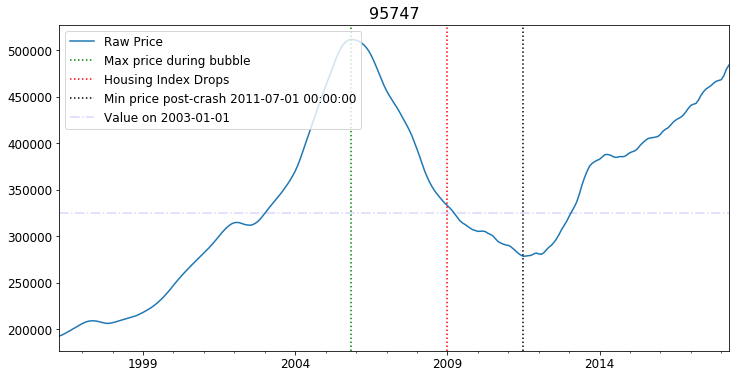

In [769]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

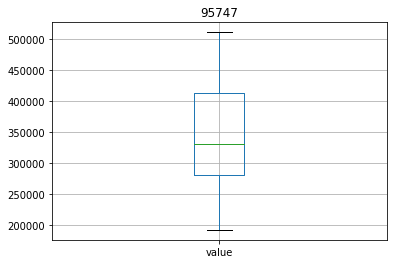

In [770]:
ts.boxplot(column = 'value')
plt.title(geog_area);


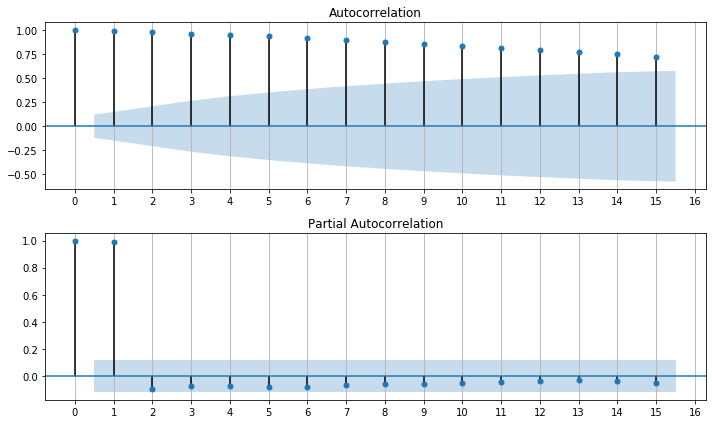

In [771]:
plot_acf_pacf(ts.value)

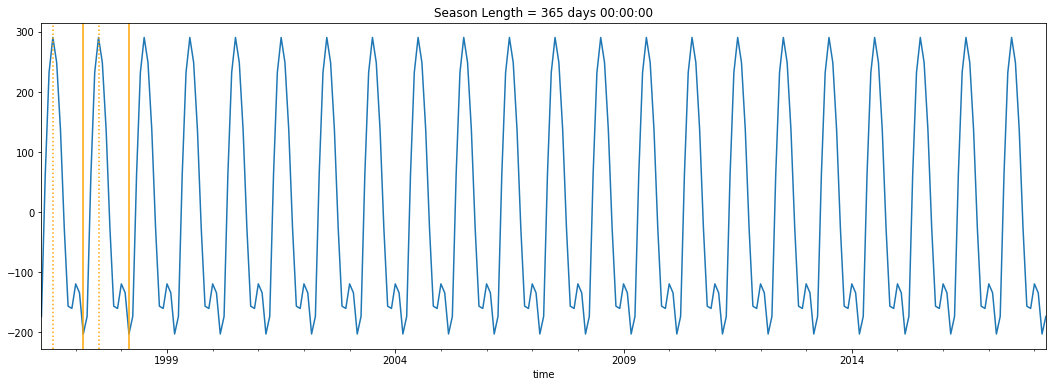

In [772]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [773]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [774]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95747 (Roseville):
# ARIMA(0, 0, 0) MSE=5427879845.782
# ARIMA(0, 0, 1) MSE=1385889791.576
# ARIMA(0, 1, 0) MSE=7313787.472
# ARIMA(0, 1, 1) MSE=2253734.674
# ARIMA(0, 2, 0) MSE=1329713.214
# ARIMA(0, 2, 1) MSE=941066.362
# ARIMA(0, 2, 2) MSE=991125.760
# ARIMA(1, 0, 0) MSE=10116583.455
# ARIMA(1, 1, 0) MSE=1307066.694
# ARIMA(1, 1, 1) MSE=911750.121
# ARIMA(1, 1, 2) MSE=957114.344
# ARIMA(1, 2, 0) MSE=1283948.086
# ARIMA(1, 2, 1) MSE=1007661.965
# ARIMA(1, 2, 2) MSE=983499.774
# ARIMA(2, 0, 0) MSE=1322871.055
# ARIMA(2, 0, 1) MSE=922360.036
# ARIMA(2, 0, 2) MSE=962947.871
# ARIMA(2, 1, 1) MSE=981163.546
# ARIMA(2, 1, 2) MSE=987534.949
# ARIMA(2, 2, 0) MSE=1049147.739
# ARIMA(2, 2, 1) MSE=960250.591
# ARIMA(2, 2, 2) MSE=926421.069
# ARIMA(4, 0, 0) MSE=1017453.901
# ARIMA(4, 0, 1) MSE=933328.942
# ARIMA(4, 0, 2) MSE=899057.043
# ARIMA(4, 1, 1) MSE=956467.252
# ARIMA(4, 2, 0) MSE=994039.968
# ARIMA(4, 2, 1) MSE=1025258.303
# ARIMA(6, 0, 0) MSE=967037.951
# ARIMA(6, 0, 1) MSE=998404.100
# ARIMA(6, 1, 1) MSE=1006343.431
# ARIMA(6, 2, 0) MSE=1040911.553
# ARIMA(6, 2, 1) MSE=1032071.419
# ARIMA(8, 0, 0) MSE=1015099.946
# ARIMA(8, 1, 1) MSE=996476.593
# ARIMA(8, 2, 0) MSE=1038486.752
# ARIMA(8, 2, 1) MSE=1041601.098
# ARIMA(10, 0, 0) MSE=1012947.036
# ARIMA(10, 2, 0) MSE=1042071.272
# ARIMA(10, 2, 1) MSE=1038354.561
# Best ARIMA(4, 0, 2) MSE=899057.043
# Best ARIMA order = (4, 0, 2)

For 95747 (Roseville):
Best ARIMA order = (4, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(4, 2)   Log Likelihood               -2079.915
Method:                       css-mle   S.D. of innovations            602.304
Date:                Tue, 24 Mar 2020   AIC                           4175.830
Time:                        13:36:05   BIC                           4204.468
Sample:                    04-01-1996   HQIC                          4187.337
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.429e+05   3.68e+04      9.328      0.000    2.71e+05    4.15e+05
ar.L1.value     1.2145      0.090     13.488      0.000       1.038       1.

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095

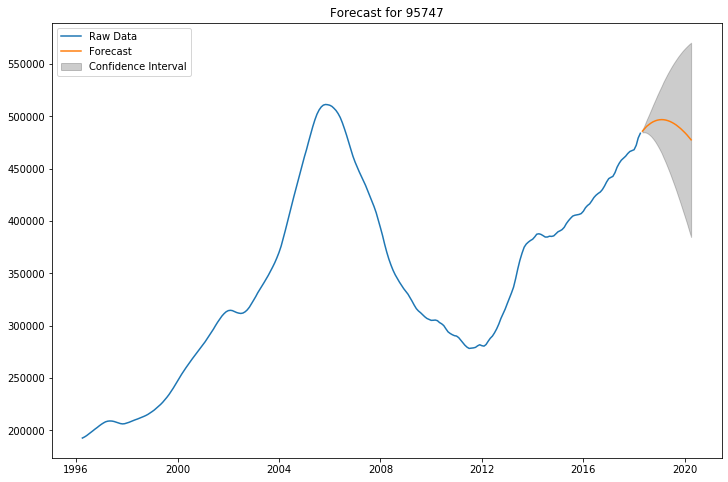

In [775]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run


best_cfg = (4, 0, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [776]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1,
  484136.82,
  686817.86,
  650576.11,
  230095

In [777]:
# pop_results_lists()

In [778]:
# print_results_lists()

### Zip code 95747 (Roseville):  Poor investment rating

By the model prediction, I would expect to see a -1.299% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -20.485% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 17.886% change in price by April 1, 2020.


## SacMetro:  95765 (Rocklin) -- Mediocre investment opportunity

### Set up dataframe

In [779]:
geog_area = '95765'

In [780]:
city = 'Rocklin'

In [781]:
county = 'Placer'

In [782]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [783]:
ts.head()

Metro     MetroState CountyName     City    Zip     value
time                                                                      
1996-04-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  192600.0
1996-05-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  192300.0
1996-06-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  191900.0
1996-07-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  191400.0
1996-08-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  190900.0

In [784]:
ts = ts.resample('MS').asfreq()

In [785]:
ts.head()

Metro     MetroState CountyName     City    Zip     value
time                                                                      
1996-04-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  192600.0
1996-05-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  192300.0
1996-06-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  191900.0
1996-07-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  191400.0
1996-08-01  Sacramento  Sacramento CA     Placer  Rocklin  95765  190900.0

### Visualizations

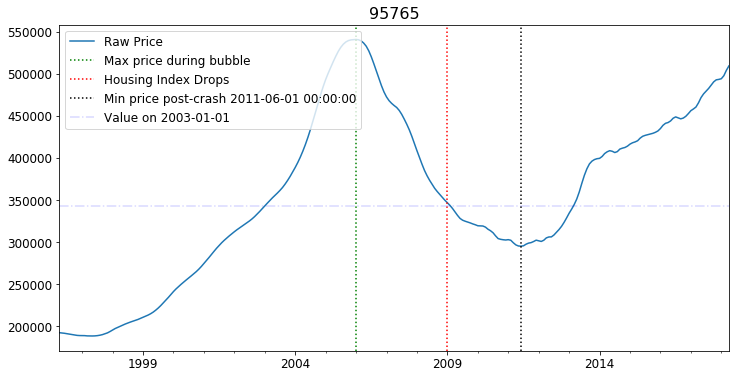

In [786]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

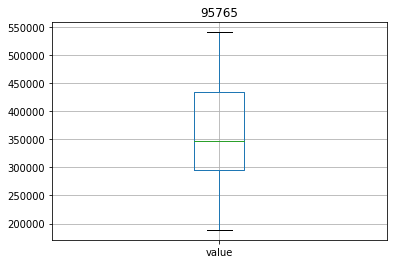

In [787]:
ts.boxplot(column = 'value')
plt.title(geog_area);


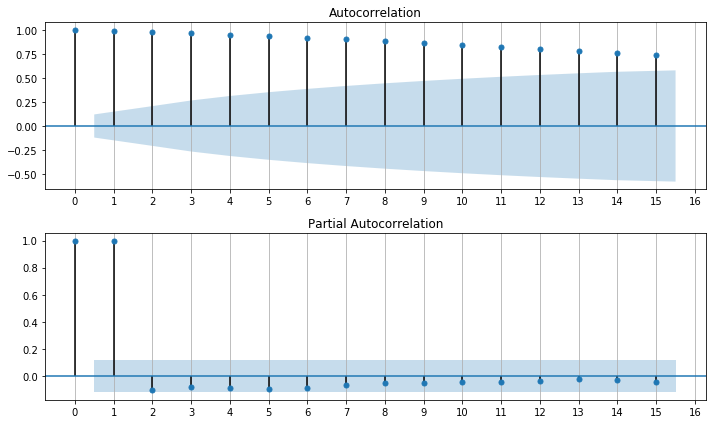

In [788]:
plot_acf_pacf(ts.value)

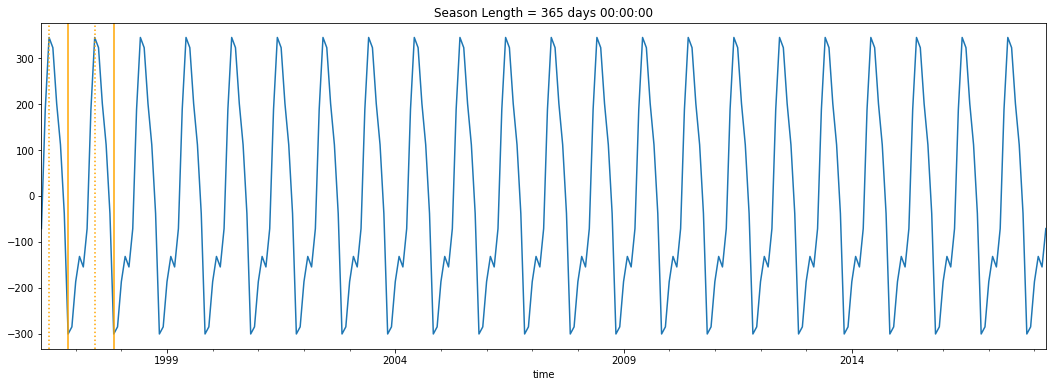

In [789]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [790]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [791]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95765 (Rocklin):
# ARIMA(0, 0, 0) MSE=6644433964.392
# ARIMA(0, 0, 1) MSE=1701893596.180
# ARIMA(0, 1, 0) MSE=7798388.244
# ARIMA(0, 1, 1) MSE=2917153.027
# ARIMA(0, 2, 0) MSE=1846646.736
# ARIMA(0, 2, 1) MSE=1317246.213
# ARIMA(1, 0, 0) MSE=11170163.018
# ARIMA(1, 1, 0) MSE=1812178.739
# ARIMA(1, 1, 1) MSE=1273425.854
# ARIMA(1, 1, 2) MSE=1350163.769
# ARIMA(1, 2, 0) MSE=1772617.389
# ARIMA(1, 2, 1) MSE=1410151.187
# ARIMA(2, 0, 1) MSE=1285305.673
# ARIMA(2, 0, 2) MSE=1372853.303
# ARIMA(2, 1, 1) MSE=1362608.876
# ARIMA(2, 1, 2) MSE=1177039.400
# ARIMA(2, 2, 0) MSE=1390137.431
# ARIMA(2, 2, 1) MSE=1291194.480
# ARIMA(4, 0, 1) MSE=1256667.669
# ARIMA(4, 0, 2) MSE=1165708.647
# ARIMA(4, 1, 1) MSE=1248559.297
# ARIMA(4, 2, 0) MSE=1295894.969
# ARIMA(4, 2, 1) MSE=1322146.051
# ARIMA(6, 0, 1) MSE=1260534.038
# ARIMA(6, 0, 2) MSE=1241182.367
# ARIMA(6, 1, 1) MSE=1234920.466
# ARIMA(6, 2, 0) MSE=1360947.835
# ARIMA(6, 2, 1) MSE=1291957.471
# ARIMA(8, 2, 0) MSE=1309660.726
# ARIMA(8, 2, 1) MSE=1291300.538
# Best ARIMA(4, 0, 2) MSE=1165708.647
# Best ARIMA order = (4, 0, 2)

For 95765 (Rocklin):
Best ARIMA order = (4, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  265
Model:                     ARMA(4, 2)   Log Likelihood               -2111.269
Method:                       css-mle   S.D. of innovations            677.388
Date:                Tue, 24 Mar 2020   AIC                           4238.539
Time:                        13:36:10   BIC                           4267.176
Sample:                    04-01-1996   HQIC                          4250.045
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.548e+05   6.11e+04      5.808      0.000    2.35e+05    4.75e+05
ar.L1.value     1.3313      0.095     14.066      0.000       1.146       1.51

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1

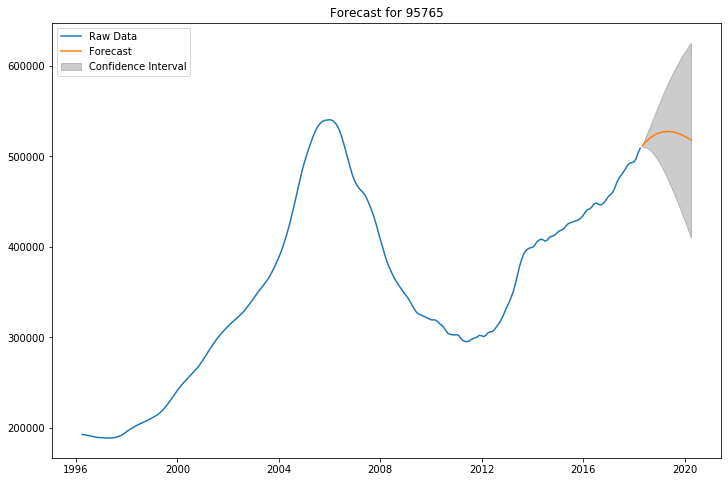

In [792]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4, 0, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [793]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2),
  (4, 0, 2)],
 [717863.06,
  355774.45,
  449047.92,
  386994.52,
  570598.7,
  563857.1

In [794]:
# pop_results_lists()

In [795]:
# print_results_lists()

### Zip code 95765 (Rocklin):  Mediocre investment opportunity

By the model prediction, I would expect to see a 1.734% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -19.438% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 22.906% change in price by April 1, 2020.

## SacMetro:  95602 (Auburn) -- Strong investment opportunity with minimal downside

### Set up dataframe

In [796]:
geog_area = '95602'

In [797]:
city = 'Auburn'

In [798]:
county = 'Placer'

In [799]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [800]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Auburn  95602  184300.0
1996-05-01  Sacramento  Sacramento CA     Placer  Auburn  95602  184000.0
1996-06-01  Sacramento  Sacramento CA     Placer  Auburn  95602  183700.0
1996-07-01  Sacramento  Sacramento CA     Placer  Auburn  95602  183500.0
1996-08-01  Sacramento  Sacramento CA     Placer  Auburn  95602  183300.0

In [801]:
ts = ts.resample('MS').asfreq()

In [802]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Auburn  95602  184300.0
1996-05-01  Sacramento  Sacramento CA     Placer  Auburn  95602  184000.0
1996-06-01  Sacramento  Sacramento CA     Placer  Auburn  95602  183700.0
1996-07-01  Sacramento  Sacramento CA     Placer  Auburn  95602  183500.0
1996-08-01  Sacramento  Sacramento CA     Placer  Auburn  95602  183300.0

### Visualizations

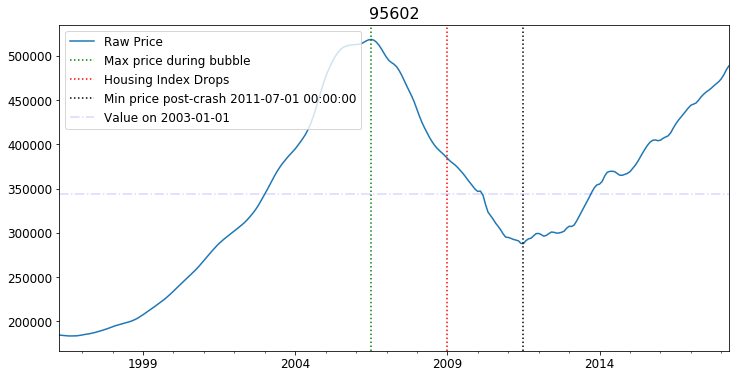

In [803]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

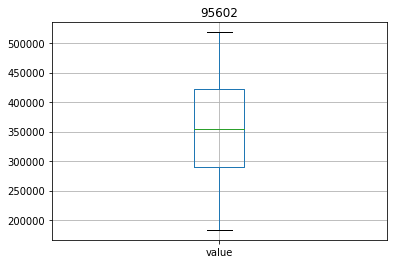

In [804]:
ts.boxplot(column = 'value')
plt.title(geog_area);


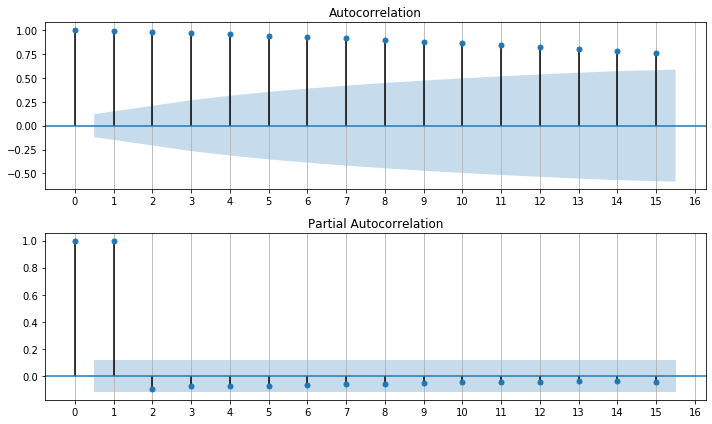

In [805]:
plot_acf_pacf(ts.value)

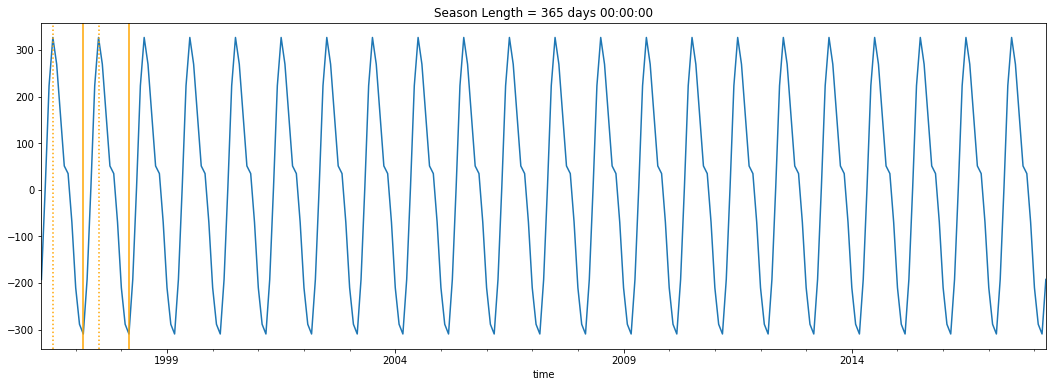

In [806]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [807]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [808]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95602 (Auburn):
# ARIMA(0, 0, 0) MSE=4465367737.995
# ARIMA(0, 0, 1) MSE=1143055340.011
# ARIMA(0, 1, 0) MSE=6925435.932
# ARIMA(0, 1, 1) MSE=2504183.773
# ARIMA(0, 2, 0) MSE=1976453.867
# ARIMA(0, 2, 1) MSE=1607705.064
# ARIMA(1, 0, 0) MSE=9745768.285
# ARIMA(1, 1, 0) MSE=1906487.813
# ARIMA(1, 1, 1) MSE=1501762.179
# ARIMA(1, 2, 0) MSE=1928992.151
# ARIMA(2, 0, 0) MSE=1922901.568
# ARIMA(2, 0, 1) MSE=1515190.794
# ARIMA(2, 1, 0) MSE=1814408.748
# ARIMA(2, 2, 0) MSE=1446843.168
# ARIMA(2, 2, 1) MSE=1389510.447
# ARIMA(2, 2, 2) MSE=1414915.678
# ARIMA(4, 0, 0) MSE=1421909.332
# ARIMA(4, 0, 1) MSE=1360086.188
# ARIMA(4, 0, 2) MSE=1342136.349
# ARIMA(4, 1, 1) MSE=1361822.572
# ARIMA(4, 1, 2) MSE=1312028.990
# ARIMA(4, 2, 0) MSE=1380830.600
# ARIMA(4, 2, 1) MSE=1384521.163
# ARIMA(6, 0, 0) MSE=1350224.552
# ARIMA(6, 0, 1) MSE=1354760.948
# ARIMA(6, 0, 2) MSE=1421939.213
# ARIMA(6, 1, 1) MSE=1372121.788
# ARIMA(6, 2, 0) MSE=1381716.828
# ARIMA(6, 2, 1) MSE=1377932.852
# ARIMA(8, 0, 1) MSE=1350828.397
# ARIMA(8, 2, 0) MSE=1455539.266
# Best ARIMA(4, 1, 2) MSE=1312028.990
# Best ARIMA order = (4, 1, 2)

For 95602 (Auburn):
Best ARIMA order = (4, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2141.289
Method:                       css-mle   S.D. of innovations            797.993
Date:                Tue, 24 Mar 2020   AIC                           4298.578
Time:                        13:36:26   BIC                           4327.186
Sample:                    05-01-1996   HQIC                          4310.073
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1241.6825   1155.963      1.074      0.284   -1023.964    3507.329
ar.L1.D.value     0.1397      0.076      1.836      0.068      -0.009    

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765',
  '95602'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin',
  'Auburn'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2),
  (4, 0, 2),
  (4, 1, 2)],
 [717863.06,
  355774.45,


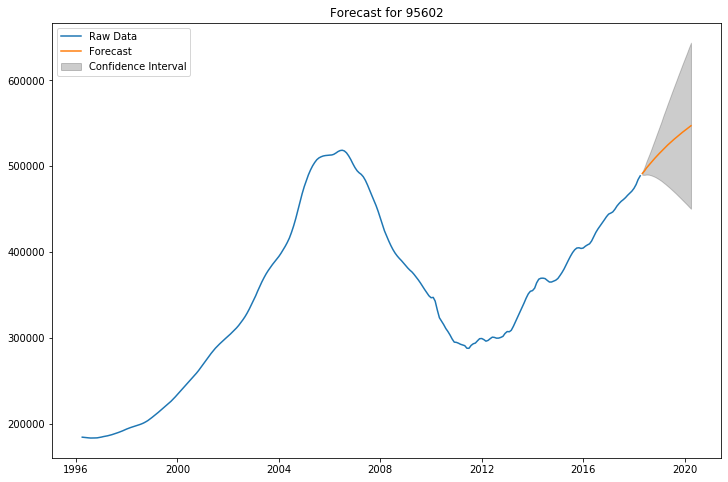

In [809]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (4, 1, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [810]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765',
  '95602'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin',
  'Auburn'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2),
  (4, 0, 2),
  (4, 1, 2)],
 [717863.06,
  355774.45,


In [811]:
# pop_results_lists()

In [812]:
# print_results_lists()

### Zip code 95602 (Auburn):  Strong investment opportunity with minimal downside

By the model prediction, I would expect to see a 11.936% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -7.856% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 31.729% change in price by April 1, 2020.

## SacMetro:  96150 (South Lake Tahoe) -- Excellent investment opportunity, with some downside but significant potential upside

### Set up dataframe

In [813]:
geog_area = '96150'

In [814]:
city = 'South Lake Tahoe'

In [815]:
county = 'El Dorado'

In [816]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [817]:
ts.head()

Metro     MetroState CountyName              City    Zip  \
time                                                                        
1996-04-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-05-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-06-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-07-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-08-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   

               value  
time                  
1996-04-01  132800.0  
1996-05-01  132500.0  
1996-06-01  132400.0  
1996-07-01  132400.0  
1996-08-01  132600.0

In [818]:
ts = ts.resample('MS').asfreq()

In [819]:
ts.head()

Metro     MetroState CountyName              City    Zip  \
time                                                                        
1996-04-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-05-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-06-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-07-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   
1996-08-01  Sacramento  Sacramento CA  El Dorado  South Lake Tahoe  96150   

               value  
time                  
1996-04-01  132800.0  
1996-05-01  132500.0  
1996-06-01  132400.0  
1996-07-01  132400.0  
1996-08-01  132600.0

### Visualizations

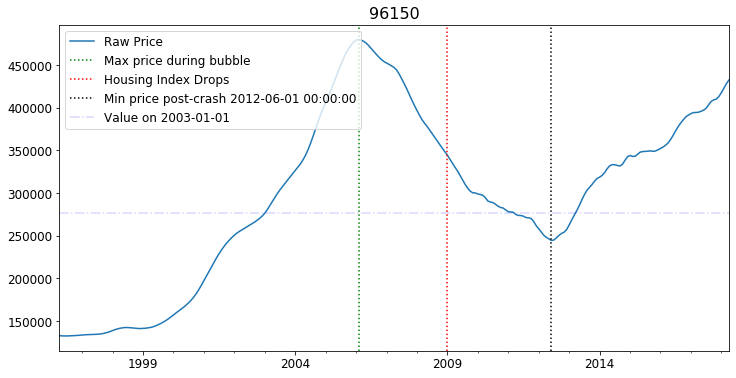

In [820]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

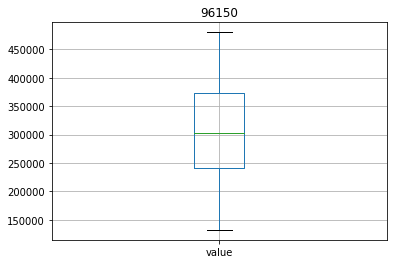

In [821]:
ts.boxplot(column = 'value')
plt.title(geog_area);


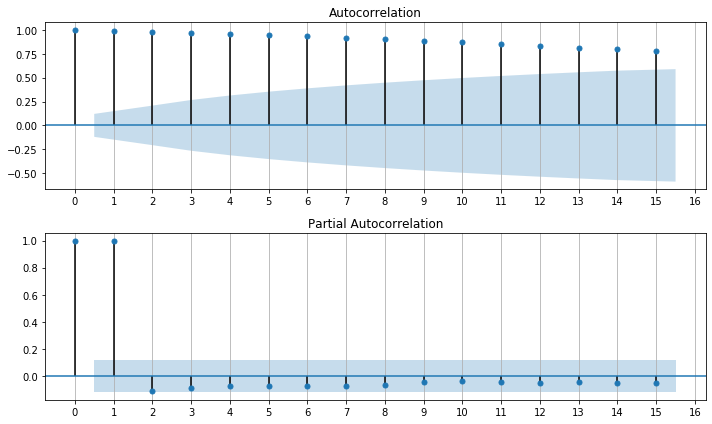

In [822]:
plot_acf_pacf(ts.value)

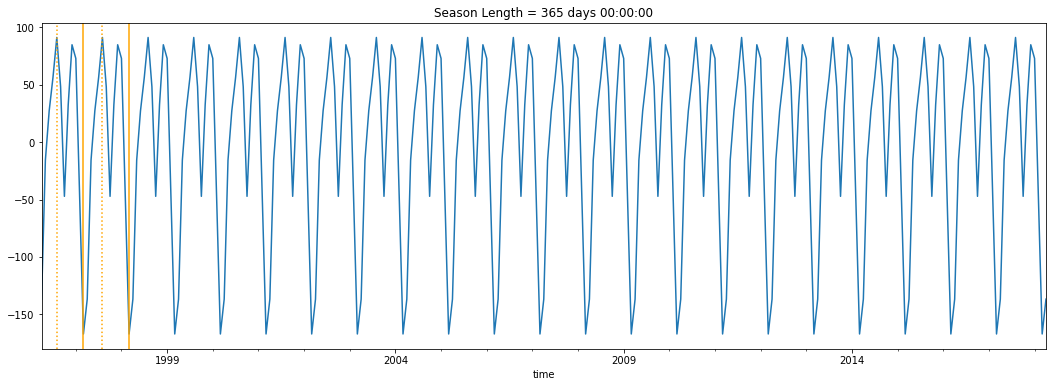

In [823]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [824]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [825]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 96150 (South Lake Tahoe):
# ARIMA(0, 0, 0) MSE=4232090069.873
# ARIMA(0, 1, 0) MSE=7528647.223
# ARIMA(0, 1, 1) MSE=2620355.979
# ARIMA(0, 2, 0) MSE=1557469.255
# ARIMA(0, 2, 1) MSE=1201652.670
# ARIMA(0, 2, 2) MSE=1228294.362
# ARIMA(1, 1, 0) MSE=1525673.493
# ARIMA(1, 1, 1) MSE=1158012.702
# ARIMA(1, 1, 2) MSE=1174973.360
# ARIMA(1, 2, 0) MSE=1449091.397
# ARIMA(1, 2, 1) MSE=1218320.964
# ARIMA(1, 2, 2) MSE=1028205.690
# ARIMA(2, 0, 1) MSE=1164606.286
# ARIMA(2, 0, 2) MSE=1183965.594
# ARIMA(2, 1, 0) MSE=1389025.076
# ARIMA(2, 1, 1) MSE=1172506.714
# ARIMA(2, 2, 0) MSE=1136240.312
# ARIMA(2, 2, 1) MSE=1107346.828
# ARIMA(2, 2, 2) MSE=896773.673
# ARIMA(4, 0, 1) MSE=1083161.365
# ARIMA(4, 0, 2) MSE=903230.970
# ARIMA(4, 1, 1) MSE=1113086.779
# ARIMA(4, 2, 0) MSE=1155246.760
# ARIMA(4, 2, 1) MSE=1116463.457
# ARIMA(6, 0, 1) MSE=1091985.660
# ARIMA(6, 0, 2) MSE=957774.847
# ARIMA(6, 1, 1) MSE=1133579.273
# ARIMA(6, 2, 0) MSE=1136782.717
# ARIMA(6, 2, 1) MSE=1130147.355
# ARIMA(8, 0, 1) MSE=1108963.365
# ARIMA(8, 2, 0) MSE=1182574.627
# ARIMA(8, 2, 1) MSE=1181674.771
# ARIMA(10, 2, 0) MSE=1173910.404
# ARIMA(10, 2, 1) MSE=1133818.580
# Best ARIMA(2, 2, 2) MSE=896773.673
# Best ARIMA order = (2, 2, 2)

For 96150 (South Lake Tahoe):
Best ARIMA order = (2, 2, 2)
                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  263
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2077.640
Method:                       css-mle   S.D. of innovations            647.619
Date:                Tue, 24 Mar 2020   AIC                           4167.279
Time:                        13:36:34   BIC                           4188.712
Sample:                    06-01-1996   HQIC                          4175.893
                         - 04-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.5037     70.258      0.192      0.848    -124.199     151.207
ar.L1.D2.value    -0.8189      0.066    -12.446      0.000  

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765',
  '95602',
  '96150'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin',
  'Auburn',
  'South Lake Tahoe'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2),
  (4,

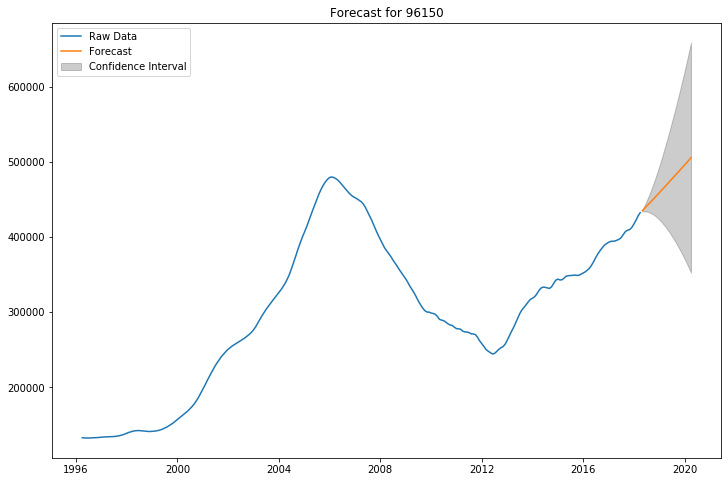

In [826]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (2, 2, 2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [827]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765',
  '95602',
  '96150'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin',
  'Auburn',
  'South Lake Tahoe'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer',
  'Placer',
  'El Dorado'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 2),
  (2, 2, 2),
  (4, 0, 2),
  (4,

In [828]:
# pop_results_lists()

In [829]:
# print_results_lists()

From previous analyses:  Best ARIMA(2, 1, 2) MSE=700451.029

### Zip code  (South Lake Tahoe):  Excellent investment opportunity, with some downside but significant potential upside

By the model prediction, I would expect to see a 16.928% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -18.474% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 52.329% change in price by April 1, 2020.


## SacMetro:  95650 (Loomis) -- Good--but somewhat risky--investment opportunity 

### Set up dataframe

In [830]:
geog_area = '95650'

In [831]:
city = 'Loomis'

In [832]:
county = 'Placer'

In [833]:
ts = df_sac.loc[df_sac['Zip'] == geog_area]

In [834]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Loomis  95650  192900.0
1996-05-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193200.0
1996-06-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193400.0
1996-07-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193500.0
1996-08-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193700.0

In [835]:
ts = ts.resample('MS').asfreq()

In [836]:
ts.head()

Metro     MetroState CountyName    City    Zip     value
time                                                                     
1996-04-01  Sacramento  Sacramento CA     Placer  Loomis  95650  192900.0
1996-05-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193200.0
1996-06-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193400.0
1996-07-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193500.0
1996-08-01  Sacramento  Sacramento CA     Placer  Loomis  95650  193700.0

### Visualizations

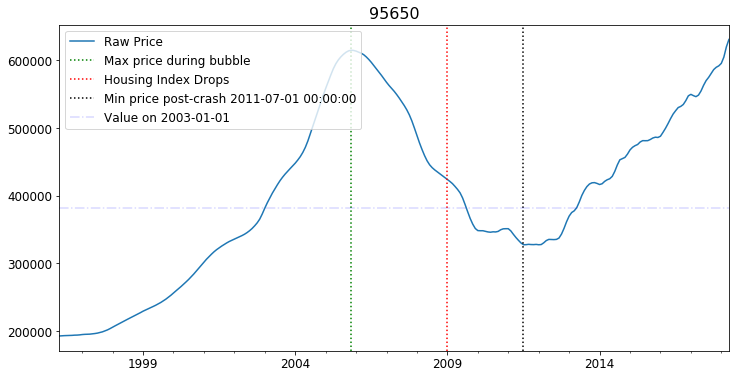

In [837]:
plot_single_geog(df_melt, geog_area, 'value', 'Zip', figsize=(12, 6), fontsize1=12, fontsize2=16)

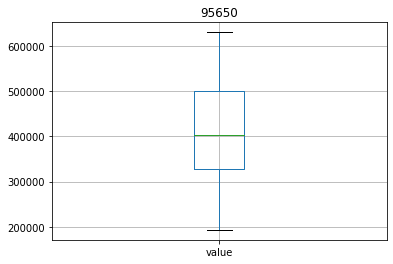

In [838]:
ts.boxplot(column = 'value')
plt.title(geog_area);


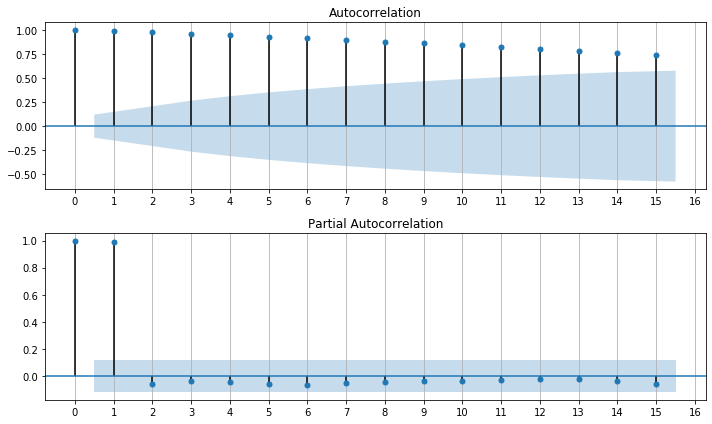

In [839]:
plot_acf_pacf(ts.value)

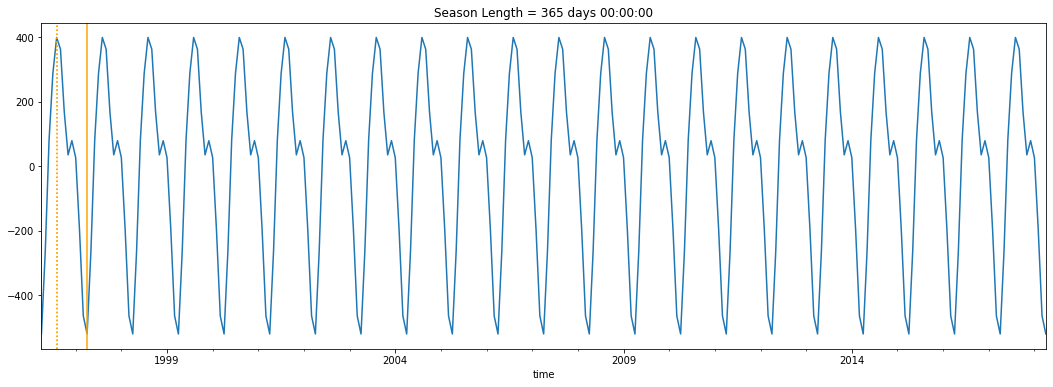

In [840]:
plot_seasonal_decomp(ts.value);

# Note that seasonality isn't much of a factor here; maximum difference of about $700 over the course of a year

### ARIMA parameters tuning

In [841]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)


### ARIMA modeling and forecasting results

In [842]:
# This function will run parameter tuning and will append lists
# Uncomment to run (will take about 20-30 minutes)

# arima_forecast_run(ts, geog_area, city, county, p_values, d_values, q_values, confint=2)

# For 95650 (Loomis):
# ARIMA(0, 0, 0) MSE=10828992054.689
# ARIMA(0, 0, 1) MSE=2779943595.368
# ARIMA(0, 1, 0) MSE=17446652.535
# ARIMA(0, 1, 1) MSE=6075154.262
# ARIMA(0, 2, 0) MSE=5105671.223
# ARIMA(0, 2, 1) MSE=3685977.678
# ARIMA(1, 0, 0) MSE=23979392.115
# ARIMA(1, 1, 0) MSE=5006416.363
# ARIMA(1, 1, 2) MSE=3239755.850
# ARIMA(1, 2, 0) MSE=4683407.204
# ARIMA(1, 2, 1) MSE=3830826.988
# ARIMA(1, 2, 2) MSE=3084467.390
# ARIMA(2, 0, 2) MSE=3291310.628
# ARIMA(2, 1, 1) MSE=3606981.499
# ARIMA(2, 1, 2) MSE=2887910.808
# ARIMA(2, 2, 0) MSE=3290030.236
# ARIMA(2, 2, 1) MSE=3284224.060
# ARIMA(2, 2, 2) MSE=3211400.300
# ARIMA(4, 0, 1) MSE=3221409.624
# ARIMA(4, 0, 2) MSE=3053172.966
# ARIMA(4, 1, 1) MSE=3238767.558
# ARIMA(4, 1, 2) MSE=2976526.318
# ARIMA(4, 2, 0) MSE=3360031.963
# ARIMA(4, 2, 1) MSE=3344082.704
# ARIMA(6, 1, 1) MSE=3242371.200
# ARIMA(6, 2, 0) MSE=3445852.026
# ARIMA(6, 2, 1) MSE=3381538.361
# ARIMA(8, 0, 1) MSE=3310594.957
# ARIMA(8, 0, 2) MSE=3091067.626
# ARIMA(8, 1, 2) MSE=3089490.165
# ARIMA(8, 2, 0) MSE=3174116.305
# ARIMA(8, 2, 1) MSE=3232427.355
# ARIMA(10, 2, 0) MSE=3218817.077
# Best ARIMA(2, 1, 2) MSE=2887910.808
# Best ARIMA order = (2, 1, 2)

For 95650 (Loomis):
Best ARIMA order = (2, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2211.878
Method:                       css-mle   S.D. of innovations           1041.677
Date:                Tue, 24 Mar 2020   AIC                           4435.757
Time:                        13:36:46   BIC                           4457.212
Sample:                    05-01-1996   HQIC                          4444.378
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1630.0130   1078.757      1.511      0.132    -484.312    3744.338
ar.L1.D.value     0.3554      0.073      4.901      0.000       0.213    

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765',
  '95602',
  '96150',
  '95650'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin',
  'Auburn',
  'South Lake Tahoe',
  'Loomis'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer',
  'Placer',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 

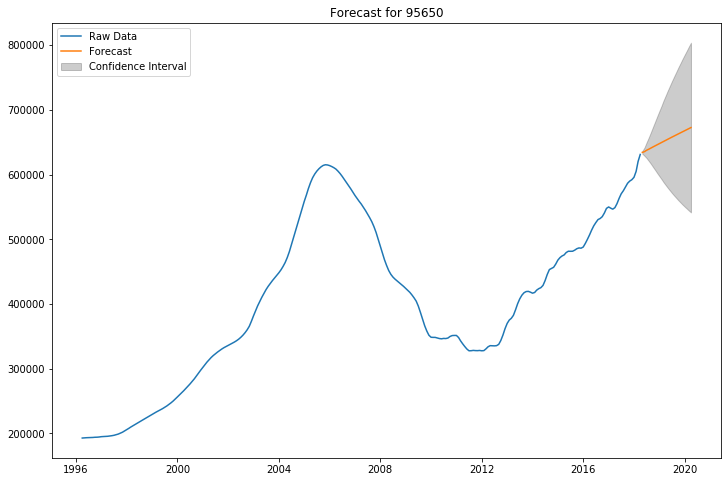

In [843]:
# this function will not run parameter tuning, but will append lists
# Uncomment to run

best_cfg = (2,1,2)
arima_forecast_enter_pdq(ts, geog_area, city, county, best_cfg, confint=2)   

In [844]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765',
  '95602',
  '96150',
  '95650'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin',
  'Auburn',
  'South Lake Tahoe',
  'Loomis'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer',
  'Placer',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 

In [845]:
# pop_results_lists()

In [846]:
# print_results_lists()

### Zip code 95650 (Loomis):  Good--but somewhat risky--investment opportunity 

By the model prediction, I would expect to see a 6.591% change in price by April 1, 2020.
At the lower bound of the confidence interval, I would expect to see a -14.188% change in price by April 1, 2020.
At the upper bound of the confidence interval, I would expect to see a 27.369% change in price by April 1, 2020.


# Summary of findings

## Create summary dataframe

In [847]:
print_lengths()

geog_areas:  20
cities:  20
counties 20
orders:  20
predicted_prices:  20
lower_bound_prices:  20
upper_bound_prices:  20
last_values:  20
pred_pct_changes:  20
lower_pct_changes:  20
upper_pct_changes:  20


In [848]:
print_results_lists()

(['95616',
  '95619',
  '95864',
  '95831',
  '95811',
  '95818',
  '95630',
  '96140',
  '95672',
  '95636',
  '95709',
  '95746',
  '95614',
  '95663',
  '95623',
  '95747',
  '95765',
  '95602',
  '96150',
  '95650'],
 ['Davis',
  'Diamond Springs',
  'Arden-Arcade',
  'Sacramento_Pocket',
  'Sacramento_DosRios',
  'Sacramento_LandPark',
  'Folsom',
  'Carnelian Bay',
  'Rescue',
  'Somerset',
  'Camino',
  'Granite Bay',
  'Cool',
  'Penryn',
  'El Dorado',
  'Roseville',
  'Rocklin',
  'Auburn',
  'South Lake Tahoe',
  'Loomis'],
 ['Yolo',
  'El Dorado',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Sacramento',
  'Placer',
  'El Dorado',
  'El Dorado',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'El Dorado',
  'Placer',
  'Placer',
  'Placer',
  'El Dorado',
  'Placer'],
 [(2, 1, 2),
  (2, 1, 2),
  (8, 0, 2),
  (4, 0, 2),
  (10, 1, 0),
  (1, 1, 1),
  (4, 0, 2),
  (2, 1, 2),
  (4, 1, 2),
  (6, 0, 1),
  (2, 1, 2),
  (4, 1, 2),
  (4, 0, 2),
  (4, 0, 

In [849]:
# print_results_lists()

# geog_areas = ['95616','95619','95864','95831','95811','95818','95630','96140','95672','95636','95709','95746','95614','95663','95623','95747','95765','95602','96150','95650']
# cities = ['Davis','Diamond Springs','Arden-Arcade','Sacramento_Pocket','Sacramento_DosRios','Sacramento_LandPark','Folsom','Carnelian Bay','Rescue','Somerset','Camino','Granite Bay','Cool','Penryn','El Dorado','Roseville','Rocklin','Auburn','South Lake Tahoe','Loomis']
# counties = ['Yolo','El Dorado','Sacramento','Sacramento','Sacramento','Sacramento','Sacramento','Placer','El Dorado','El Dorado','El Dorado','Placer','El Dorado','Placer','El Dorado','Placer','Placer','Placer','El Dorado','Placer']
# orders = [(2, 1, 2),(2, 1, 2),(8, 0, 2),(4, 0, 2),(10, 1, 0),(1, 1, 1),(4, 0, 2),(2, 1, 2),(4, 1, 2),(6, 0, 1),(2, 1, 2),(4, 1, 2),(4, 0, 2),(4, 0, 2),(2, 2, 2),(4, 0, 2),(4, 0, 2),(4, 1, 2),(2, 2, 2),(2, 1, 2)]
# predicted_prices = [717863.06,355774.45,449047.92,386994.52,570598.7,563857.1,484136.82,686817.86,650576.11,230095.49,410576.95,839306.25,406562.1,612903.01,499124.6,477514.15,518030.61,547032.68,505712.86,672586.13]
# lower_bound_prices = [619575.34,275292.09,327568.68,292621.1,459606.77,464602.96,382062.81,560520.55,514993.56,165787.22,321956.34,698769.41,304533.23,471743.88,289222.26,384695.22,410222.8,450306.7,352601.89,541471.1]
# upper_bound_prices = [816150.79,436256.81,570527.16,481367.94,681590.63,663111.23,586210.84,813115.17,786158.66,294403.76,499197.56,979843.08,508590.96,754062.15,709026.93,570333.08,625838.43,643758.66,658823.83,803701.17]
#  last_values = [692300.0,321100.0,552700.0,449300.0,567500.0,563900.0,542900.0,644600.0,579300.0,241200.0,386000.0,778500.0,423300.0,600700.0,455700.0,483800.0,509200.0,488700.0,432500.0,631000.0]
#  pred_pct_changes = [3.69,10.8,-18.75,-13.87,0.55,-0.01,-10.82,6.55,12.3,-4.6,6.37,7.81,-3.95,2.03,9.53,-1.3,1.73,11.94,16.93,6.59]
#  lower_pct_changes = [-10.5,-14.27,-40.73,-34.87,-19.01,-17.61,-29.63,-13.04,-11.1,-31.27,-16.59,-10.24,-28.06,-21.47,-36.53,-20.48,-19.44,-7.86,-18.47,-14.19]
#  upper_pct_changes = [17.89,35.86,3.23,7.14,20.1,17.59,7.98,26.14,35.71,22.06,29.33,25.86,20.15,25.53,55.59,17.89,22.91,31.73,52.33,27.37])

In [850]:
population = [45500, 4359, 92186, 42952, 7630, 21825, 74111, 1170, 4592, 1000, 4354, 22482, 3882, 2468, 3986,
             72437, 41810, 18290, 30000, 12600]
len(population)

20

In [851]:
# pred_pct_changes = [3.69,10.8,-18.75,-13.87,0.55,-0.01,-10.82,6.55,12.3,-4.6,6.37,7.81,-3.95,2.03,9.53,-1.3,1.73,11.94,16.93,6.59]

invest_recs = []

for i in pred_pct_changes:
    if i <= 0.9:
        invest_recs.append("poor")
    elif i <= 4.9:
        invest_recs.append("mediocre")
    elif i <= 9.9:
        invest_recs.append("good")
    else:
        invest_recs.append("excellent")

invest_recs

['mediocre',
 'excellent',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'good',
 'excellent',
 'poor',
 'good',
 'good',
 'poor',
 'mediocre',
 'good',
 'poor',
 'mediocre',
 'excellent',
 'excellent',
 'good']

In [852]:
len(invest_recs)

20

In [853]:
df_findings = pd.DataFrame({'ZIP code': geog_areas, '2018 value': last_values, 'City': cities, 
                            'Pop': population, 'County': counties, 'Investment rating, based on predicted return': invest_recs, 
                            'Predicted % Change': pred_pct_changes, 'Worst Case % Change': lower_pct_changes,
                            'Best Case % Change': upper_pct_changes, 'Predicted':predicted_prices, 
                            'Worst Case':lower_bound_prices, 'Best Case':upper_bound_prices})


In [854]:
df_findings

ZIP code  2018 value                 City    Pop      County  \
0     95616    692300.0                Davis  45500        Yolo   
1     95619    321100.0      Diamond Springs   4359   El Dorado   
2     95864    552700.0         Arden-Arcade  92186  Sacramento   
3     95831    449300.0    Sacramento_Pocket  42952  Sacramento   
4     95811    567500.0   Sacramento_DosRios   7630  Sacramento   
5     95818    563900.0  Sacramento_LandPark  21825  Sacramento   
6     95630    542900.0               Folsom  74111  Sacramento   
7     96140    644600.0        Carnelian Bay   1170      Placer   
8     95672    579300.0               Rescue   4592   El Dorado   
9     95636    241200.0             Somerset   1000   El Dorado   
10    95709    386000.0               Camino   4354   El Dorado   
11    95746    386000.0          Granite Bay  22482      Placer   
12    95614    423300.0                 Cool   3882   El Dorado   
13    95663    600700.0               Penryn   2468      Placer   
14    95623    455700.0            El Dorado   3986   El Dorado   
15    95747    483800.0            Roseville  72437      Placer   
16    95765    509200.0              Rocklin  41810      Placer   
17    95602    488700.0               Auburn  18290      Placer   
18    96150    432500.0     South Lake Tahoe  30000   El Dorado   
19    95650    631000.0               Loomis  12600      Placer   

   Investment rating, based on predicted return  Predicted % Change  \
0                                      mediocre                3.69   
1                                     excellent               10.80   
2                                          poor              -18.75   
3                                          poor              -13.87   
4                                          poor                0.55   
5                                          poor               -0.01   
6                                          poor              -10.82   
7                                          good                6.55   
8                                     excellent               12.30   
9                                          poor               -4.60   
10                                         good                6.37   
11                                         good                9.80   
12                                         poor               -3.95   
13                                     mediocre                2.03   
14                                         good                9.53   
15                                         poor               -1.30   
16                                     mediocre                1.73   
17                                    excellent               11.94   
18                                    excellent               16.93   
19                                         good                6.59   

    Worst Case % Change  Best Case % Change  Predicted  Worst Case  Best Case  
0                -10.50               17.89  717863.06   619575.34  816150.79  
1                -14.27               35.86  355774.45   275292.09  436256.81  
2                -40.73                3.23  449047.92   327568.68  570527.16  
3                -34.87                7.14  386994.52   292621.10  481367.94  
4                -19.01               20.10  570598.70   459606.77  681590.63  
5                -17.61               17.59  563857.10   464602.96  663111.23  
6                -29.63                7.98  484136.82   382062.81  586210.84  
7                -13.04               26.14  686817.86   560520.55  813115.17  
8                -11.10               35.71  650576.11   514993.56  786158.66  
9                -31.27               22.06  230095.49   165787.22  294403.76  
10               -16.59               29.33  410576.95   321956.34  499197.56  
11               -11.96               31.55  423809.57   339823.66  507795.49  
12               -28.06               20.15  406562.10   304533

In [855]:
df_findings = df_findings.set_index('ZIP code')

In [856]:
df_findings

2018 value                 City    Pop      County  \
ZIP code                                                       
95616       692300.0                Davis  45500        Yolo   
95619       321100.0      Diamond Springs   4359   El Dorado   
95864       552700.0         Arden-Arcade  92186  Sacramento   
95831       449300.0    Sacramento_Pocket  42952  Sacramento   
95811       567500.0   Sacramento_DosRios   7630  Sacramento   
95818       563900.0  Sacramento_LandPark  21825  Sacramento   
95630       542900.0               Folsom  74111  Sacramento   
96140       644600.0        Carnelian Bay   1170      Placer   
95672       579300.0               Rescue   4592   El Dorado   
95636       241200.0             Somerset   1000   El Dorado   
95709       386000.0               Camino   4354   El Dorado   
95746       386000.0          Granite Bay  22482      Placer   
95614       423300.0                 Cool   3882   El Dorado   
95663       600700.0               Penryn   2468      Placer   
95623       455700.0            El Dorado   3986   El Dorado   
95747       483800.0            Roseville  72437      Placer   
95765       509200.0              Rocklin  41810      Placer   
95602       488700.0               Auburn  18290      Placer   
96150       432500.0     South Lake Tahoe  30000   El Dorado   
95650       631000.0               Loomis  12600      Placer   

         Investment rating, based on predicted return  Predicted % Change  \
ZIP code                                                                    
95616                                        mediocre                3.69   
95619                                       excellent               10.80   
95864                                            poor              -18.75   
95831                                            poor              -13.87   
95811                                            poor                0.55   
95818                                            poor               -0.01   
95630                                            poor              -10.82   
96140                                            good                6.55   
95672                                       excellent               12.30   
95636                                            poor               -4.60   
95709                                            good                6.37   
95746                                            good                9.80   
95614                                            poor               -3.95   
95663                                        mediocre                2.03   
95623                                            good                9.53   
95747                                            poor               -1.30   
95765                                        mediocre                1.73   
95602                                       excellent               11.94   
96150                                       excellent               16.93   
95650                                            good                6.59   

          Worst Case % Change  Best Case % Change  Predicted  Worst Case  \
ZIP code                                                                   
95616                  -10.50               17.89  717863.06   619575.34   
95619                  -14.27               35.86  355774.45   275292.09   
95864                  -40.73                3.23  449047.92   327568.68   
95831                  -34.87                7.14  386994.52   292621.10   
95811                  -19.01               20.10  570598.70   459606.77   
95818                  -17.61               17.59  563857.10   464602.96   
95630                  -29.63                7.98  484136.82   382062.81   
96140                  -13.04               26.14  686817.86   560520.55   
95672                  -11.10               35.71  650576.11   514993.56   
95636                  -31.27               22.06  230095.49   165787.

In [857]:
df_findings.sort_values('Predicted % Change', ascending = False, inplace=True)

In [858]:
df_findings

2018 value                 City    Pop      County  \
ZIP code                                                       
96150       432500.0     South Lake Tahoe  30000   El Dorado   
95672       579300.0               Rescue   4592   El Dorado   
95602       488700.0               Auburn  18290      Placer   
95619       321100.0      Diamond Springs   4359   El Dorado   
95746       386000.0          Granite Bay  22482      Placer   
95623       455700.0            El Dorado   3986   El Dorado   
95650       631000.0               Loomis  12600      Placer   
96140       644600.0        Carnelian Bay   1170      Placer   
95709       386000.0               Camino   4354   El Dorado   
95616       692300.0                Davis  45500        Yolo   
95663       600700.0               Penryn   2468      Placer   
95765       509200.0              Rocklin  41810      Placer   
95811       567500.0   Sacramento_DosRios   7630  Sacramento   
95818       563900.0  Sacramento_LandPark  21825  Sacramento   
95747       483800.0            Roseville  72437      Placer   
95614       423300.0                 Cool   3882   El Dorado   
95636       241200.0             Somerset   1000   El Dorado   
95630       542900.0               Folsom  74111  Sacramento   
95831       449300.0    Sacramento_Pocket  42952  Sacramento   
95864       552700.0         Arden-Arcade  92186  Sacramento   

         Investment rating, based on predicted return  Predicted % Change  \
ZIP code                                                                    
96150                                       excellent               16.93   
95672                                       excellent               12.30   
95602                                       excellent               11.94   
95619                                       excellent               10.80   
95746                                            good                9.80   
95623                                            good                9.53   
95650                                            good                6.59   
96140                                            good                6.55   
95709                                            good                6.37   
95616                                        mediocre                3.69   
95663                                        mediocre                2.03   
95765                                        mediocre                1.73   
95811                                            poor                0.55   
95818                                            poor               -0.01   
95747                                            poor               -1.30   
95614                                            poor               -3.95   
95636                                            poor               -4.60   
95630                                            poor              -10.82   
95831                                            poor              -13.87   
95864                                            poor              -18.75   

          Worst Case % Change  Best Case % Change  Predicted  Worst Case  \
ZIP code                                                                   
96150                  -18.47               52.33  505712.86   352601.89   
95672                  -11.10               35.71  650576.11   514993.56   
95602                   -7.86               31.73  547032.68   450306.70   
95619                  -14.27               35.86  355774.45   275292.09   
95746                  -11.96               31.55  423809.57   339823.66   
95623                  -36.53               55.59  499124.60   289222.26   
95650                  -14.19               27.37  672586.13   541471.10   
96140                  -13.04               26.14  686817.86   560520.55   
95709                  -16.59               29.33  410576.95   321956.34   
95616                  -10.50               17.89  717863.06   619575.

## Visualizations

### Visualization of semi-finalist ZIP codes


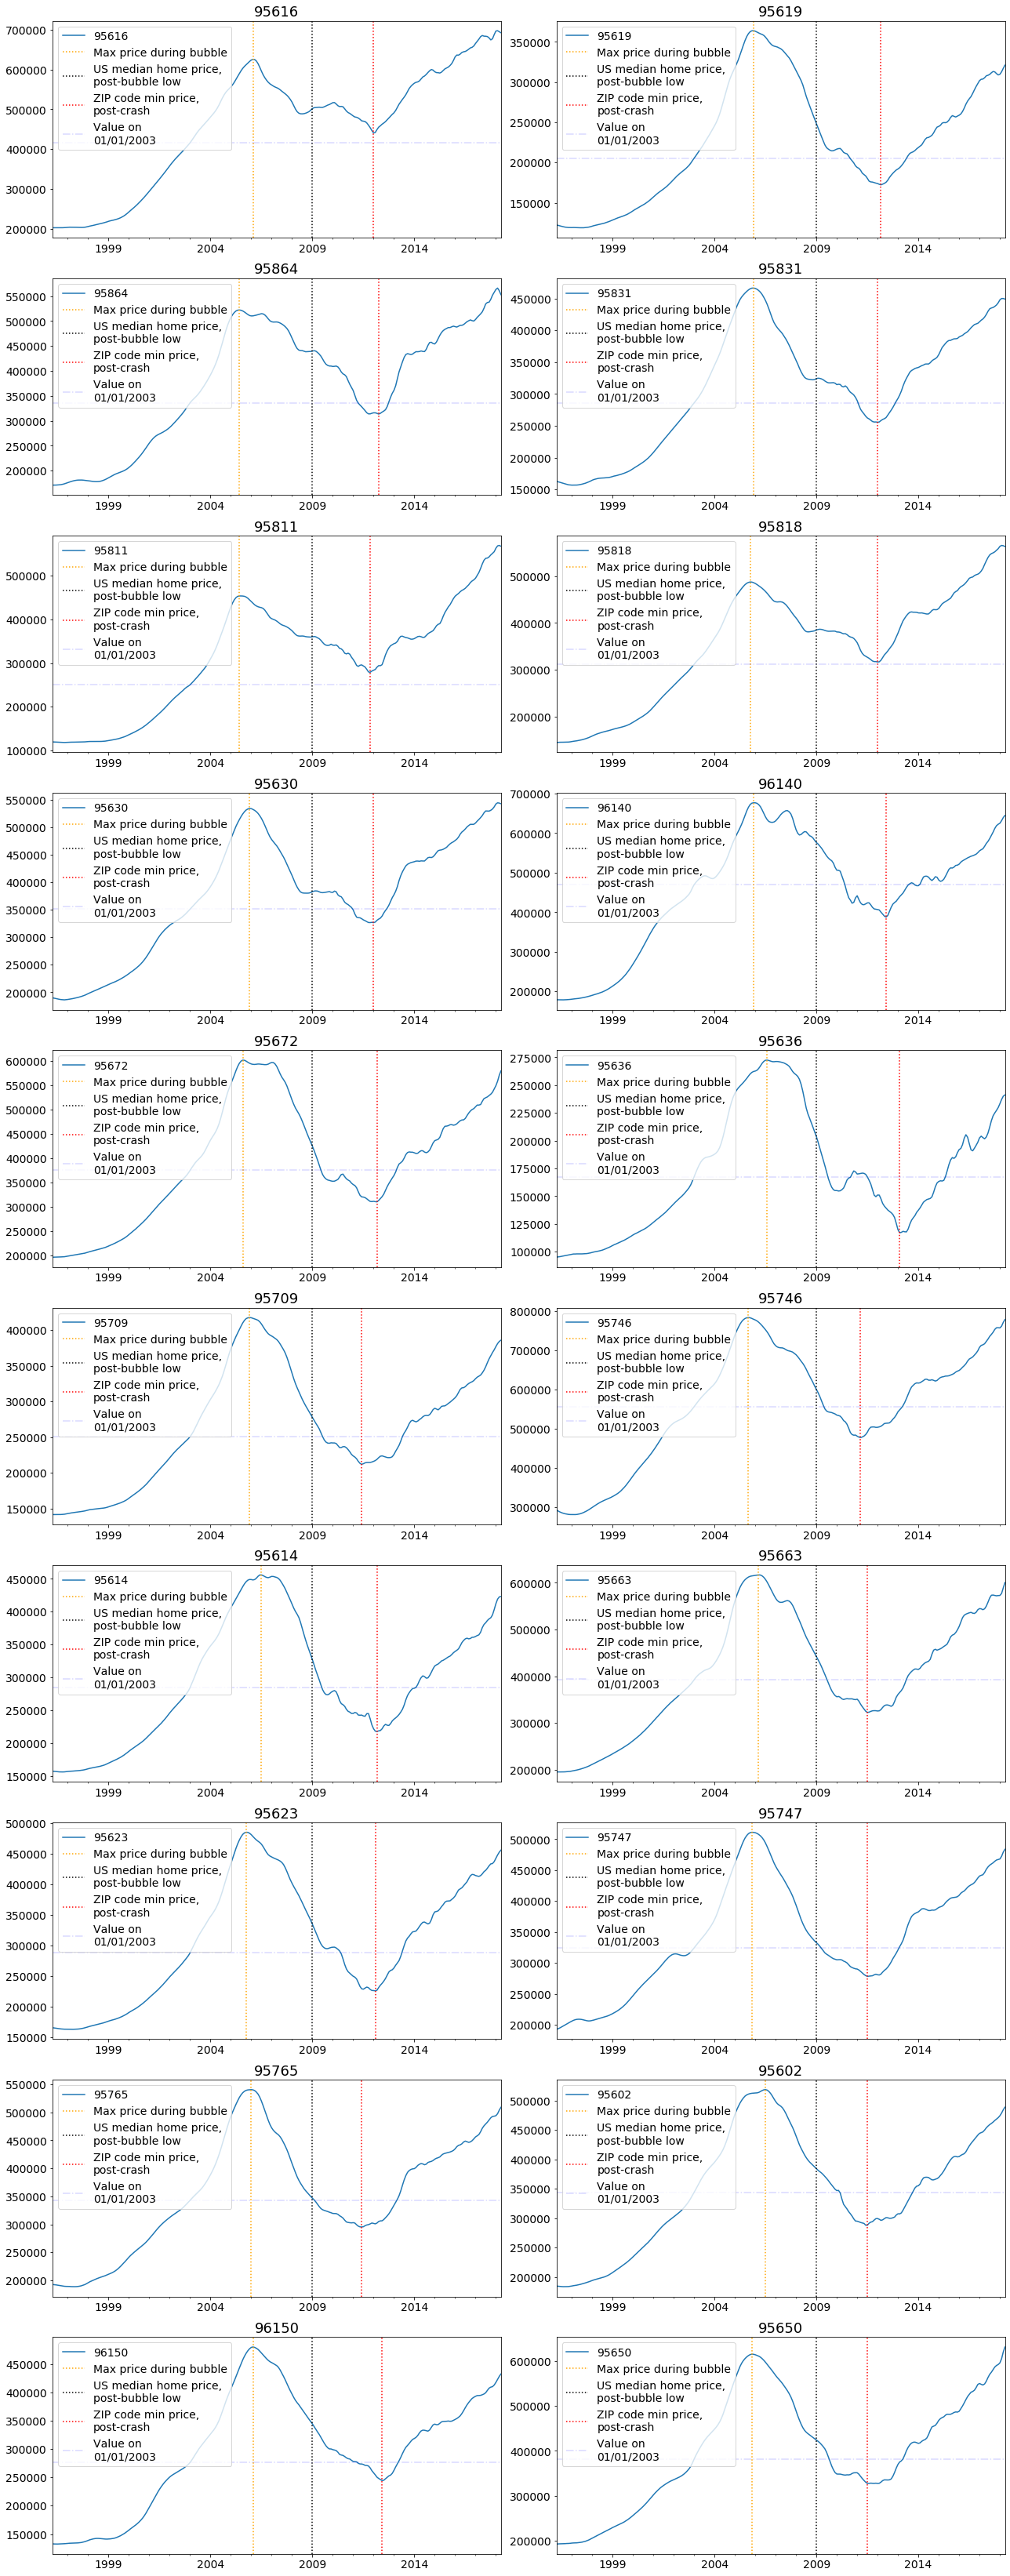

In [859]:
fig, ax = plot_ts_zips(df_sac, geog_areas, nrows=11, ncols=2, figsize=(18, 50), legend=True)


### Visualization of semi-finalist ZIP codes, labeled with ZIP *AND* city


#### Create function to automate plotting of semifinalist ZIP codes with city and ZIP labels

In [860]:
def zip_semifinalists(df, dict_zip_city, col = 'value', nrows=11, ncols=2, figsize=(18, 40), legend=True):

    fig = plt.figure(figsize=figsize)

    for i, key in enumerate(dict_zip_city.keys(), start=1):
        ax = fig.add_subplot(nrows, ncols, i)   
        ts = df[col].loc[df['Zip'] == dict_zip_city[key]]
        ts = ts.rename(dict_zip_city[key])
        try: 
            max_ = ts.loc['2004':'2011'].idxmax()  
        except:
            continue

        crash = '01-2009'
        min_ = ts.loc[crash:].idxmin()
        val_2003 = ts.loc['2003-01-01']
        ts.plot(ax=ax, fontsize=12)   
        plt.title(f'{key} ({dict_zip_city[key]})', fontsize=16)
        plt.xlabel('')

        ax.axvline(max_, label = 'Maximum value during bubble', color = 'orange', ls=':')               
        ax.axvline(crash, label = 'Housing market declines', color='black')                         
        ax.axvline(min_, label = 'Minimum value after crash', color = 'red', ls=':')
        ax.axhline(val_2003, label='Value on 2003-01-01', color = 'blue', ls='-.', alpha=0.15)

        if legend:
            ax.legend(loc='upper left', prop={'size': 10})

        fig.tight_layout()
        
    return fig, ax


#### Create dictionary of each ZIP code and the city to which it belongs



In [861]:
dict_semifinal_city_zip = dict(zip(cities, geog_areas))

In [862]:
dict_semifinal_city_zip

{'Davis': '95616',
 'Diamond Springs': '95619',
 'Arden-Arcade': '95864',
 'Sacramento_Pocket': '95831',
 'Sacramento_DosRios': '95811',
 'Sacramento_LandPark': '95818',
 'Folsom': '95630',
 'Carnelian Bay': '96140',
 'Rescue': '95672',
 'Somerset': '95636',
 'Camino': '95709',
 'Granite Bay': '95746',
 'Cool': '95614',
 'Penryn': '95663',
 'El Dorado': '95623',
 'Roseville': '95747',
 'Rocklin': '95765',
 'Auburn': '95602',
 'South Lake Tahoe': '96150',
 'Loomis': '95650'}

In [863]:
dict_semifinal_city_zip = dict(sorted(dict_semifinal_city_zip.items()))

In [864]:
dict_semifinal_city_zip

{'Arden-Arcade': '95864',
 'Auburn': '95602',
 'Camino': '95709',
 'Carnelian Bay': '96140',
 'Cool': '95614',
 'Davis': '95616',
 'Diamond Springs': '95619',
 'El Dorado': '95623',
 'Folsom': '95630',
 'Granite Bay': '95746',
 'Loomis': '95650',
 'Penryn': '95663',
 'Rescue': '95672',
 'Rocklin': '95765',
 'Roseville': '95747',
 'Sacramento_DosRios': '95811',
 'Sacramento_LandPark': '95818',
 'Sacramento_Pocket': '95831',
 'Somerset': '95636',
 'South Lake Tahoe': '96150'}

In [865]:
len(dict_semifinal_city_zip)

20

#### Run function to generate plots for all ZIP codes

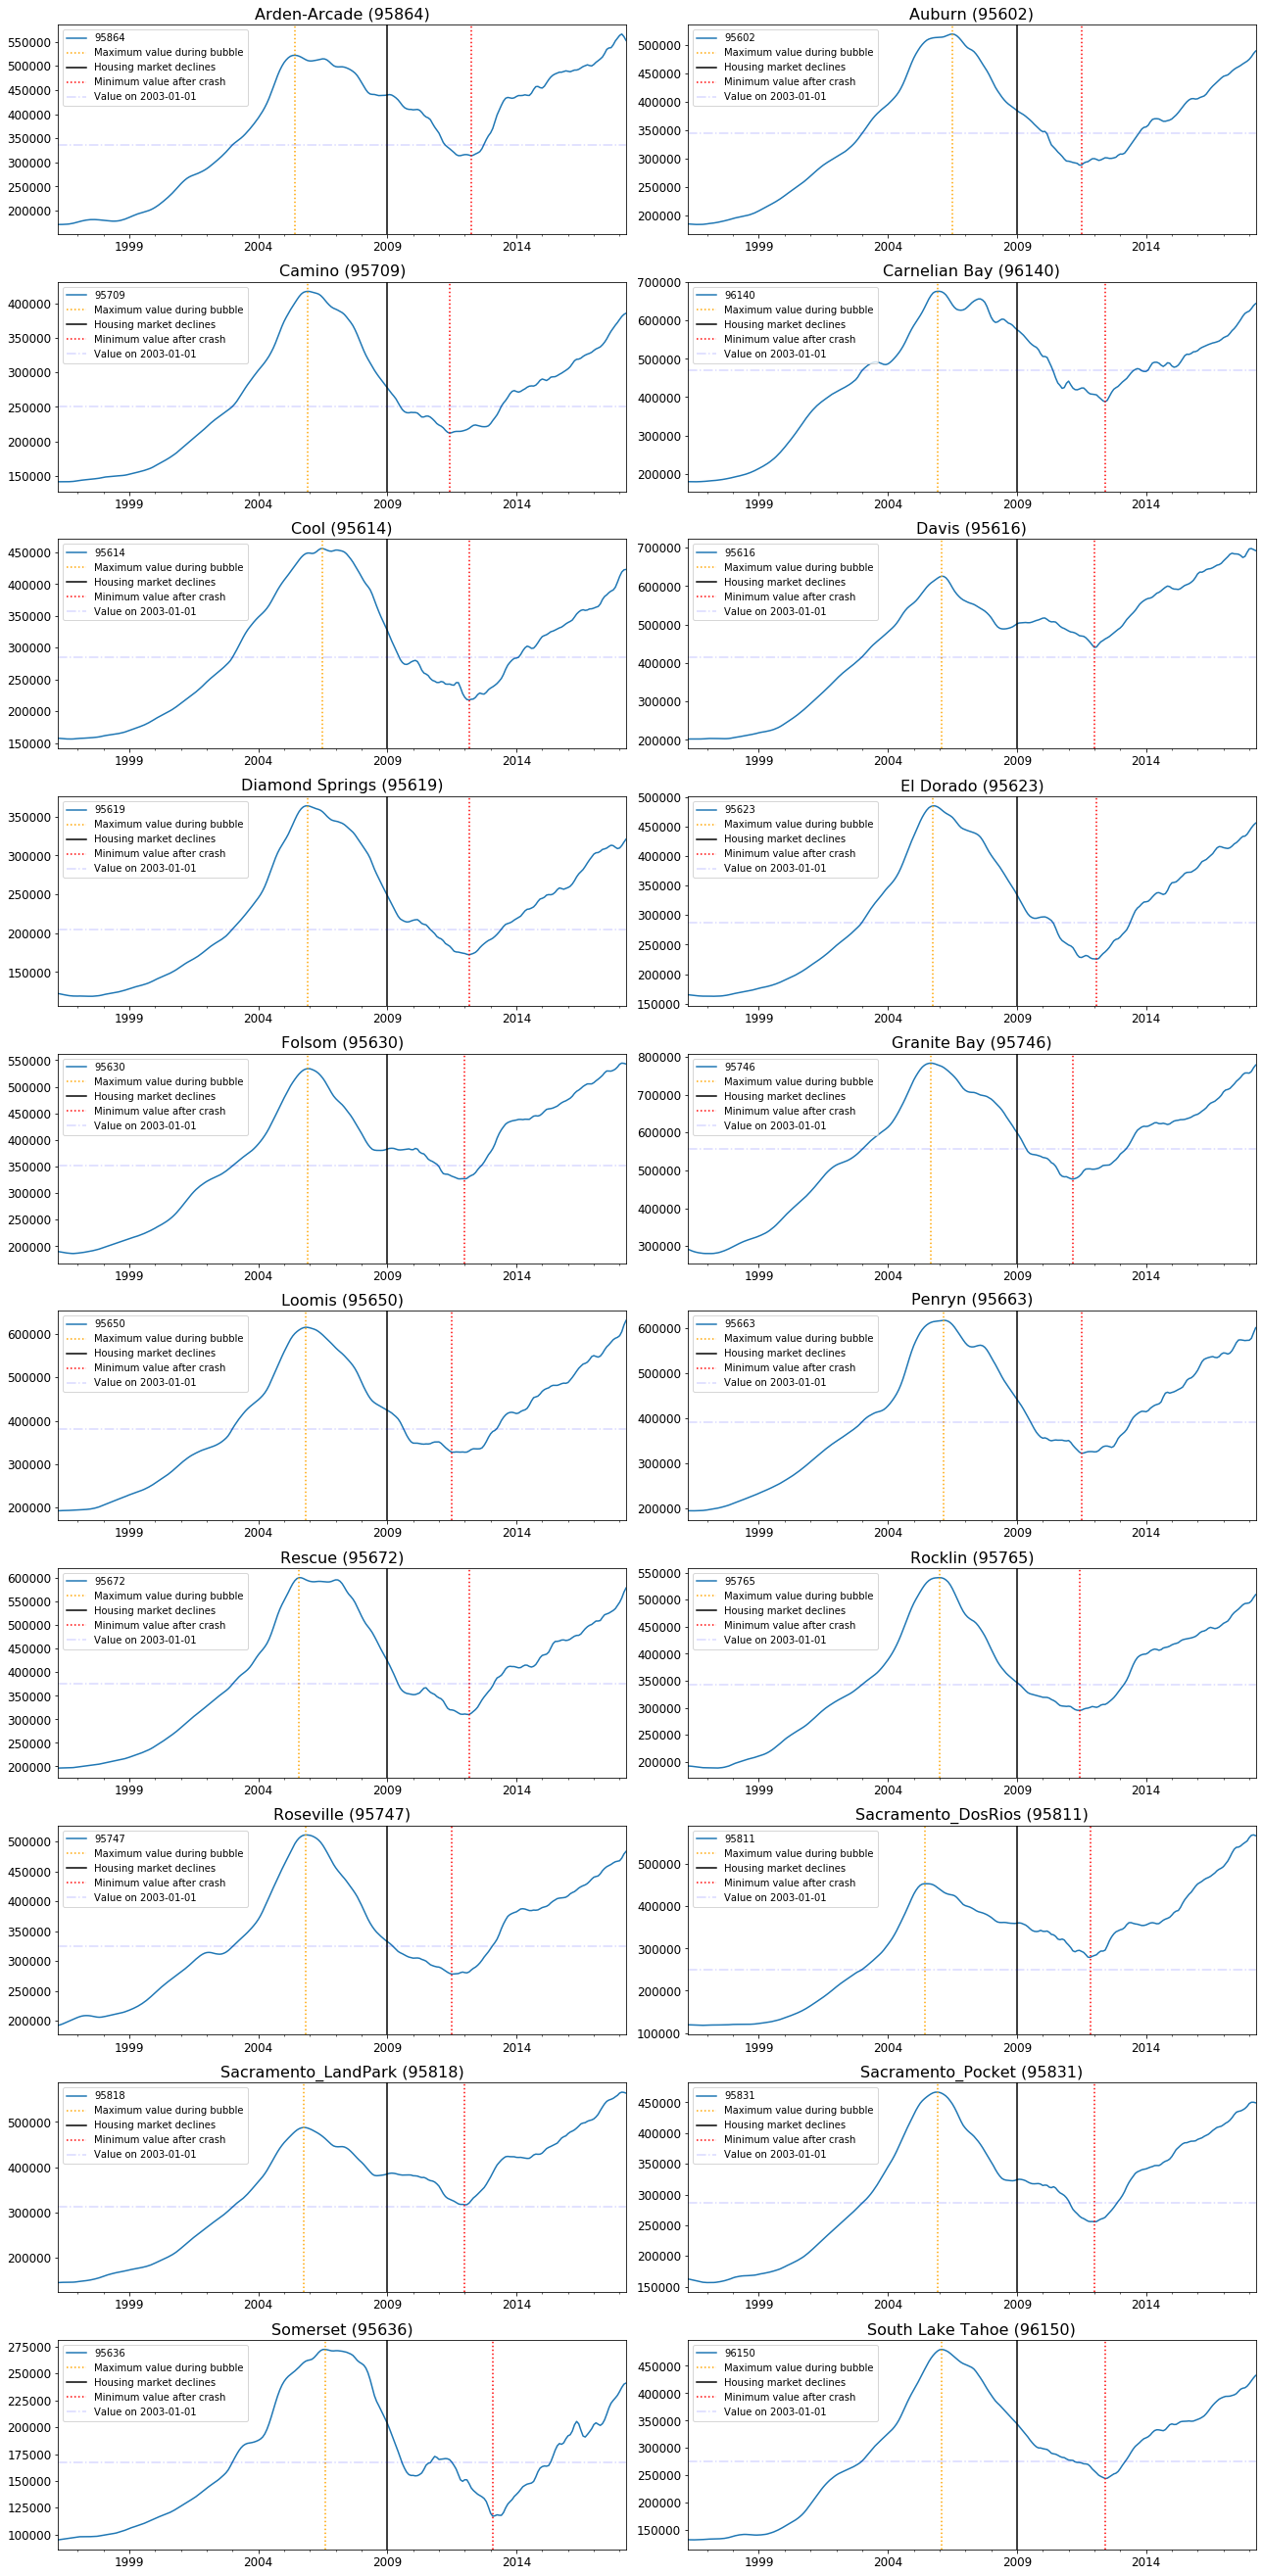

In [866]:
zip_semifinalists(df_sac, dict_semifinal_city_zip, col = 'value', nrows=11, ncols=2, figsize=(18, 40), legend=True);

### Create 6 ZIP plots at one time (PowerPoint-friendlier format)

#### Need to first create subset dictionaries to plot over

In [867]:
def return_slice(dictionary, m, n):
    sub_dict = {k: dictionary[k] for k in list(dictionary)[m:n]}
    return sub_dict


In [868]:
dict_semi_0_6 = return_slice(dict_semifinal_city_zip, 0, 6)
dict_semi_0_6

{'Arden-Arcade': '95864',
 'Auburn': '95602',
 'Camino': '95709',
 'Carnelian Bay': '96140',
 'Cool': '95614',
 'Davis': '95616'}

In [869]:
dict_semi_6_12 = return_slice(dict_semifinal_city_zip, 6, 12)
dict_semi_6_12

{'Diamond Springs': '95619',
 'El Dorado': '95623',
 'Folsom': '95630',
 'Granite Bay': '95746',
 'Loomis': '95650',
 'Penryn': '95663'}

In [870]:
dict_semi_12_18 = return_slice(dict_semifinal_city_zip, 12, 18)
dict_semi_12_18

{'Rescue': '95672',
 'Rocklin': '95765',
 'Roseville': '95747',
 'Sacramento_DosRios': '95811',
 'Sacramento_LandPark': '95818',
 'Sacramento_Pocket': '95831'}

In [871]:
dict_semi_18_20 = return_slice(dict_semifinal_city_zip, 18, 20)
dict_semi_18_20

{'Somerset': '95636', 'South Lake Tahoe': '96150'}

#### Run function on subset dictionaries

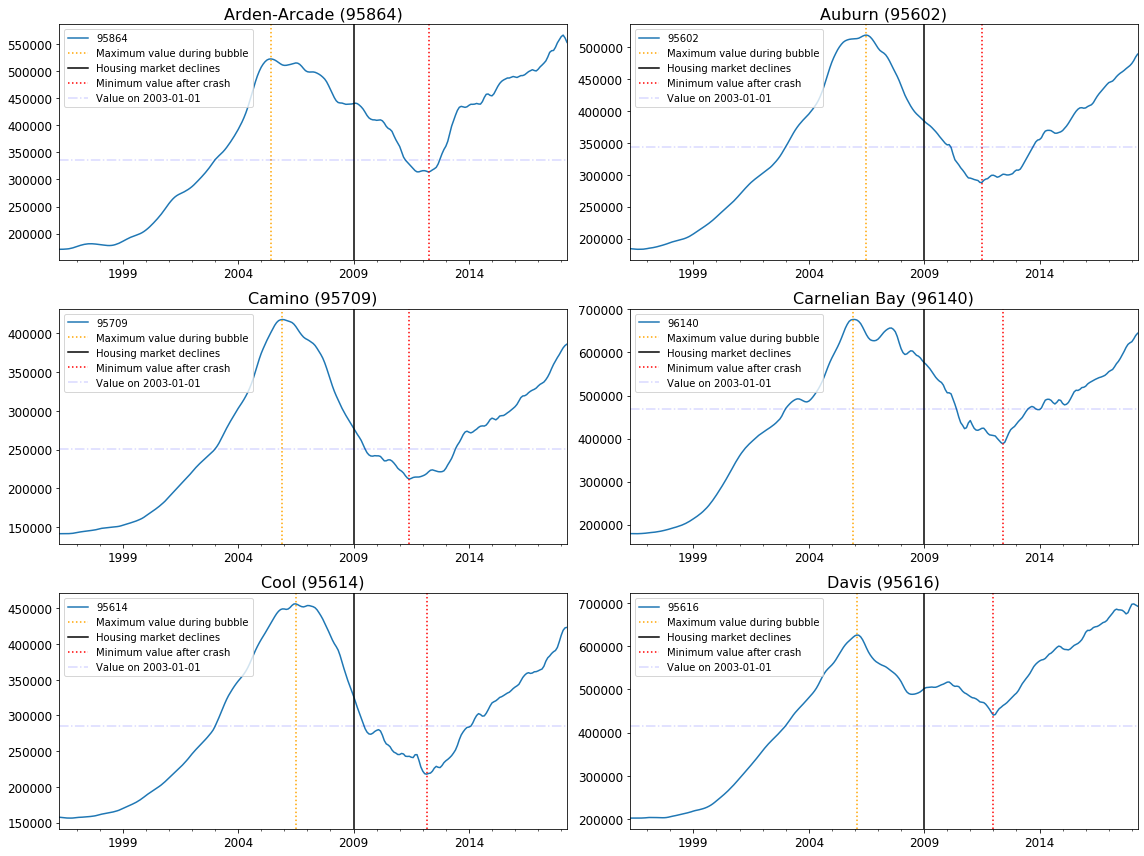

In [872]:
zip_semifinalists(df_sac, dict_semi_0_6, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

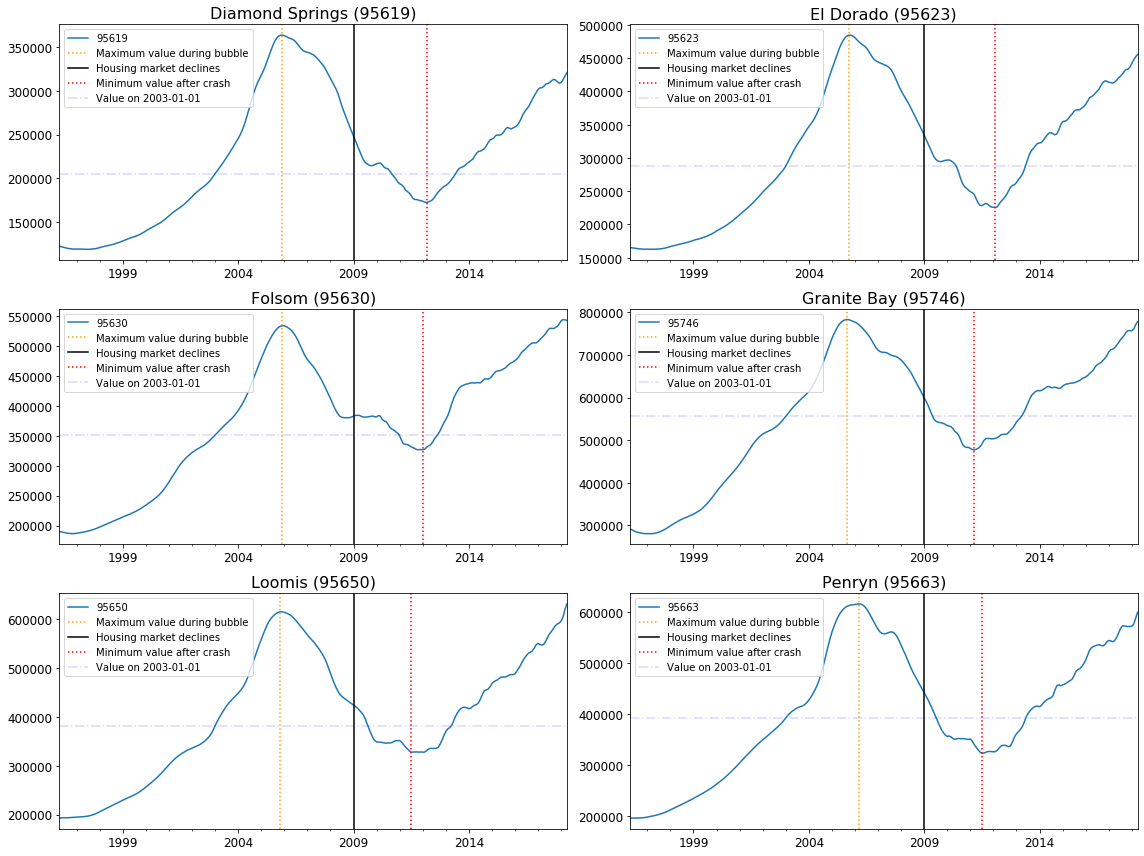

In [873]:
zip_semifinalists(df_sac, dict_semi_6_12, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

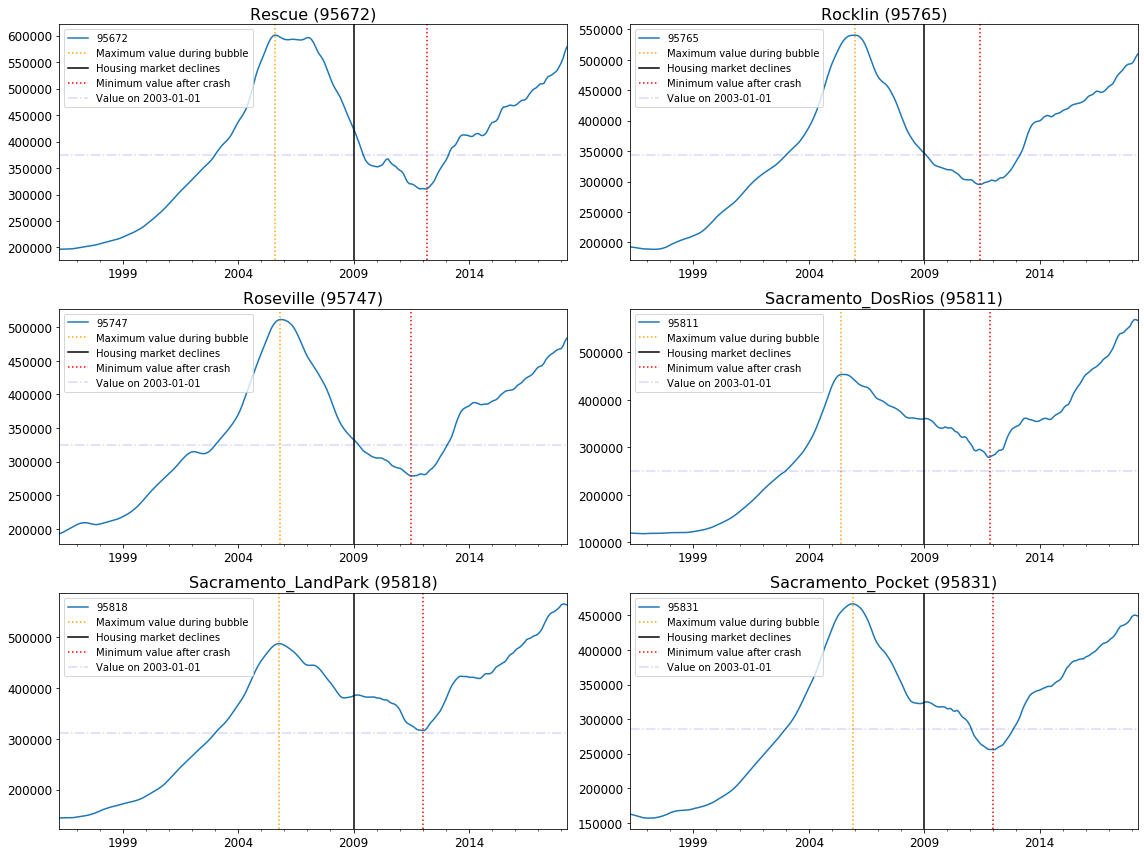

In [874]:
zip_semifinalists(df_sac, dict_semi_12_18, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

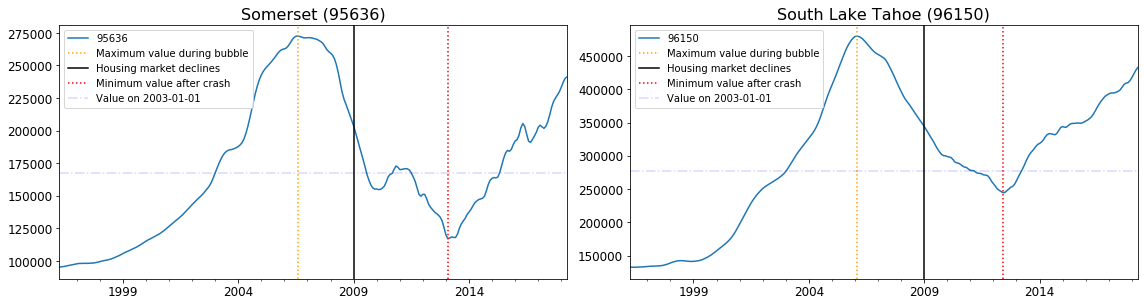

In [875]:
zip_semifinalists(df_sac, dict_semi_18_20, col = 'value', nrows=3, ncols=2, figsize=(16, 12), legend=True);

## Recommended ZIP Codes

### Decision-making process

*First,* I sorted ZIP codes based on __predicted return__.  This is how the summary table is sorted.   

*Second,* I considered the potential __worst-case valuation scenario__.  
- There are a few ZIP codes that have relatively good predicted valuations over the two-year time horizon, but also have substantial potential downside.  Examples include El Dorado and Camino.  

*Third,* I reviewed the potential __best-case valuation scenario,__ just to see how much potential upside the ZIP code could yield.  
- Since time series predictions are so uncertain--as illustrated by the large differences between the upper bound and lower bound values--I don't put much weight on the upper end of potential yields.  
- Predicted values as well as downside risk are more important, but looking at the best-case scenario can suggest whether a higher return is more likely.  

*Finally,* I looked at the __population__ in each ZIP code, as well as the __geographic location__ of the ZIP code.   
- Two of the five recommended ZIP codes have relatively small populations (just under 5000).  
- However, the other 3 ZIP codes have greater populations.  
- Having a mix of smaller and larger populations represented by the 5 ZIP codes should offer plenty of diversity of investment opportunity and return.   


### Top 5 ZIP codes the Sacramento Metro region:

1.  *South Lake Tahoe, CA (96150).*  Population size is large (30,000), especially given the limited space around Lake Tahoe.  Thus, there are likely to be a variety of both economy and luxury investment opportunity, and a greater availability of commercial real estate investment opportunities, should the investing group wish to pursue these.  Average home values are predicted to ___increase by 16.9%___ by 4/1/2020; worst-case, property values decline as much as -18%, but the best-case scenario has property values increasing by over 52%.   


2.  *Rescue, CA (95672).*  While the population is fairly small (~4600), average home values are high.  Home values for the ZIP code in 4/1/2020 are forecasted to be ___12.3% higher___ than they are now.  Furthermore, the downside is relatively limited (~11%) in comparison to other ZIP codes in the region, and the upside is potentially large (35.7%).


3.  *Auburn, CA (95602).* Auburn's population is significantly larger than the first two, offering additional investment opportunities and stablity within one ZIP code.  Its location in the foothills of the Sierra Nevada is desireable for many homebuyers, as evidenced by the average home value.  Home values are predicted to ___increase 11.9%___ over 24 months, with minimal downside (-8% at the lower bound) and substantial potential upside (31.6%).


4.  *Diamond Springs, CA (95619).*  This ZIP code's population (~4400) is the smallest of the group, but home prices are affordable, offering some alternative, more economical investment opportunities that increase portfolio diversity and offer an additional hedge against risk.  The model predicts an ___10.8% increase___ in home values, with a potential lower-bound downside of -14.2% and a large potential upside at 35.8%.  


5.  *Granite Bay, CA (95746).*  This ZIP code represents an affluent community on the west-northwest side of Folsom Lake.  Home values in this very desireable location are expected to ___increase 9.8%___, with a potential downside of -12% and significant possible upside of 31.6%



### Maps

#### Sacramento metro area county map

<center><img src='images/Sac_metro_counties_map.png' height=80% width=80%>

#### El Dorado County

<center><img src='images/ElDorado_Cty_map.png' height=80% width=80%>

#### Placer County

<center><img src='images/Placer_cty_map.png' height=80% width=80%>

#### South Lake Tahoe, CA (96150) ZIP code map (El Dorado County)  (https://california.hometownlocator.com/)

<center><img src='images/SouthLakeTahoe_96150_map.png' height=50% width=50%>

#### Rescue, CA (95672) ZIP code map (El Dorado County)  (https://california.hometownlocator.com/)

<center><img src='images/Rescue_95672_map.png' height=50% width=50%>

#### Auburn, CA (95602) ZIP code map (Placer County) (https://california.hometownlocator.com/)

<center><img src='images/Auburn_95602_map.png' height=50% width=50%>

#### Diamond Springs, CA (95619) ZIP code map (El Dorado County) (https://california.hometownlocator.com/)

<center><img src='images/DiamondSprings_95619_map.png' height=50% width=50%>

#### Granite Bay, CA (95746) ZIP code map (Placer County) (https://california.hometownlocator.com/)

<center><img src='images/GraniteBay_95746_map.png' height=50% width=50%>